# Producing Figure 1d panel


plots of NS correlation with log(kappa / lambda / k+kn / k+k2)

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


# for plotting
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42


In [2]:
pd.set_option('display.max_rows', 500)

In [3]:
results_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Doubles_analysis/all_vars_analysis/mochi_results/'

In [4]:
# l2 regularisation factor value, 19.02.2024 run including all 3 doubles datasets
l2_regularisation_factor_value = '1e-05'

transformations = ['Sigmoid'] 


# Looking at weights of trained models

In [5]:
# here will look only at runs with all 3 doubles datasets
# Sigmoid and ELU fits

weights_Nucleation = {}

for transformation in transformations: 
    print(transformation)
        
    curr_path = results_dir + '20240219_max_terms_order_1_' + transformation + '_l2_regularization_factor_1e-05_all_3_doubles_datasets_all_variants'       

    weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value] = pd.read_csv(curr_path + '/weights/weights_Nucleation.txt',
                                sep='\t')


Sigmoid


In [6]:
# add ddEa, bc weights_Nucleation['mean_kcal/mol'] is -ddEa
weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'] = - weights_Nucleation['Sigmoid_l2_1e-05']['mean_kcal/mol']


# final scaling and shifting using Thacker and Yang data
weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'] = (weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])/0.233

In [7]:
# table of all possible 20 aa in all possible Ab (42) positions

AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"
all_aa = ["G","A","V","L","M","I","F","Y","W","K","R","D","E","S","T","C","N","Q","H", "P", 
          #"*"
         ]

ddE_df_mean_kcalmol = {}

for transformation in transformations:
    #print(transformation)
    ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [8]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]
            
            # ignoring stop codons
            if curr_new_aa != '*':

                # inferred value of ddEa to be added
                #curr_ddEa_value = -weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'mean_kcal/mol']

                # scaled and shifted
                curr_ddEa_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa_scaled_and_shifted']


                # minus because we have -ddEa predicted
                ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, list(ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_value


In [9]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
G  -0.51374  0.257202 -0.524391  0.666902  1.172574   0.53817  -0.37976   
A -0.147763       NaN -0.309471  0.506991  1.287016  0.702866 -0.002935   
V  1.982111  1.855294  1.460877  0.918588   1.15746  1.221586  0.994238   
L  2.752797  2.418817  2.271359  1.141775  1.614956  1.857726  1.097659   
M  0.842132  1.169468  0.299724  0.630338  1.108589   0.80881  0.214325   
I   2.59031  2.172209  1.549483  0.781311   1.23631  1.819976  1.013811   
F  0.480155  0.128483 -0.251483       NaN  1.393774  0.853974  0.292976   
Y  0.413142  0.286494 -0.306889  0.345169  1.466453  0.835888  0.280575   
W  0.922289  0.200349  -0.72021  0.783091  1.428499  0.593596  0.121613   
K  0.189033   0.36636  -0.13404  0.965446  0.359003   0.58847 -0.033936   
R -0.440705 -0.172915 -0.773003  0.417307       NaN  0.064144  -0.48373   
D       NaN  1.074152  0.297533  1.350546  1.997769   1.44976       NaN   
E   0.14491  1.291775       NaN  1.265898  1.770406  1.672393  0.428036   
S  0.008776   0.46014  -0.26397  0.676532  1.293459  0.751449 -0.063327   
T -0.063242  0.395846 -0.065886  0.778848  1.273441  0.722395 -0.056672   
C -0.143465  0.615007 -0.045177  1.090435  1.327591  0.983511  0.722821   
N -0.331246  0.529451 -0.194549  0.493632  0.988414  0.698784 -0.212127   
Q -0.071518  0.192011 -0.166979  0.721896  1.092912   0.43631 -0.398622   
H  0.190893  0.242469 -0.432074  0.534382  1.068784       NaN  -0.57973   
P -0.333803  0.333527  0.029901  0.302209  1.139158  0.632606  -0.58318   

        S-8       G-9      Y-10  ...      G-33      L-34      M-35      V-36  \
G  0.049165       NaN -0.152985  ...       NaN  5.986507  5.676245  4.148929   
A  0.284632  0.207127 -0.004661  ...  4.130022  3.021727  5.139845  2.753544   
V   0.77172  0.443632  0.402577  ...  4.915985 -0.736443   2.05758       NaN   
L  0.690486  1.289209  1.344692  ...  4.021306       NaN  4.457238 -0.312345   
M  0.265724  0.507249  0.897652  ...     1.389  0.231609       NaN  0.241387   
I  1.108447  0.498474  0.629187  ...  5.880424 -1.333675  3.044939 -0.821111   
F  0.276359 -0.183608  0.121737  ...  3.660147  1.174189  6.458651  0.252573   
Y  0.187702 -0.715327       NaN  ...  3.385179  2.567611  4.677266  0.760311   
W  0.091317  0.421011  0.730887  ...  6.268929  4.903888  5.398989  5.417723   
K  0.370751 -0.074992  0.295757  ...    2.1464  2.764652   6.95258  3.058778   
R -0.347089  -0.42378 -0.178879  ...  4.583993  3.649564  6.500716  3.924295   
D  0.779571  1.065562  0.421272  ...  5.357149  5.835927  7.934138  5.345524   
E  1.017098  1.528834  0.395723  ...  4.839874  5.432493  7.613073  4.433771   
S       NaN  0.540757  0.115146  ...  3.343899   2.34543  4.512125  2.342459   
T  0.384965  0.274531  0.169885  ...  1.820635  0.227592  6.103585  0.754629   
C  2.274027    0.5683  0.371979  ...  3.285757 -0.080199  3.420193 -0.374659   
N  0.167226  0.270543  0.155231  ... -2.571484  0.870658  0.520202  1.319455   
Q  0.107383  0.185034  -0.06511  ...  0.264474  1.044905  2.485212  2.391906   
H  0.000609 -0.066131  0.050077  ... -0.274968  4.122547  3.176222  3.177448   
P  -0.02718 -0.253683 -0.373626  ...   5.81692  5.582088  7.161721  6.486133   

       G-37      G-38      V-39      V-40      I-41      A-42  
G       NaN       NaN  7.653882  5.714533  6.609346   2.60729  
A  4.544543  4.662272  4.888832   5.34147  6.636207       NaN  
V  5.517632  4.814599       NaN       NaN  3.502116 -0.692907  
L   9.25626  7.166352  2.478533  3.498711  2.456996 -2.662287  
M  8.272791  5.801625  2.405861  3.846833  2.855504  -2.05635  
I   7.87415  5.849606  -0.15356   1.79752       NaN -0.699159  
F  8.604114  6.365029  3.472572  2.487587 -0.379039 -0.178046  
Y  7.686005  7.095736  3.656119  1.228842  0.600879  2.465099  
W  8.997745  8.403956  6.797007  6.457193  2.663495  3.812609  
K  9.440661  2.968813  4.141772  6.916764  4.723069  4.234715  
R  8.755991  7.325166  5.605075  7.004132  3.87

In [10]:
# add mean and put it at the top
previous_rows = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].index)
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc['mean'] = ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,:].mean()
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'] = ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[['mean'] + previous_rows]

In [11]:
# make sure values are float
for transformation in transformations:
    for col in list(ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value][col] = ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [12]:
cmaps_ddE = {}
masks_ddE = {}

for transformation in transformations:
    #print(transformation)
    masks_ddE[transformation + '_l2_' + l2_regularisation_factor_value] = ddE_df_mean_kcalmol[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_ddE[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_ddE[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

In [13]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
mean  0.445846  0.727165  0.090566  0.756384  1.272451  0.906969  0.124844   
G    -0.513740  0.257202 -0.524391  0.666902  1.172574  0.538170 -0.379760   
A    -0.147763       NaN -0.309471  0.506991  1.287016  0.702866 -0.002935   
V     1.982111  1.855294  1.460877  0.918588  1.157460  1.221586  0.994238   
L     2.752797  2.418817  2.271359  1.141775  1.614956  1.857726  1.097659   
M     0.842132  1.169468  0.299724  0.630338  1.108589  0.808810  0.214325   
I     2.590310  2.172209  1.549483  0.781311  1.236310  1.819976  1.013811   
F     0.480155  0.128483 -0.251483       NaN  1.393774  0.853974  0.292976   
Y     0.413142  0.286494 -0.306889  0.345169  1.466453  0.835888  0.280575   
W     0.922289  0.200349 -0.720210  0.783091  1.428499  0.593596  0.121613   
K     0.189033  0.366360 -0.134040  0.965446  0.359003  0.588470 -0.033936   
R    -0.440705 -0.172915 -0.773003  0.417307       NaN  0.064144 -0.483730   
D          NaN  1.074152  0.297533  1.350546  1.997769  1.449760       NaN   
E     0.144910  1.291775       NaN  1.265898  1.770406  1.672393  0.428036   
S     0.008776  0.460140 -0.263970  0.676532  1.293459  0.751449 -0.063327   
T    -0.063242  0.395846 -0.065886  0.778848  1.273441  0.722395 -0.056672   
C    -0.143465  0.615007 -0.045177  1.090435  1.327591  0.983511  0.722821   
N    -0.331246  0.529451 -0.194549  0.493632  0.988414  0.698784 -0.212127   
Q    -0.071518  0.192011 -0.166979  0.721896  1.092912  0.436310 -0.398622   
H     0.190893  0.242469 -0.432074  0.534382  1.068784       NaN -0.579730   
P    -0.333803  0.333527  0.029901  0.302209  1.139158  0.632606 -0.583180   

           S-8       G-9      Y-10  ...      G-33      L-34      M-35  \
mean  0.444890  0.320144  0.280344  ...  3.277034  2.505846  4.910027   
G     0.049165       NaN -0.152985  ...       NaN  5.986507  5.676245   
A     0.284632  0.207127 -0.004661  ...  4.130022  3.021727  5.139845   
V     0.771720  0.443632  0.402577  ...  4.915985 -0.736443  2.057580   
L     0.690486  1.289209  1.344692  ...  4.021306       NaN  4.457238   
M     0.265724  0.507249  0.897652  ...  1.389000  0.231609       NaN   
I     1.108447  0.498474  0.629187  ...  5.880424 -1.333675  3.044939   
F     0.276359 -0.183608  0.121737  ...  3.660147  1.174189  6.458651   
Y     0.187702 -0.715327       NaN  ...  3.385179  2.567611  4.677266   
W     0.091317  0.421011  0.730887  ...  6.268929  4.903888  5.398989   
K     0.370751 -0.074992  0.295757  ...  2.146400  2.764652  6.952580   
R    -0.347089 -0.423780 -0.178879  ...  4.583993  3.649564  6.500716   
D     0.779571  1.065562  0.421272  ...  5.357149  5.835927  7.934138   
E     1.017098  1.528834  0.395723  ...  4.839874  5.432493  7.613073   
S          NaN  0.540757  0.115146  ...  3.343899  2.345430  4.512125   
T     0.384965  0.274531  0.169885  ...  1.820635  0.227592  6.103585   
C     2.274027  0.568300  0.371979  ...  3.285757 -0.080199  3.420193   
N     0.167226  0.270543  0.155231  ... -2.571484  0.870658  0.520202   
Q     0.107383  0.185034 -0.065110  ...  0.264474  1.044905  2.485212   
H     0.000609 -0.066131  0.050077  ... -0.274968  4.122547  3.176222   
P    -0.027180 -0.253683 -0.373626  ...  5.816920  5.582088  7.161721   

          V-36      G-37      G-38      V-39      V-40      I-41      A-42  
mean  2.384250  7.066347  4.728909  3.993280  4.483541  3.895640  1.146866  
G     4.148929       NaN       NaN  7.653882  5.714533  6.609346  2.607290  
A     2.753544  4.544543  4.662272  4.888832  5.341470  6.636207       NaN  
V          NaN  5.517632  4.814599       NaN       NaN  3.502116 -0.692907  
L    -0.312345  9.256260  7.166352  2.478533  3.498711  2.456996 -2.662287  
M     0.241387  8.272791  5.801625  2.405861  3.846833  2.855504 -2.056350  
I    -0.821111  7.874150  5.849606 -0.153560  1.797520       NaN -0.699159  
F     0.252573  8.604114  6.365029  3.472572  2.487587 -0.379039 -0.178

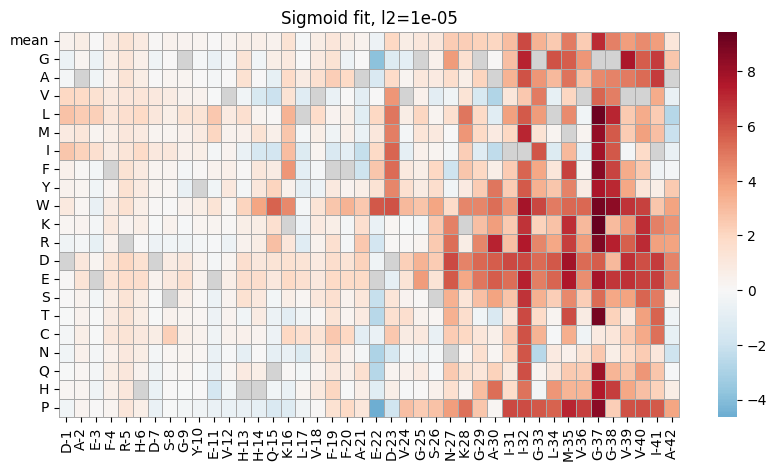

In [15]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(ddE_df_mean_kcalmol[transformation + '_l2_1e-05'], cmap=cmaps_ddE[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_ddE[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title(transformation + ' fit, l2=1e-05')

plt.savefig('./figures/20240716_mochi_ddEa_heatmap_all_3_doubles_1st_ord_terms_allowed_Sigmoid_l2_1e-05.pdf',
           bbox_inches = 'tight')

In [16]:
max(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']['G-37'])

9.440660944206007

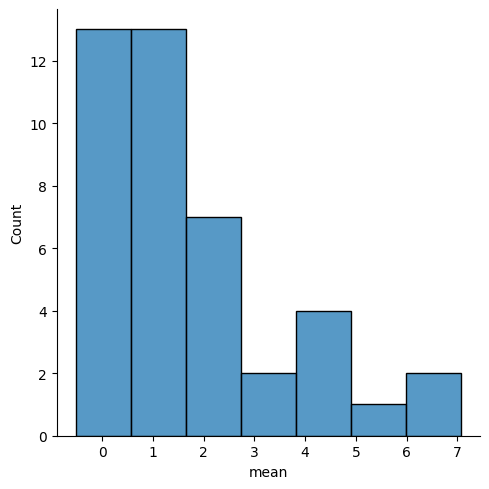

In [17]:
sns.displot(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc['mean'])

In [18]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc['mean'] > 1

D-1     False
A-2     False
E-3     False
F-4     False
R-5      True
H-6     False
D-7     False
S-8     False
G-9     False
Y-10    False
E-11    False
V-12    False
H-13    False
H-14    False
Q-15    False
K-16     True
L-17    False
V-18    False
F-19     True
F-20    False
A-21    False
E-22    False
D-23     True
V-24    False
G-25     True
S-26     True
N-27     True
K-28     True
G-29     True
A-30     True
I-31     True
I-32     True
G-33     True
L-34     True
M-35     True
V-36     True
G-37     True
G-38     True
V-39     True
V-40     True
I-41     True
A-42     True
Name: mean, dtype: bool

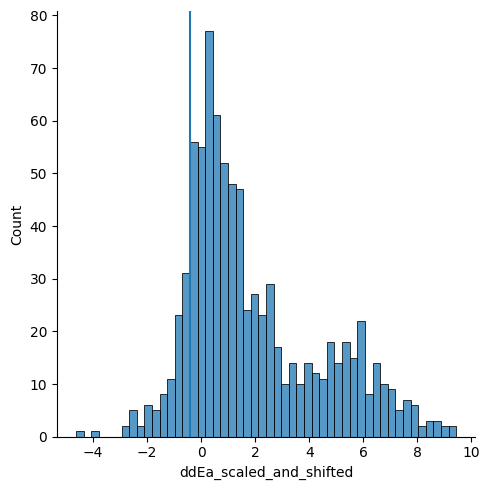

In [19]:
# side task - how many mutations are significantly affecting ddEa? (where ddEa significantly > or < 0)

sns.displot(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifted'], bins=50)
plt.axvline(-0.4)

In [20]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...   n      mean       std      ci95  trait_name  \
0    0.372521  0.341733  ...  10  0.362616  0.014747  0.057808  Nucleation   
1   -2.320398 -2.029718  ...  10 -2.322225  0.270011  1.058444  Nucleation   
2    0.037928  0.066478  ...  10  0.057185  0.026726  0.104765  Nucleation   
3    0.063339  0.093359  ...  10  0.055521  0.038954  0.152699  Nucleation   
4   -0.051849 -0.058691  ...  10 -0.056081  0.007176  0.028130  Nucleation   
..        ...       ...  ...  ..       ...       ...       ...         ...   
836  0.082041  0.077438  ...  10  0.161254  0.057718  0.226253  Nucleation   
837  0.256938  0.260202  ...  10  0.268158  0.036916  0.144711  Nucleation   
838 -1.707580 -1.035545  ...  10 -1.475495  0.282040  1.105598  Nucleation   
839 -1.146212 -0.833155  ...  10 -0.954003  0.116918  0.458318  Nucleation   
840 -0.623868 -0.809916  ...   9 -0.791004  0.208182  0.816072  Nucleation   

     mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
0         0.218317      0.008879       0.034804 -0.218317   
1        -1.398121      0.162563       0.637248  1.398121   
2         0.034429      0.016091       0.063075 -0.034429   
3         0.033427      0.023453       0.091934 -0.033427   
4        -0.033764      0.004320       0.016936  0.033764   
..             ...           ...            ...       ...   
836       0.097084      0.034749       0.136218 -0.097084   
837       0.161447      0.022226       0.087125 -0.161447   
838      -0.888338      0.169805       0.665637  0.888338   
839      -0.574368      0.070392       0.275936  0.574368   
840      -0.476233      0.125338       0.491325  0.476233   

     ddEa_scaled_and_shifted  
0                  -0.936982  
1                   6.000520  
2                  -0.147763  
3                  -0.143465  
4                   0.144910  
..                       ...  
836                -0.416672  
837                -0.692907  
838                 3.812609  
839                 2.465099  
840                 2.043918  

[841 rows x 24 columns]

In [21]:
weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted']

0     -0.936982
1      6.000520
2     -0.147763
3     -0.143465
4      0.144910
         ...   
836   -0.416672
837   -0.692907
838    3.812609
839    2.465099
840    2.043918
Name: ddEa_scaled_and_shifted, Length: 841, dtype: float64

In [22]:
scipy.stats.mode((np.round(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'], 1)))[0]

0.3

In [23]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...   n      mean       std      ci95  trait_name  \
0    0.372521  0.341733  ...  10  0.362616  0.014747  0.057808  Nucleation   
1   -2.320398 -2.029718  ...  10 -2.322225  0.270011  1.058444  Nucleation   
2    0.037928  0.066478  ...  10  0.057185  0.026726  0.104765  Nucleation   
3    0.063339  0.093359  ...  10  0.055521  0.038954  0.152699  Nucleation   
4   -0.051849 -0.058691  ...  10 -0.056081  0.007176  0.028130  Nucleation   
..        ...       ...  ...  ..       ...       ...       ...         ...   
836  0.082041  0.077438  ...  10  0.161254  0.057718  0.226253  Nucleation   
837  0.256938  0.260202  ...  10  0.268158  0.036916  0.144711  Nucleation   
838 -1.707580 -1.035545  ...  10 -1.475495  0.282040  1.105598  Nucleation   
839 -1.146212 -0.833155  ...  10 -0.954003  0.116918  0.458318  Nucleation   
840 -0.623868 -0.809916  ...   9 -0.791004  0.208182  0.816072  Nucleation   

     mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
0         0.218317      0.008879       0.034804 -0.218317   
1        -1.398121      0.162563       0.637248  1.398121   
2         0.034429      0.016091       0.063075 -0.034429   
3         0.033427      0.023453       0.091934 -0.033427   
4        -0.033764      0.004320       0.016936  0.033764   
..             ...           ...            ...       ...   
836       0.097084      0.034749       0.136218 -0.097084   
837       0.161447      0.022226       0.087125 -0.161447   
838      -0.888338      0.169805       0.665637  0.888338   
839      -0.574368      0.070392       0.275936  0.574368   
840      -0.476233      0.125338       0.491325  0.476233   

     ddEa_scaled_and_shifted  
0                  -0.936982  
1                   6.000520  
2                  -0.147763  
3                  -0.143465  
4                   0.144910  
..                       ...  
836                -0.416672  
837                -0.692907  
838                 3.812609  
839                 2.465099  
840                 2.043918  

[841 rows x 24 columns]

In [24]:
# also add scaled std

# final scaling and shifting using Thacker and Yang data
weights_Nucleation['Sigmoid_l2_1e-05']['std_scaled'] = (weights_Nucleation['Sigmoid_l2_1e-05']['std_kcal/mol'])/0.233


In [25]:
weights_Nucleation['Sigmoid_l2_1e-05'][['ddEa','std_kcal/mol','ddEa_scaled_and_shifted','std_scaled']]

ddEa  std_kcal/mol  ddEa_scaled_and_shifted  std_scaled
0   -0.218317      0.008879                -0.936982    0.038105
1    1.398121      0.162563                 6.000520    0.697696
2   -0.034429      0.016091                -0.147763    0.069058
3   -0.033427      0.023453                -0.143465    0.100655
4    0.033764      0.004320                 0.144910    0.018542
..        ...           ...                      ...         ...
836 -0.097084      0.034749                -0.416672    0.149139
837 -0.161447      0.022226                -0.692907    0.095389
838  0.888338      0.169805                 3.812609    0.728779
839  0.574368      0.070392                 2.465099    0.302110
840  0.476233      0.125338                 2.043918    0.537931

[841 rows x 4 columns]

In [26]:
from statsmodels.stats.multitest import multipletests

In [27]:
weights_Nucleation_noWT = weights_Nucleation['Sigmoid_l2_1e-05'][1:].copy()

#idx_noStopCodons = [idx for idx in list(weights_Nucleation_noWTnoStop.index) if weights_Nucleation_noWTnoStop.loc[idx,'id'][-1] != '*']

#weights_Nucleation_noWTnoStop = weights_Nucleation_noWTnoStop.loc[idx_noStopCodons,:]

In [28]:
#len(weights_Nucleation_noWTnoStop)

In [29]:
#weights_Nucleation_noWTnoStop

In [30]:
len(weights_Nucleation['Sigmoid_l2_1e-05'])

841

In [31]:
len(weights_Nucleation_noWT)

840

In [32]:
# here assuming that ddEa = 0 is unaffected nucleation, but could consider the mode
ddEa_unaffected = 0 #scipy.stats.mode((np.round(singles_doubles['nscore_c'], 1)))[0]

# calculate z-scores (vs 0 = unaffected)
weights_Nucleation_noWT['zscore_unaffected'] = (weights_Nucleation_noWT['ddEa_scaled_and_shifted'] - ddEa_unaffected)/weights_Nucleation_noWT['std_scaled']

# compare the z-score to 0, calculate p-values and do multiple test correction (method BH)
weights_Nucleation_noWT['p.adjust_mode'] = multipletests(2*scipy.stats.norm.cdf(-abs(weights_Nucleation_noWT['zscore_unaffected'])), 
                                                 method = "fdr_bh")[1]

# assign unaffected / afected labels
weights_Nucleation_noWT['category_affected'] = ['affected' if (weights_Nucleation_noWT.loc[i,'p.adjust_mode'] < 0.05) & (abs(weights_Nucleation_noWT.loc[i,'ddEa_scaled_and_shifted']) > ddEa_unaffected) else 'unaffected' for i in list(weights_Nucleation_noWT.index)]


In [33]:
# using ddEa = 0 as unaffected
weights_Nucleation_noWT['category_affected'].value_counts()

category_affected
affected      720
unaffected    120
Name: count, dtype: int64

In [35]:
720/(720 + 120)

0.8571428571428571

In [36]:
weights_Nucleation_noWT[weights_Nucleation_noWT['category_affected'] == 'affected']['Pos'].value_counts()

Pos
32.0    20
4.0     20
5.0     20
6.0     20
40.0    20
39.0    20
38.0    20
37.0    20
28.0    20
29.0    20
19.0    20
31.0    20
22.0    19
23.0    19
27.0    19
35.0    19
41.0    19
33.0    18
15.0    18
14.0    18
21.0    18
36.0    18
34.0    18
26.0    17
42.0    17
25.0    17
16.0    17
10.0    16
2.0     16
20.0    16
30.0    16
24.0    16
9.0     16
18.0    15
7.0     15
8.0     14
1.0     14
17.0    14
13.0    13
3.0     10
11.0     9
12.0     9
Name: count, dtype: int64

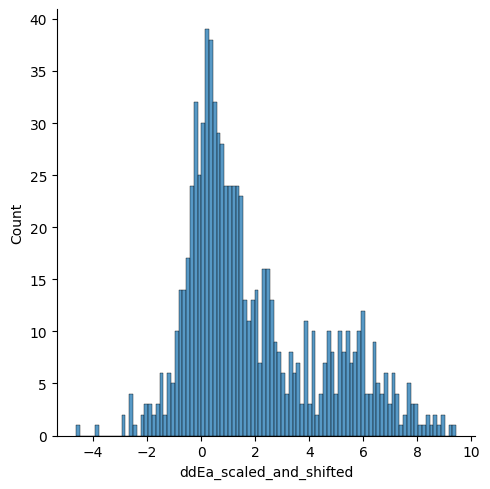

In [37]:
sns.displot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'], bins=100)

In [38]:
np.histogram(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifted'], bins=100)

(array([ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  4,  1,  0,
         2,  3,  3,  2,  3,  6,  2,  6,  5,  9, 14, 14, 17, 24, 32, 25, 30,
        39, 38, 32, 29, 28, 24, 24, 24, 24, 23, 13, 11, 13, 14,  7, 16, 16,
        13,  9,  8,  6,  4,  8,  6,  7,  3, 11,  3, 10,  2,  4,  7, 10,  8,
         4, 10,  8, 10,  7,  8, 10, 12,  4,  4,  9,  5,  4,  6,  3,  6,  4,
         1,  2,  5,  3,  3,  1,  1,  2,  1,  2,  1,  2,  0,  1,  1]),
 array([-4.63618755e+00, -4.49541907e+00, -4.35465058e+00, -4.21388210e+00,
        -4.07311361e+00, -3.93234513e+00, -3.79157664e+00, -3.65080816e+00,
        -3.51003967e+00, -3.36927119e+00, -3.22850270e+00, -3.08773422e+00,
        -2.94696573e+00, -2.80619725e+00, -2.66542876e+00, -2.52466028e+00,
        -2.38389179e+00, -2.24312331e+00, -2.10235482e+00, -1.96158634e+00,
        -1.82081785e+00, -1.68004937e+00, -1.53928088e+00, -1.39851240e+00,
        -1.25774391e+00, -1.11697543e+00, -9.76206944e-01, -8.35438459e-01,
        -6.9466997

In [39]:
np.histogram(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifted'], bins=100)[0][34]

39

In [40]:
np.histogram(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifted'], bins=100)[1][34]

0.14994093562231825

In [41]:
weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'] > 1].shape

(170, 25)

In [42]:
weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'] < -1].shape

(1, 25)

In [43]:
170/(721+120)

0.20214030915576695

In [44]:
np.median([0.56,0.85,0.7])

0.7

In [45]:
np.median([0.32,0.77,0.75])

0.75

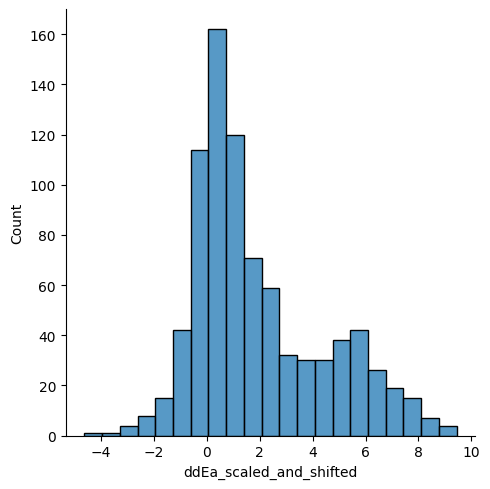

In [46]:
sns.displot(weights_Nucleation_noWT['ddEa_scaled_and_shifted'])

In [47]:
# here assuming that ddEa = 0 is unaffected nucleation, but could consider the mode
ddEa_unaffected = 0 #scipy.stats.mode((np.round(singles_doubles['nscore_c'], 1)))[0]

# assign unaffected / afected labels
weights_Nucleation_noWT['category_incr_decr_nucleation'] = ['decreased' if (weights_Nucleation_noWT.loc[i,'p.adjust_mode'] < 0.05) & (weights_Nucleation_noWT.loc[i,'ddEa_scaled_and_shifted'] < ddEa_unaffected) else 'NA' for i in list(weights_Nucleation_noWT.index)]

weights_Nucleation_noWT['category_incr_decr_nucleation'] = ['increased' if (weights_Nucleation_noWT.loc[i,'p.adjust_mode'] < 0.05) & (weights_Nucleation_noWT.loc[i,'ddEa_scaled_and_shifted'] > ddEa_unaffected) else weights_Nucleation_noWT.loc[i,'category_incr_decr_nucleation'] for i in list(weights_Nucleation_noWT.index)]




In [48]:
weights_Nucleation_noWT['category_incr_decr_nucleation'].value_counts()

category_incr_decr_nucleation
increased    605
NA           120
decreased    115
Name: count, dtype: int64

In [51]:
len(weights_Nucleation_noWT[weights_Nucleation_noWT['ddEa_scaled_and_shifted'] > 1])

443

In [53]:
443/840

0.5273809523809524

In [52]:
len(weights_Nucleation_noWT[weights_Nucleation_noWT['ddEa_scaled_and_shifted'] < -1])

39

In [54]:
len(weights_Nucleation_noWT[weights_Nucleation_noWT['ddEa_scaled_and_shifted'] > 1]) + len(weights_Nucleation_noWT[weights_Nucleation_noWT['ddEa_scaled_and_shifted'] < -1])

482

In [56]:
482/840

0.5738095238095238

In [49]:
605/840

0.7202380952380952

## add these columns to weights_Nucleation['Sigmoid_l2_1e-05'] with 'NA' for WT enrty and resave ST3

In [57]:
weights_Nucleation_noWT

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
5     D1F    D1F   1.0      1.0 -0.232830 -0.264132 -0.034940 -0.116136   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol  \
1   -2.320398 -2.029718  ...      -1.398121      0.162563       0.637248   
2    0.037928  0.066478  ...       0.034429      0.016091       0.063075   
3    0.063339  0.093359  ...       0.033427      0.023453       0.091934   
4   -0.051849 -0.058691  ...      -0.033764      0.004320       0.016936   
5   -0.133847 -0.200032  ...      -0.111876      0.042987       0.168510   
..        ...       ...  ...            ...           ...            ...   
836  0.082041  0.077438  ...       0.097084      0.034749       0.136218   
837  0.256938  0.260202  ...       0.161447      0.022226       0.087125   
838 -1.707580 -1.035545  ...      -0.888338      0.169805       0.665637   
839 -1.146212 -0.833155  ...      -0.574368      0.070392       0.275936   
840 -0.623868 -0.809916  ...      -0.476233      0.125338       0.491325   

         ddEa  ddEa_scaled_and_shifted  std_scaled  zscore_unaffected  \
1    1.398121                 6.000520    0.697696           8.600479   
2   -0.034429                -0.147763    0.069058          -2.139694   
3   -0.033427                -0.143465    0.100655          -1.425315   
4    0.033764                 0.144910    0.018542           7.815122   
5    0.111876                 0.480155    0.184494           2.602549   
..        ...                      ...         ...                ...   
836 -0.097084                -0.416672    0.149139          -2.793839   
837 -0.161447                -0.692907    0.095389          -7.263979   
838  0.888338                 3.812609    0.728779           5.231504   
839  0.574368                 2.465099    0.302110           8.159595   
840  0.476233                 2.043918    0.537931           3.799589   

     p.adjust_mode category_affected  category_incr_decr_nucleation  
1     1.543575e-17          affected                      increased  
2     3.804027e-02          affected                      decreased  
3     1.700599e-01        unaffected                             NA  
4     9.940580e-15          affected                      increased  
5     1.128132e-02          affected                      increased  
..             ...               ...                            ...  
836   6.434195e-03          affected                      decreased  
837   6.483139e-13          affected                      decreased  
838   2.447743e-07          affected                      increased  
839   6.247038e-16          affected                      increased  
840   1.920295e-04          affected                      increased  

[840 rows x 29 columns]

In [58]:
weights_Nucleation_noWT.loc[-1] = list(weights_Nucleation['Sigmoid_l2_1e-05'].loc[0]) + ['NA']*4  # adding a row
weights_Nucleation_noWT.index = weights_Nucleation_noWT.index + 1  # shifting index
weights_Nucleation_noWT.sort_index(inplace=True)

In [59]:
weights_Nucleation_noWT

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
2     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
3     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
4     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
5     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
837  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
838  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
839  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
840  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
841  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol  \
0    0.372521  0.341733  ...       0.218317      0.008879       0.034804   
2   -2.320398 -2.029718  ...      -1.398121      0.162563       0.637248   
3    0.037928  0.066478  ...       0.034429      0.016091       0.063075   
4    0.063339  0.093359  ...       0.033427      0.023453       0.091934   
5   -0.051849 -0.058691  ...      -0.033764      0.004320       0.016936   
..        ...       ...  ...            ...           ...            ...   
837  0.082041  0.077438  ...       0.097084      0.034749       0.136218   
838  0.256938  0.260202  ...       0.161447      0.022226       0.087125   
839 -1.707580 -1.035545  ...      -0.888338      0.169805       0.665637   
840 -1.146212 -0.833155  ...      -0.574368      0.070392       0.275936   
841 -0.623868 -0.809916  ...      -0.476233      0.125338       0.491325   

         ddEa  ddEa_scaled_and_shifted  std_scaled  zscore_unaffected  \
0   -0.218317                -0.936982    0.038105                 NA   
2    1.398121                 6.000520    0.697696           8.600479   
3   -0.034429                -0.147763    0.069058          -2.139694   
4   -0.033427                -0.143465    0.100655          -1.425315   
5    0.033764                 0.144910    0.018542           7.815122   
..        ...                      ...         ...                ...   
837 -0.097084                -0.416672    0.149139          -2.793839   
838 -0.161447                -0.692907    0.095389          -7.263979   
839  0.888338                 3.812609    0.728779           5.231504   
840  0.574368                 2.465099    0.302110           8.159595   
841  0.476233                 2.043918    0.537931           3.799589   

     p.adjust_mode category_affected  category_incr_decr_nucleation  
0               NA                NA                             NA  
2              0.0          affected                      increased  
3          0.03804          affected                      decreased  
4          0.17006        unaffected                             NA  
5              0.0          affected                      increased  
..             ...               ...                            ...  
837       0.006434          affected                      decreased  
838            0.0          affected                      decreased  
839            0.0          affected                      increased  
840            0.0          affected                      increased  
841       0.000192          affected                      increased  

[841 rows x 29 columns]

In [60]:
weights_Nucleation_noWT.columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
       'std_scaled', 'zscore_unaffected', 'p.adjust_mode', 'category_affected',
       'category_incr_decr_nucleation'],
      dtype='object')

In [61]:
weights_Nucleation2save = weights_Nucleation_noWT.copy()

In [62]:
weights_Nucleation2save = weights_Nucleation2save.loc[:,['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
        'std_scaled', 'zscore_unaffected',
       'p.adjust_mode', 'category_affected', 'category_incr_decr_nucleation']]

In [63]:
weights_Nucleation2save.columns = ['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled',
        'std_scaled', 'zscore_unaffected',
       'p.adjust_mode', 'category_affected', 'category_incr_decr_nucleation']

In [64]:
weights_Nucleation2save

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
2     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
3     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
4     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
5     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
837  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
838  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
839  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
840  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
841  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol  \
0    0.372521  0.341733  ...       0.218317      0.008879       0.034804   
2   -2.320398 -2.029718  ...      -1.398121      0.162563       0.637248   
3    0.037928  0.066478  ...       0.034429      0.016091       0.063075   
4    0.063339  0.093359  ...       0.033427      0.023453       0.091934   
5   -0.051849 -0.058691  ...      -0.033764      0.004320       0.016936   
..        ...       ...  ...            ...           ...            ...   
837  0.082041  0.077438  ...       0.097084      0.034749       0.136218   
838  0.256938  0.260202  ...       0.161447      0.022226       0.087125   
839 -1.707580 -1.035545  ...      -0.888338      0.169805       0.665637   
840 -1.146212 -0.833155  ...      -0.574368      0.070392       0.275936   
841 -0.623868 -0.809916  ...      -0.476233      0.125338       0.491325   

         ddEa  ddEa_scaled  std_scaled  zscore_unaffected  p.adjust_mode  \
0   -0.218317    -0.936982    0.038105                 NA             NA   
2    1.398121     6.000520    0.697696           8.600479            0.0   
3   -0.034429    -0.147763    0.069058          -2.139694        0.03804   
4   -0.033427    -0.143465    0.100655          -1.425315        0.17006   
5    0.033764     0.144910    0.018542           7.815122            0.0   
..        ...          ...         ...                ...            ...   
837 -0.097084    -0.416672    0.149139          -2.793839       0.006434   
838 -0.161447    -0.692907    0.095389          -7.263979            0.0   
839  0.888338     3.812609    0.728779           5.231504            0.0   
840  0.574368     2.465099    0.302110           8.159595            0.0   
841  0.476233     2.043918    0.537931           3.799589       0.000192   

    category_affected  category_incr_decr_nucleation  
0                  NA                             NA  
2            affected                      increased  
3            affected                      decreased  
4          unaffected                             NA  
5            affected                      increased  
..                ...                            ...  
837          affected                      decreased  
838          affected                      decreased  
839          affected                      increased  
840          affected                      increased  
841          affected                      increased  

[841 rows x 29 columns]

# Read in files with all variants NS used for mochi training

In [66]:
datasets = ['eLife_doubles','NNK_doubles','Nicking_doubles']

In [67]:
# produced and saved in notebook M0 in this directory

corrected_files_dir = '/lustre/scratch126/gengen/projects/amyloid_beta_epistasis/Previous_files_from_Mireia/Doubles_datasets/dimsum_outputs/corrected_fitness_abundance_files_Anna/'

all_variants = {}

for dataset in datasets:
    print(dataset)
    all_variants[dataset] = pd.read_csv(corrected_files_dir + 'all_variants_corrected_' + dataset + '_full_table_for_plotting.tsv',
                                       index_col=0)

eLife_doubles
NNK_doubles
Nicking_doubles


/tmp/ipykernel_326527/3546296216.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_variants[dataset] = pd.read_csv(corrected_files_dir + 'all_variants_corrected_' + dataset + '_full_table_for_plotting.tsv',


In [68]:
len(all_variants['eLife_doubles'])

18649

In [69]:
len(all_variants['NNK_doubles'])

28530

In [70]:
len(all_variants['Nicking_doubles'])

54709

In [71]:
18649 + 28530 + 54709

101888

In [72]:
all_variants['eLife_doubles'].columns

Index(['merge_seq', 'aa_seq', 'Nham_nt', 'Nham_aa', 'Nmut_codons', 'WT',
       'STOP', 'STOP_readthrough', 'mean_count', 'count_e1_s0', 'count_e2_s0',
       'count_e3_s0', 'count_e1_s1', 'count_e2_s1', 'count_e3_s1',
       'fitness1_uncorr', 'sigma1_uncorr', 'fitness2_uncorr', 'sigma2_uncorr',
       'fitness3_uncorr', 'sigma3_uncorr', 'fitness', 'sigma', 'nscore_c',
       'sigma_norm_first_toWT', 'category_sigma', 'zscore_mode',
       'p.adjust_mode', 'category_dead'],
      dtype='object')

In [73]:
for dataset in datasets:
    print(dataset)
    print(np.unique([len(aa_seq) for aa_seq in all_variants[dataset].aa_seq]))

eLife_doubles
[42]
NNK_doubles
[15]
Nicking_doubles
[28]


### Complemeting variants here to full Abeta sequence

In [74]:
# here we need to add WT N-terminus (aa1-27) to the beginning

all_variants['NNK_doubles']['aa_seq'] = [AB_WT[:27] + seq for seq in all_variants['NNK_doubles']['aa_seq']]

In [75]:
np.unique([len(seq) for seq in all_variants['NNK_doubles']['aa_seq']])

array([42])

In [76]:
# here we need to add WT C-terminus (aa29-42) to the end

all_variants['Nicking_doubles']['aa_seq'] = [seq + AB_WT[28:] for seq in all_variants['Nicking_doubles']['aa_seq']]

In [77]:
np.unique([len(seq) for seq in all_variants['Nicking_doubles']['aa_seq']])

array([42])

In [78]:
all_variants['eLife_doubles'].shape

(18649, 29)

In [79]:
all_variants['eLife_doubles'][all_variants['eLife_doubles']['Nham_aa'] == 1].shape

(499, 29)

In [80]:
all_variants['eLife_doubles']

merge_seq  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
...                                           ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   

                                           aa_seq  Nham_nt  Nham_aa  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
...                                           ...      ...      ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   

       Nmut_codons   WT   STOP  STOP_readthrough    mean_count  count_e1_s0  \
1                1  NaN  False             False    210.500000        212.0   
2                1  NaN  False             False  28544.000000      38851.0   
3                2  NaN  False             False    170.000000        190.0   
4                2  NaN  False             False    146.000000        172.0   
5                2  NaN  False             False     64.500000         50.0   
...            ...  ...    ...               ...           ...          ...   
18645            2  NaN  False             False     61.000000         61.0   
18646            2  NaN  False             False     61.000000          NaN   
18647            2  NaN  False             False     94.500000        112.0   
18648            1  NaN  False             False    161.666667        212.0   
18649            1  NaN  False             False     74.000000         76.0   

       ...  fitness3_uncorr  sigma3_uncorr   fitness     sigma  nscore_c  \
1      ...              NaN            NaN -0.117352  0.387033 -0.031054   
2      ...         0.785219       0.299795  0.352500  0.062247  0.438798   
3      ...              NaN            NaN  0.381524  0.420981  0.467821   
4      ...              NaN            NaN  0.052856  0.450957  0.139154   
5      ...              NaN            NaN  0.495394  0.711069  0.581692   
...    ...              ...            ...       ...       ...       ...   
18645  ...              NaN            NaN -0.885994  0.894598 -0.799697   
18646  ...              NaN            NaN -2.245360  1.278978 -2.159063   
18647  ...              NaN            NaN -3.576266  0.732316 -3.489969   
18648  ...        -0.000494       0.993911  0.066515  0.359042  0.152813   
18649  ...              NaN            NaN  0.327003  0.640515  0.413300   

       sigma_norm_first_toWT  category_sigma  zscore_mode  p.adjust_mode  \
1                   0.116471    classifiable    -0.080236   9.593123e-01   
2                   0.018732    classifiable     7.049259   2.372307e-11   
3                   0.126687    classifiable     1.111265   3.692032e-01   
4                   0.135707    classifiable     0.308574   8.323199e-01   
5                   0.213984    classifiable     0.818052   5.286066e-01   
...                      ...             ...          ...            ...   
18645               0.269213    classifiable    -0.893918   4.859939e-01   
18646               0.384886  unclassifiable    -1.688115   1.467904e-01   
1864

In [81]:
all_variants['NNK_doubles']

nt_seq                                      aa_seq  Nham_nt  Nham_aa  \
1        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAITGLMVGGVVIA      NaN        2   
2        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIKLMVGGVVIA      NaN        2   
3        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIITLMVGGVVIA      NaN        2   
4        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIISLMVGGVVIA      NaN        2   
5        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIMLMVGGVVIA      NaN        2   
...      ...                                         ...      ...      ...   
28526    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIIGFMVGGVVIA      NaN        2   
28527    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAILGLMVGGVVIA      NaN        2   
28528    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIGGLMVGGVVIA      NaN        2   
28529    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAGIGLMVGGVVIA      NaN        2   
28530    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFG*IIGLMVGGVVIA      NaN        2   

       Nmut_codons   WT  indel   STOP  STOP_readthrough  mean_count  ...  \
1              NaN  NaN  False  False             False  116.000000  ...   
2              NaN  NaN  False  False             False    8.666667  ...   
3              NaN  NaN  False  False             False   57.666667  ...   
4              NaN  NaN  False  False             False  138.000000  ...   
5              NaN  NaN  False  False             False  196.666667  ...   
...            ...  ...    ...    ...               ...         ...  ...   
28526          NaN  NaN  False  False             False   97.333333  ...   
28527          NaN  NaN  False  False             False   72.666667  ...   
28528          NaN  NaN  False  False             False   33.333333  ...   
28529          NaN  NaN  False  False             False  113.333333  ...   
28530          NaN  NaN  False   True             False  111.333333  ...   

       count_e2_s1  count_e3_s1  fitness1_uncorr  fitness2_uncorr  \
1                0           23        -2.779356              NaN   
2                0           11              NaN              NaN   
3                0           17        -2.639310              NaN   
4               52            0              NaN        -0.643774   
5                0           13        -4.086025              NaN   
...            ...          ...              ...              ...   
28526            0            0        -2.601852              NaN   
28527           22            0              NaN        -3.028144   
28528            0            0        -3.196120              NaN   
28529            0           27        -2.209778              NaN   
28530            0           22              NaN              NaN   

       fitness3_uncorr  sigma1_uncorr  sigma2_uncorr  sigma3_uncorr   fitness  \
1            -3.167846       1.063514            NaN       1.623135 -2.896045   
2            -2.394447            NaN            NaN       3.007552 -2.394447   
3            -2.976230       1.306890            NaN       1.986638 -2.741074   
4                  NaN            NaN       3.094312            NaN -0.643774   
5            -3.947984       0.967330            NaN       1.759826 -4.053995   
...                ...            ...            ...            ...       ...   
28526              NaN       0.852818            NaN            NaN -2.601852   
28527              NaN            NaN       1.759443            NaN -3.028144   
28528              NaN       1.210447            NaN            NaN -3.196120   
28529        -3.108238       0.779557            NaN       1.531268 -2.394707   
28530        -2.890738            NaN            NaN       1.803738 -2.890738   

          sigma  
1      0.889568  
2      3.007552  
3      1.091826  
4      3.094312  
5      0.847707  
...         ...  
28526  0.852818  
28527  1.759443  
28528  1.210447  
28529  0.694712  
28530  1.803738  

[28530 rows x 24 columns]

In [82]:
all_variants['Nicking_doubles']

nt_seq                                      aa_seq  Nham_nt  Nham_aa  \
1        NaN  KAETRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
2        NaN  KAEFIHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
3        NaN  KAEFRTDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
4        NaN  KAEFRMDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
5        NaN  KAEFRQDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
...      ...                                         ...      ...      ...   
54705    NaN  FAEFEHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
54706    NaN  FAEFAHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
54707    NaN  FAEFGHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
54708    NaN  FAEFVHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   
54709    NaN  FAEFFHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA      NaN        2   

       Nmut_codons   WT  indel   STOP  STOP_readthrough   mean_count  ...  \
1                2  NaN  False  False             False  1067.666667  ...   
2                2  NaN  False  False             False    21.666667  ...   
3                2  NaN  False  False             False    88.333333  ...   
4                2  NaN  False  False             False     6.333333  ...   
5                2  NaN  False  False             False     7.000000  ...   
...            ...  ...    ...    ...               ...          ...  ...   
54705            2  NaN  False  False             False   590.333333  ...   
54706            2  NaN  False  False             False     7.333333  ...   
54707            2  NaN  False  False             False   182.333333  ...   
54708            2  NaN  False  False             False    78.333333  ...   
54709            2  NaN  False  False             False    98.000000  ...   

       count_e2_s1  count_e3_s1  fitness1_uncorr  sigma1_uncorr  \
1              965         1611         0.200119       0.456087   
2                2            0        -2.126017       3.116771   
3               31          126         0.138698       1.108609   
4                4            1        -2.819164       4.645529   
5                5            2        -0.698901       5.426405   
...            ...          ...              ...            ...   
54705          376           82        -0.470190       0.556860   
54706           12            2         2.316634      13.089716   
54707           69            7        -0.204002       1.155085   
54708           59            2        -2.078764       1.776635   
54709           89            7        -2.626792       2.519054   

       fitness2_uncorr  sigma2_uncorr  fitness3_uncorr  sigma3_uncorr  \
1            -0.437781       0.438525         1.070802       0.488955   
2            -2.413441       4.043646              NaN            NaN   
3            -0.855264       1.528540         1.136838       1.371684   
4            -0.575389       4.581132        -1.031895       6.195123   
5            -0.891268       3.696921        -0.822889       4.746823   
...                ...            ...              ...            ...   
54705        -0.693410       0.549748        -1.719094       0.627564   
54706        -0.446061       2.777547        -0.822889       4.746823   
54707        -1.850940       0.819796        -2.682454       1.552659   
54708        -0.945726       1.099269        -3.439321       2.194137   
54709        -1.255420       0.842581        -0.482132       2.909704   

        fitness     sigma  
1      0.223002  0.265464  
2     -2.233137  2.468575  
3      0.197959  0.750978  
4     -1.540592  2.886249  
5     -0.828119  2.569098  
...         ...       ...  
54705 -0.901118  0.331994  
54706 -0.449397  2.358081  
54707 -1.515580  0.614034  
54708 -1.594302  0.860002  
54709 -1.329503  0.770538  

[54709 rows x 24 columns]

In [83]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...      mean       std      ci95  trait_name  \
0    0.372521  0.341733  ...  0.362616  0.014747  0.057808  Nucleation   
1   -2.320398 -2.029718  ... -2.322225  0.270011  1.058444  Nucleation   
2    0.037928  0.066478  ...  0.057185  0.026726  0.104765  Nucleation   
3    0.063339  0.093359  ...  0.055521  0.038954  0.152699  Nucleation   
4   -0.051849 -0.058691  ... -0.056081  0.007176  0.028130  Nucleation   
..        ...       ...  ...       ...       ...       ...         ...   
836  0.082041  0.077438  ...  0.161254  0.057718  0.226253  Nucleation   
837  0.256938  0.260202  ...  0.268158  0.036916  0.144711  Nucleation   
838 -1.707580 -1.035545  ... -1.475495  0.282040  1.105598  Nucleation   
839 -1.146212 -0.833155  ... -0.954003  0.116918  0.458318  Nucleation   
840 -0.623868 -0.809916  ... -0.791004  0.208182  0.816072  Nucleation   

     mean_kcal/mol  std_kcal/mol  ci95_kcal/mol      ddEa  \
0         0.218317      0.008879       0.034804 -0.218317   
1        -1.398121      0.162563       0.637248  1.398121   
2         0.034429      0.016091       0.063075 -0.034429   
3         0.033427      0.023453       0.091934 -0.033427   
4        -0.033764      0.004320       0.016936  0.033764   
..             ...           ...            ...       ...   
836       0.097084      0.034749       0.136218 -0.097084   
837       0.161447      0.022226       0.087125 -0.161447   
838      -0.888338      0.169805       0.665637  0.888338   
839      -0.574368      0.070392       0.275936  0.574368   
840      -0.476233      0.125338       0.491325  0.476233   

    ddEa_scaled_and_shifted  std_scaled  
0                 -0.936982    0.038105  
1                  6.000520    0.697696  
2                 -0.147763    0.069058  
3                 -0.143465    0.100655  
4                  0.144910    0.018542  
..                      ...         ...  
836               -0.416672    0.149139  
837               -0.692907    0.095389  
838                3.812609    0.728779  
839                2.465099    0.302110  
840                2.043918    0.537931  

[841 rows x 25 columns]

In [84]:
'A42Y'[-1]

'Y'

In [85]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_count(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id']
                        doubles_dataset_id # eLife_doubles / NNK_doubles / Nicking_doubles
                       ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        curr_pos = int(mut_id[1:-1]) - 1

        curr_new_aa = mut_id[-1]

        count = 0

        for aa_variant in list(all_variants[doubles_dataset_id]['aa_seq']):
            if aa_variant[curr_pos] == curr_new_aa:
                count = count + 1
        
        return(count)

    
    


In [86]:
all_variants['eLife_doubles']

merge_seq  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
...                                           ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   

                                           aa_seq  Nham_nt  Nham_aa  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
...                                           ...      ...      ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   

       Nmut_codons   WT   STOP  STOP_readthrough    mean_count  count_e1_s0  \
1                1  NaN  False             False    210.500000        212.0   
2                1  NaN  False             False  28544.000000      38851.0   
3                2  NaN  False             False    170.000000        190.0   
4                2  NaN  False             False    146.000000        172.0   
5                2  NaN  False             False     64.500000         50.0   
...            ...  ...    ...               ...           ...          ...   
18645            2  NaN  False             False     61.000000         61.0   
18646            2  NaN  False             False     61.000000          NaN   
18647            2  NaN  False             False     94.500000        112.0   
18648            1  NaN  False             False    161.666667        212.0   
18649            1  NaN  False             False     74.000000         76.0   

       ...  fitness3_uncorr  sigma3_uncorr   fitness     sigma  nscore_c  \
1      ...              NaN            NaN -0.117352  0.387033 -0.031054   
2      ...         0.785219       0.299795  0.352500  0.062247  0.438798   
3      ...              NaN            NaN  0.381524  0.420981  0.467821   
4      ...              NaN            NaN  0.052856  0.450957  0.139154   
5      ...              NaN            NaN  0.495394  0.711069  0.581692   
...    ...              ...            ...       ...       ...       ...   
18645  ...              NaN            NaN -0.885994  0.894598 -0.799697   
18646  ...              NaN            NaN -2.245360  1.278978 -2.159063   
18647  ...              NaN            NaN -3.576266  0.732316 -3.489969   
18648  ...        -0.000494       0.993911  0.066515  0.359042  0.152813   
18649  ...              NaN            NaN  0.327003  0.640515  0.413300   

       sigma_norm_first_toWT  category_sigma  zscore_mode  p.adjust_mode  \
1                   0.116471    classifiable    -0.080236   9.593123e-01   
2                   0.018732    classifiable     7.049259   2.372307e-11   
3                   0.126687    classifiable     1.111265   3.692032e-01   
4                   0.135707    classifiable     0.308574   8.323199e-01   
5                   0.213984    classifiable     0.818052   5.286066e-01   
...                      ...             ...          ...            ...   
18645               0.269213    classifiable    -0.893918   4.859939e-01   
18646               0.384886  unclassifiable    -1.688115   1.467904e-01   
1864

In [87]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_eLife_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'eLife_doubles'))

In [88]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_NNK_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'NNK_doubles'))

In [89]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_Nicking_doubles'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_count(x, 'Nicking_doubles'))

In [90]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  trait_name  mean_kcal/mol  std_kcal/mol  \
0    0.372521  0.341733  ...  Nucleation       0.218317      0.008879   
1   -2.320398 -2.029718  ...  Nucleation      -1.398121      0.162563   
2    0.037928  0.066478  ...  Nucleation       0.034429      0.016091   
3    0.063339  0.093359  ...  Nucleation       0.033427      0.023453   
4   -0.051849 -0.058691  ...  Nucleation      -0.033764      0.004320   
..        ...       ...  ...         ...            ...           ...   
836  0.082041  0.077438  ...  Nucleation       0.097084      0.034749   
837  0.256938  0.260202  ...  Nucleation       0.161447      0.022226   
838 -1.707580 -1.035545  ...  Nucleation      -0.888338      0.169805   
839 -1.146212 -0.833155  ...  Nucleation      -0.574368      0.070392   
840 -0.623868 -0.809916  ...  Nucleation      -0.476233      0.125338   

     ci95_kcal/mol      ddEa  ddEa_scaled_and_shifted  std_scaled  \
0         0.034804 -0.218317                -0.936982    0.038105   
1         0.637248  1.398121                 6.000520    0.697696   
2         0.063075 -0.034429                -0.147763    0.069058   
3         0.091934 -0.033427                -0.143465    0.100655   
4         0.016936  0.033764                 0.144910    0.018542   
..             ...       ...                      ...         ...   
836       0.136218 -0.097084                -0.416672    0.149139   
837       0.087125 -0.161447                -0.692907    0.095389   
838       0.665637  0.888338                 3.812609    0.728779   
839       0.275936  0.574368                 2.465099    0.302110   
840       0.491325  0.476233                 2.043918    0.537931   

     variant_occurence_eLife_doubles variant_occurence_NNK_doubles  \
0                                  0                             0   
1                                  1                             0   
2                                 11                             0   
3                                  1                             0   
4                                210                             0   
..                               ...                           ...   
836                              154                           236   
837                              181                           239   
838                                0                           188   
839                                0                           172   
840                                0                             0   

     variant_occurence_Nicking_doubles  
0                                    0  
1                                   65  
2                                  298  
3                                  203  
4                                  296  
..                                 ...  
836                                  0  
837                                  0  
838                                  0  
839                                  0  
840                                  3  

[841 rows x 28 columns]

In [91]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total'] = weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_eLife_doubles'] + weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_NNK_doubles'] + weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_Nicking_doubles']



In [92]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  mean_kcal/mol  std_kcal/mol  ci95_kcal/mol  \
0    0.372521  0.341733  ...       0.218317      0.008879       0.034804   
1   -2.320398 -2.029718  ...      -1.398121      0.162563       0.637248   
2    0.037928  0.066478  ...       0.034429      0.016091       0.063075   
3    0.063339  0.093359  ...       0.033427      0.023453       0.091934   
4   -0.051849 -0.058691  ...      -0.033764      0.004320       0.016936   
..        ...       ...  ...            ...           ...            ...   
836  0.082041  0.077438  ...       0.097084      0.034749       0.136218   
837  0.256938  0.260202  ...       0.161447      0.022226       0.087125   
838 -1.707580 -1.035545  ...      -0.888338      0.169805       0.665637   
839 -1.146212 -0.833155  ...      -0.574368      0.070392       0.275936   
840 -0.623868 -0.809916  ...      -0.476233      0.125338       0.491325   

         ddEa  ddEa_scaled_and_shifted  std_scaled  \
0   -0.218317                -0.936982    0.038105   
1    1.398121                 6.000520    0.697696   
2   -0.034429                -0.147763    0.069058   
3   -0.033427                -0.143465    0.100655   
4    0.033764                 0.144910    0.018542   
..        ...                      ...         ...   
836 -0.097084                -0.416672    0.149139   
837 -0.161447                -0.692907    0.095389   
838  0.888338                 3.812609    0.728779   
839  0.574368                 2.465099    0.302110   
840  0.476233                 2.043918    0.537931   

     variant_occurence_eLife_doubles  variant_occurence_NNK_doubles  \
0                                  0                              0   
1                                  1                              0   
2                                 11                              0   
3                                  1                              0   
4                                210                              0   
..                               ...                            ...   
836                              154                            236   
837                              181                            239   
838                                0                            188   
839                                0                            172   
840                                0                              0   

    variant_occurence_Nicking_doubles  variant_occurence_total  
0                                   0                        0  
1                                  65                       66  
2                                 298                      309  
3                                 203                      204  
4                                 296                      506  
..                                ...                      ...  
836                                 0                      390  
837                                 0                      420  
838                                 0                      188  
839                                 0    

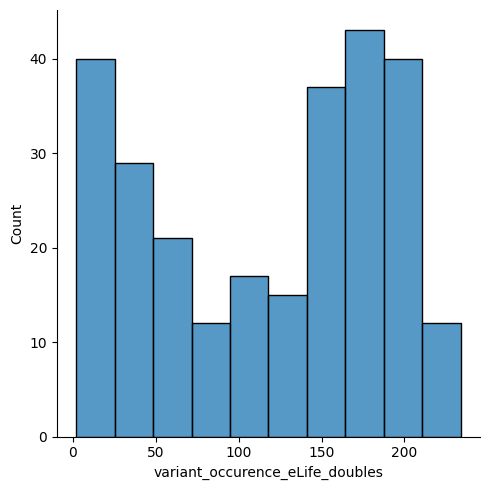

In [93]:
sns.displot(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_eLife_doubles'] > 1]['variant_occurence_eLife_doubles'])

In [94]:
np.median(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_eLife_doubles'] > 1]['variant_occurence_eLife_doubles'])

140.0

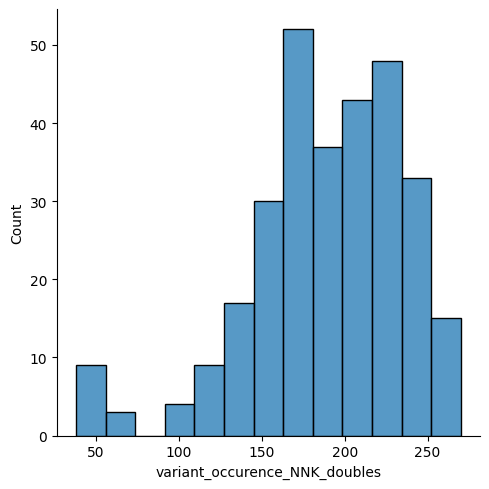

In [95]:
sns.displot(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_NNK_doubles'] > 0]['variant_occurence_NNK_doubles'])

In [96]:
np.median(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_NNK_doubles'] > 0]['variant_occurence_NNK_doubles'])

190.0

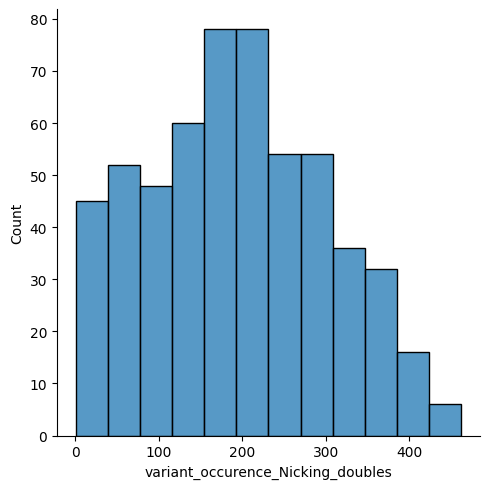

In [97]:
sns.displot(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_Nicking_doubles'] > 0]['variant_occurence_Nicking_doubles'])

In [98]:
np.median(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_Nicking_doubles'] > 0]['variant_occurence_Nicking_doubles'])

191.0

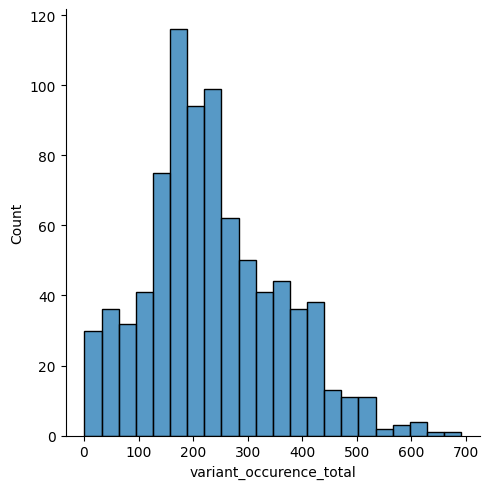

In [99]:
sns.displot(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['variant_occurence_total'])

In [100]:
np.median(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['variant_occurence_total'])

219.0

In [101]:
# counting how many times a mutation is measured in different genetic backgrounds 
# (all variants across the 3 doubles datasets without duplicates)

In [102]:
all_variants['eLife_doubles']

merge_seq  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
...                                           ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   

                                           aa_seq  Nham_nt  Nham_aa  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
...                                           ...      ...      ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   

       Nmut_codons   WT   STOP  STOP_readthrough    mean_count  count_e1_s0  \
1                1  NaN  False             False    210.500000        212.0   
2                1  NaN  False             False  28544.000000      38851.0   
3                2  NaN  False             False    170.000000        190.0   
4                2  NaN  False             False    146.000000        172.0   
5                2  NaN  False             False     64.500000         50.0   
...            ...  ...    ...               ...           ...          ...   
18645            2  NaN  False             False     61.000000         61.0   
18646            2  NaN  False             False     61.000000          NaN   
18647            2  NaN  False             False     94.500000        112.0   
18648            1  NaN  False             False    161.666667        212.0   
18649            1  NaN  False             False     74.000000         76.0   

       ...  fitness3_uncorr  sigma3_uncorr   fitness     sigma  nscore_c  \
1      ...              NaN            NaN -0.117352  0.387033 -0.031054   
2      ...         0.785219       0.299795  0.352500  0.062247  0.438798   
3      ...              NaN            NaN  0.381524  0.420981  0.467821   
4      ...              NaN            NaN  0.052856  0.450957  0.139154   
5      ...              NaN            NaN  0.495394  0.711069  0.581692   
...    ...              ...            ...       ...       ...       ...   
18645  ...              NaN            NaN -0.885994  0.894598 -0.799697   
18646  ...              NaN            NaN -2.245360  1.278978 -2.159063   
18647  ...              NaN            NaN -3.576266  0.732316 -3.489969   
18648  ...        -0.000494       0.993911  0.066515  0.359042  0.152813   
18649  ...              NaN            NaN  0.327003  0.640515  0.413300   

       sigma_norm_first_toWT  category_sigma  zscore_mode  p.adjust_mode  \
1                   0.116471    classifiable    -0.080236   9.593123e-01   
2                   0.018732    classifiable     7.049259   2.372307e-11   
3                   0.126687    classifiable     1.111265   3.692032e-01   
4                   0.135707    classifiable     0.308574   8.323199e-01   
5                   0.213984    classifiable     0.818052   5.286066e-01   
...                      ...             ...          ...            ...   
18645               0.269213    classifiable    -0.893918   4.859939e-01   
18646               0.384886  unclassifiable    -1.688115   1.467904e-01   
1864

In [103]:
all_variants['eLife_doubles']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    2582
KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQQLVIFAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQQLVLFAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQQLVFIAEDVGSNKGAIIGLMVGGVVIA       1
                                              ... 
DAEFRHDSGYEVHHQKLVVIAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQKLVVLAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQKLVVYAEDVGSNKGAIIGLMVGGVVIA       1
DAEFRHDSGYEVHHQKLVVSAEDVGSNKGAIIGLMVGGVVIA       1
FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       1
Name: count, Length: 16068, dtype: int64

In [104]:
all_variants['NNK_doubles']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAITGLMVGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGWMYGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGW*VGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGWVVGGVVIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGWGVGGVVIA    1
                                             ..
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLTVGGVPIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLTVGGVHIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLTVGGVQIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLTVGGVRIA    1
DAEFRHDSGYEVHHQKLVFFAEDVGSNFG*IIGLMVGGVVIA    1
Name: count, Length: 28530, dtype: int64

In [105]:
all_variants['Nicking_doubles']['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    61
KAETRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA     1
DAEFRHDSGCEVHHQKLVFFAEDVGSDKGAIIGLMVGGVVIA     1
DAEFRHDSGCEVHHQKLVFFAEDVGSGKGAIIGLMVGGVVIA     1
DAEFRHDSGCEVHHQKLVFFAEDVGSVKGAIIGLMVGGVVIA     1
                                              ..
DAEFRHHSGYEVHHQKLVFFATDVGSNKGAIIGLMVGGVVIA     1
DAEFRHHSGYEVHHQKLVFFARDVGSNKGAIIGLMVGGVVIA     1
DAEFRHHSGYEVHHQKLVFFASDVGSNKGAIIGLMVGGVVIA     1
DAEFRHHSGYEVHHQKLVFFAMDVGSNKGAIIGLMVGGVVIA     1
FAEFFHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA     1
Name: count, Length: 54649, dtype: int64

In [106]:
# without duplicates
all_variants_list = list(all_variants['eLife_doubles']['aa_seq']) + list(all_variants['NNK_doubles']['aa_seq']) + list(all_variants['Nicking_doubles']['aa_seq'])
all_variants_list = np.unique(all_variants_list)

In [107]:
len(all_variants_list)

93947

In [108]:
# add 3 columns to weights_Nucleation with the number of times this particular mutation occurs in a given doubles dataset (eLife, NNK, Nicking)

def add_occurence_no_duplicates(mut_id, # from weights_Nucleation['Sigmoid_l2_1e-05']['id'])
                               ):
    
    if mut_id == 'WT':
        return(0)
    
    else:
        # this is position - 1 to match python indices starting with 0
        curr_pos = int(mut_id[1:-1]) - 1

        curr_new_aa = mut_id[-1]

        count = 0

        for aa_variant in all_variants_list:
            if aa_variant[curr_pos] == curr_new_aa:
                count = count + 1
        
        return(count)

    
    


In [109]:
weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total_no_duplicates'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: add_occurence_no_duplicates(x))


In [110]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  std_kcal/mol  ci95_kcal/mol      ddEa  \
0    0.372521  0.341733  ...      0.008879       0.034804 -0.218317   
1   -2.320398 -2.029718  ...      0.162563       0.637248  1.398121   
2    0.037928  0.066478  ...      0.016091       0.063075 -0.034429   
3    0.063339  0.093359  ...      0.023453       0.091934 -0.033427   
4   -0.051849 -0.058691  ...      0.004320       0.016936  0.033764   
..        ...       ...  ...           ...            ...       ...   
836  0.082041  0.077438  ...      0.034749       0.136218 -0.097084   
837  0.256938  0.260202  ...      0.022226       0.087125 -0.161447   
838 -1.707580 -1.035545  ...      0.169805       0.665637  0.888338   
839 -1.146212 -0.833155  ...      0.070392       0.275936  0.574368   
840 -0.623868 -0.809916  ...      0.125338       0.491325  0.476233   

     ddEa_scaled_and_shifted  std_scaled  variant_occurence_eLife_doubles  \
0                  -0.936982    0.038105                                0   
1                   6.000520    0.697696                                1   
2                  -0.147763    0.069058                               11   
3                  -0.143465    0.100655                                1   
4                   0.144910    0.018542                              210   
..                       ...         ...                              ...   
836                -0.416672    0.149139                              154   
837                -0.692907    0.095389                              181   
838                 3.812609    0.728779                                0   
839                 2.465099    0.302110                                0   
840                 2.043918    0.537931                                0   

     variant_occurence_NNK_doubles  variant_occurence_Nicking_doubles  \
0                                0                                  0   
1                                0                                 65   
2                                0                                298   
3                                0                                203   
4                                0                                296   
..                             ...                                ...   
836                            236                                  0   
837                            239                                  0   
838                            188                                  0   
839                            172                                  0   
840                              0                                  3   

    variant_occurence_total  variant_occurence_total_no_duplicates  
0                         0                                      0  
1                        66                                     65  
2                       309                                    304  
3                       204                                    203  
4                       506                                    415  
..                      ...          

/tmp/ipykernel_326527/2252008968.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total'])


<Axes: xlabel='variant_occurence_total', ylabel='Density'>

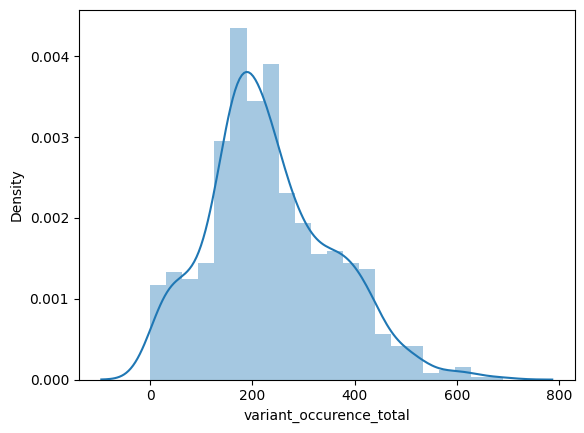

In [111]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total'])

/tmp/ipykernel_326527/721163454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total_no_duplicates'])


<Axes: xlabel='variant_occurence_total_no_duplicates', ylabel='Density'>

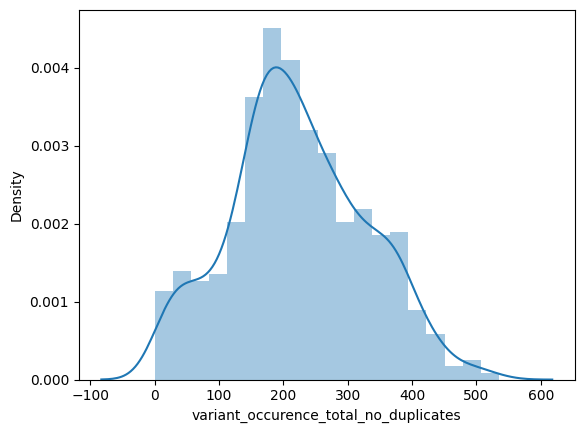

In [112]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total_no_duplicates'])

In [113]:
np.median(weights_Nucleation['Sigmoid_l2_1e-05']['variant_occurence_total_no_duplicates'])

215.0

In [114]:
# assing structured / unstructured in different Ab42 structures

structured_pos = {}

structured_pos['2beg'] = [i for i in range(17,43)]
structured_pos['2mxu'] = [i for i in range(11,43)]
structured_pos['2nao'] = [i for i in range(15,43)]
structured_pos['5kk3'] = [i for i in range(11,43)]
structured_pos['5oqv'] = [i for i in range(1,43)]
structured_pos['7q4b'] = [i for i in range(9,43)]
structured_pos['7q4m'] = [i for i in range(12,43)]
structured_pos['8ezd'] = [i for i in range(12,43)]
structured_pos['8eze'] = [i for i in range(1,43)]




In [115]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  std_kcal/mol  ci95_kcal/mol      ddEa  \
0    0.372521  0.341733  ...      0.008879       0.034804 -0.218317   
1   -2.320398 -2.029718  ...      0.162563       0.637248  1.398121   
2    0.037928  0.066478  ...      0.016091       0.063075 -0.034429   
3    0.063339  0.093359  ...      0.023453       0.091934 -0.033427   
4   -0.051849 -0.058691  ...      0.004320       0.016936  0.033764   
..        ...       ...  ...           ...            ...       ...   
836  0.082041  0.077438  ...      0.034749       0.136218 -0.097084   
837  0.256938  0.260202  ...      0.022226       0.087125 -0.161447   
838 -1.707580 -1.035545  ...      0.169805       0.665637  0.888338   
839 -1.146212 -0.833155  ...      0.070392       0.275936  0.574368   
840 -0.623868 -0.809916  ...      0.125338       0.491325  0.476233   

     ddEa_scaled_and_shifted  std_scaled  variant_occurence_eLife_doubles  \
0                  -0.936982    0.038105                                0   
1                   6.000520    0.697696                                1   
2                  -0.147763    0.069058                               11   
3                  -0.143465    0.100655                                1   
4                   0.144910    0.018542                              210   
..                       ...         ...                              ...   
836                -0.416672    0.149139                              154   
837                -0.692907    0.095389                              181   
838                 3.812609    0.728779                                0   
839                 2.465099    0.302110                                0   
840                 2.043918    0.537931                                0   

     variant_occurence_NNK_doubles  variant_occurence_Nicking_doubles  \
0                                0                                  0   
1                                0                                 65   
2                                0                                298   
3                                0                                203   
4                                0                                296   
..                             ...                                ...   
836                            236                                  0   
837                            239                                  0   
838                            188                                  0   
839                            172                                  0   
840                              0                                  3   

    variant_occurence_total  variant_occurence_total_no_duplicates  
0                         0                                      0  
1                        66                                     65  
2                       309                                    304  
3                       204                                    203  
4                       506                                    415  
..                      ...          

In [116]:
structures = list(structured_pos.keys())
structures

['2beg', '2mxu', '2nao', '5kk3', '5oqv', '7q4b', '7q4m', '8ezd', '8eze']

In [117]:
for structure in structures:
    weights_Nucleation['Sigmoid_l2_1e-05']['structured_' + structure] = ['NA' for i in range(len(weights_Nucleation['Sigmoid_l2_1e-05']))]


In [118]:
for structure in structures:
    print(structure)

    for idx in weights_Nucleation['Sigmoid_l2_1e-05'].index:

        curr_mut_id = weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx,'id']

        if curr_mut_id != 'WT':
            curr_pos = int(curr_mut_id[1:-1])
            
            if curr_pos in structured_pos[structure]:
                weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx,'structured_' + structure] = 1
            else:
                weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx,'structured_' + structure] = 0



2beg
2mxu
2nao
5kk3
5oqv
7q4b
7q4m
8ezd
8eze


In [119]:
weights_Nucleation['Sigmoid_l2_1e-05'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
       'std_scaled', 'variant_occurence_eLife_doubles',
       'variant_occurence_NNK_doubles', 'variant_occurence_Nicking_doubles',
       'variant_occurence_total', 'variant_occurence_total_no_duplicates',
       'structured_2beg', 'structured_2mxu', 'structured_2nao',
       'structured_5kk3', 'structured_5oqv', 'structured_7q4b',
       'structured_7q4m', 'structured_8ezd', 'structured_8eze'],
      dtype='object')

In [120]:
weights_Nucleation['Sigmoid_l2_1e-05']['position'] = [int(mut_id[1:-1]) if mut_id != 'WT' else 'NA' for mut_id in list(weights_Nucleation['Sigmoid_l2_1e-05']['id'])]


In [121]:
weights_Nucleation['Sigmoid_l2_1e-05']['position']

0      NA
1       1
2       1
3       1
4       1
       ..
836    42
837    42
838    42
839    42
840    11
Name: position, Length: 841, dtype: object

In [122]:
weights_Nucleation['Sigmoid_l2_1e-05'][1:]

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
5     D1F    D1F   1.0      1.0 -0.232830 -0.264132 -0.034940 -0.116136   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  structured_2beg  structured_2mxu  \
1   -2.320398 -2.029718  ...                0                0   
2    0.037928  0.066478  ...                0                0   
3    0.063339  0.093359  ...                0                0   
4   -0.051849 -0.058691  ...                0                0   
5   -0.133847 -0.200032  ...                0                0   
..        ...       ...  ...              ...              ...   
836  0.082041  0.077438  ...                1                1   
837  0.256938  0.260202  ...                1                1   
838 -1.707580 -1.035545  ...                1                1   
839 -1.146212 -0.833155  ...                1                1   
840 -0.623868 -0.809916  ...                0                1   

     structured_2nao  structured_5kk3  structured_5oqv  structured_7q4b  \
1                  0                0                1                0   
2                  0                0                1                0   
3                  0                0                1                0   
4                  0                0                1                0   
5                  0                0                1                0   
..               ...              ...              ...              ...   
836                1                1                1                1   
837                1                1                1                1   
838                1                1                1                1   
839                1                1                1                1   
840                0                1                1                1   

     structured_7q4m  structured_8ezd structured_8eze  position  
1                  0                0               1         1  
2                  0                0               1         1  
3                  0                0               1         1  
4                  0                0               1         1  
5                  0                0               1         1  
..               ...              ...             ...       ...  
836                1                1               1        42  
837                1                1               1        42  
838                1                1               1        42  
839                1                1               1        42  
840                0                0               1        11  

[840 rows x 40 columns]

In [123]:
# from pos 17 - structured in all PDBs
weights_Nucleation_all_structured = weights_Nucleation['Sigmoid_l2_1e-05'][1:][weights_Nucleation['Sigmoid_l2_1e-05'][1:]['position'] > 16]


/tmp/ipykernel_326527/113871941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation_all_structured['ddEa_scaled_and_shifted'])
/tmp/ipykernel_326527/113871941.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifte

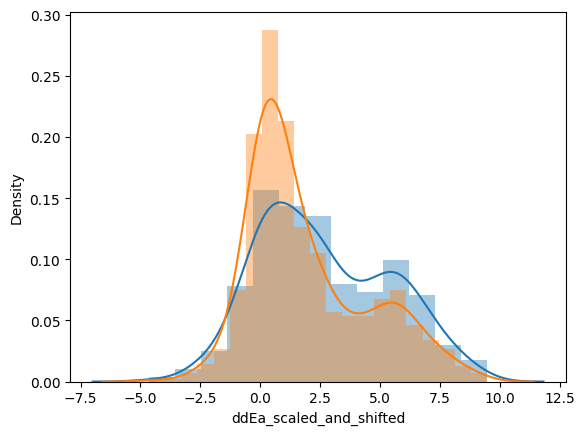

In [125]:
sns.distplot(weights_Nucleation_all_structured['ddEa_scaled_and_shifted'])
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05'][1:]['ddEa_scaled_and_shifted'])


plt.savefig('./figures/20240716_ddEa_structured_blue_and_all_orange.pdf',
           bbox_inches = 'tight')

# Hard code rate constants (and related terms) from curated resource (provided by Benni)

In [126]:
rate_constants = {}


rate_constants['thacker'] = pd.DataFrame(index = ['V-18-S_A-21-S', 'V-40-S_A-42-S',
                                                  'A-21-S','A-42-S','V-18-S','V-40-S','WT'],
                                         data = {'lambda_thacker': [0.1, 0.125, 0.194,
                                                                    0.115, 0.00695, 0.180, 0.0908447],
                                                  'kappa_thacker': [1.23, 1.86, 4.73, 1.72, 1.49,
                                                                    1.81, 5.726065773],
                                                 'k+kn_thacker': [5.56E+08, 8.68E+08, 2.09E+09, 
                                                                  7.35E+08, 2.68E+06, 1.80E+09,
                                                                  4.58E+08],
                                                 'k+k2_thacker': [2.80E+16, 6.41E+16, 4.14E+17, 
                                                                  5.48E+16, 4.11E+16, 6.07E+16,
                                                                  6.07E+17]
                                                })

rate_constants['meisl'] = pd.DataFrame(index = ['V-18-S_A-21-S', 'WT', 'I-41-*', 'D-23-N', 'E-22-G', 
                                                'E-22-Q'],
                                         data = {'k+kn_meisl': [26, 4.80, 0.31,
                                                                380, 4200, 410],
                                                  'k+k2_meisl': [16000000000, 86000000000,
                                                                1000000000, 11000000000000,
                                                                8100000000000, 550000000000]})

rate_constants['yang'] = pd.DataFrame(index = ['WT','D-23-N','E-22-G','E-22-Q',
                                               'E-22-K','A-21-G'],
                                         data = {'kn_yang': [0.0000158459,0.000954736, 0.006455339, 0.000574658,
                                                             0.000416865, 0.0000741277],
                                                  'k2_yang': [27542.28703, 25118864.32, 11350108.16, 676082.9754,
                                                              114815.3621, 13182.56739]})



rate_constants['ilestoth'] = pd.DataFrame(index = ['WT', 'D-23-N','E-22-G',
                                                   'E-22-Q','E-22-K','A-21-G',
                                                   'H-6-R','D-7-N'],
                                         data = {'lambda_ilestoth': [0.0000106, 0.000359,
                                                                     0.000747, 0.00000000435, 
                                                                     0.00041, 0.00000219,
                                                                     0.0000129, 0.0000457],
                                                  'kappa_ilestoth': [0.000198, 0.00652, 0.0101,
                                                                     0.000719, 0.00209, 0.0000984,
                                                                     0.0000407, 0.0000189],
                                                 'k+kn_ilestoth': [0.089888, 103.1048, 446.4072, 
                                                                   0.000000015138, 134.48, 0.00383688,
                                                                   0.133128, 1.670792],
                                                 'k+k2_ilestoth': [1254528, 1360332800, 3264320000, 
                                                                   16542752, 139779200, 309841.92,
                                                                   53007.68, 11430.72]
                                                })

In [127]:
# for all the variants present in rate_constants tables, check which all_variants datasets they are in

rate_constants_vars2to_full_Abeta_seq = dict.fromkeys(['V-18-S_A-21-S', 'V-40-S_A-42-S', 'A-21-S',
                           'A-42-S', 'V-18-S','V-40-S','WT','I-41-*',
                           'D-23-N', 'E-22-G', 'E-22-Q', 'E-22-K', 
                           'A-21-G', 'H-6-R', 'D-7-N'] )

In [128]:
rate_constants_vars2to_full_Abeta_seq

{'V-18-S_A-21-S': None,
 'V-40-S_A-42-S': None,
 'A-21-S': None,
 'A-42-S': None,
 'V-18-S': None,
 'V-40-S': None,
 'WT': None,
 'I-41-*': None,
 'D-23-N': None,
 'E-22-G': None,
 'E-22-Q': None,
 'E-22-K': None,
 'A-21-G': None,
 'H-6-R': None,
 'D-7-N': None}

In [129]:
AB_WT = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"

In [130]:
rate_constants_vars2to_full_Abeta_seq['V-18-S_A-21-S'] = 'DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['V-40-S_A-42-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS'
rate_constants_vars2to_full_Abeta_seq['A-21-S'] = 'DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['A-42-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS'
rate_constants_vars2to_full_Abeta_seq['V-18-S'] = 'DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['V-40-S'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA'
rate_constants_vars2to_full_Abeta_seq['WT'] = AB_WT
rate_constants_vars2to_full_Abeta_seq['I-41-*'] = 'DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A'
rate_constants_vars2to_full_Abeta_seq['D-23-N'] = 'DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-G'] = 'DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-Q'] = 'DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['E-22-K'] = 'DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['A-21-G'] = 'DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['H-6-R'] = 'DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'
rate_constants_vars2to_full_Abeta_seq['D-7-N'] = 'DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA'


In [131]:
all_variants

{'eLife_doubles':                                         merge_seq  \
 1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 ...                                           ...   
 18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
 
                                            aa_seq  Nham_nt  Nham_aa  \
 1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
 2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
 3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
 4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVG

In [132]:
all_variants['NNK_doubles']

nt_seq                                      aa_seq  Nham_nt  Nham_aa  \
1        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAITGLMVGGVVIA      NaN        2   
2        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIKLMVGGVVIA      NaN        2   
3        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIITLMVGGVVIA      NaN        2   
4        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIISLMVGGVVIA      NaN        2   
5        NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNKKAIIMLMVGGVVIA      NaN        2   
...      ...                                         ...      ...      ...   
28526    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIIGFMVGGVVIA      NaN        2   
28527    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAILGLMVGGVVIA      NaN        2   
28528    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAIGGLMVGGVVIA      NaN        2   
28529    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFGAGIGLMVGGVVIA      NaN        2   
28530    NaN  DAEFRHDSGYEVHHQKLVFFAEDVGSNFG*IIGLMVGGVVIA      NaN        2   

       Nmut_codons   WT  indel   STOP  STOP_readthrough  mean_count  ...  \
1              NaN  NaN  False  False             False  116.000000  ...   
2              NaN  NaN  False  False             False    8.666667  ...   
3              NaN  NaN  False  False             False   57.666667  ...   
4              NaN  NaN  False  False             False  138.000000  ...   
5              NaN  NaN  False  False             False  196.666667  ...   
...            ...  ...    ...    ...               ...         ...  ...   
28526          NaN  NaN  False  False             False   97.333333  ...   
28527          NaN  NaN  False  False             False   72.666667  ...   
28528          NaN  NaN  False  False             False   33.333333  ...   
28529          NaN  NaN  False  False             False  113.333333  ...   
28530          NaN  NaN  False   True             False  111.333333  ...   

       count_e2_s1  count_e3_s1  fitness1_uncorr  fitness2_uncorr  \
1                0           23        -2.779356              NaN   
2                0           11              NaN              NaN   
3                0           17        -2.639310              NaN   
4               52            0              NaN        -0.643774   
5                0           13        -4.086025              NaN   
...            ...          ...              ...              ...   
28526            0            0        -2.601852              NaN   
28527           22            0              NaN        -3.028144   
28528            0            0        -3.196120              NaN   
28529            0           27        -2.209778              NaN   
28530            0           22              NaN              NaN   

       fitness3_uncorr  sigma1_uncorr  sigma2_uncorr  sigma3_uncorr   fitness  \
1            -3.167846       1.063514            NaN       1.623135 -2.896045   
2            -2.394447            NaN            NaN       3.007552 -2.394447   
3            -2.976230       1.306890            NaN       1.986638 -2.741074   
4                  NaN            NaN       3.094312            NaN -0.643774   
5            -3.947984       0.967330            NaN       1.759826 -4.053995   
...                ...            ...            ...            ...       ...   
28526              NaN       0.852818            NaN            NaN -2.601852   
28527              NaN            NaN       1.759443            NaN -3.028144   
28528              NaN       1.210447            NaN            NaN -3.196120   
28529        -3.108238       0.779557            NaN       1.531268 -2.394707   
28530        -2.890738            NaN            NaN       1.803738 -2.890738   

          sigma  
1      0.889568  
2      3.007552  
3      1.091826  
4      3.094312  
5      0.847707  
...         ...  
28526  0.852818  
28527  1.759443  
28528  1.210447  
28529  0.694712  
28530  1.803738  

[28530 rows x 24 columns]

In [133]:
for mutation,variant in rate_constants_vars2to_full_Abeta_seq.items():
    print(mutation,variant)
    for dataset in datasets:
        print('DATASET:',dataset)
        if variant in list(all_variants[dataset]['aa_seq']):
            print('### present ###')
            #print(all_variants[dataset][all_variants[dataset]['aa_seq'] == variant])
            
            
            
        #else:
            #print('### absent ###')
            
    print('\n')
        

V-18-S_A-21-S DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
DATASET: NNK_doubles
DATASET: Nicking_doubles


V-40-S_A-42-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS
DATASET: eLife_doubles
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


A-21-S DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
DATASET: Nicking_doubles
### present ###


A-42-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


V-18-S DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
DATASET: NNK_doubles
DATASET: Nicking_doubles
### present ###


V-40-S DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: Nicking_doubles


WT DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
DATASET: eLife_doubles
### present ###
DATASET: NNK_doubles
### present ###
DATASET: N

In [134]:
rate_constants_datasets = list(rate_constants.keys())

In [135]:
rate_constants['thacker']

lambda_thacker  kappa_thacker  k+kn_thacker  k+k2_thacker
V-18-S_A-21-S        0.100000       1.230000  5.560000e+08  2.800000e+16
V-40-S_A-42-S        0.125000       1.860000  8.680000e+08  6.410000e+16
A-21-S               0.194000       4.730000  2.090000e+09  4.140000e+17
A-42-S               0.115000       1.720000  7.350000e+08  5.480000e+16
V-18-S               0.006950       1.490000  2.680000e+06  4.110000e+16
V-40-S               0.180000       1.810000  1.800000e+09  6.070000e+16
WT                   0.090845       5.726066  4.580000e+08  6.070000e+17

In [136]:
for rate_constants_dataset in rate_constants_datasets:
    rate_constants[rate_constants_dataset]['Ab_variant_full'] = [rate_constants_vars2to_full_Abeta_seq[mutation] for mutation in rate_constants[rate_constants_dataset].index]
    rate_constants[rate_constants_dataset]['mutation_id'] = rate_constants[rate_constants_dataset].index
    
    rate_constants[rate_constants_dataset].set_index('Ab_variant_full', inplace=True)
    
    for dataset_doubles in datasets:
        print(dataset_doubles)
        rate_constants[rate_constants_dataset]['NS_' + dataset_doubles] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
        rate_constants[rate_constants_dataset]['sigma_' + dataset_doubles] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
            

eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles
eLife_doubles
NNK_doubles
Nicking_doubles


In [137]:
rate_constants['thacker']

lambda_thacker  kappa_thacker  \
Ab_variant_full                                                             
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA        0.100000       1.230000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS        0.125000       1.860000   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA        0.194000       4.730000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS        0.115000       1.720000   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA        0.006950       1.490000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA        0.180000       1.810000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0.090845       5.726066   

                                            k+kn_thacker  k+k2_thacker  \
Ab_variant_full                                                          
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  5.560000e+08  2.800000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  8.680000e+08  6.410000e+16   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA  2.090000e+09  4.140000e+17   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS  7.350000e+08  5.480000e+16   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA  2.680000e+06  4.110000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA  1.800000e+09  6.070000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  4.580000e+08  6.070000e+17   

                                              mutation_id NS_eLife_doubles  \
Ab_variant_full                                                              
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  V-18-S_A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  V-40-S_A-42-S             None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA         A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS         A-42-S             None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA         V-18-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA         V-40-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             WT             None   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS                None           None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS                None           None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                None           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS              None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS              None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS               None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS               None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA               None   

                                           sigma_Nicking_doubles  
Ab_variant_full     

In [138]:
rate_constants['yang']

kn_yang       k2_yang  \
Ab_variant_full                                                      
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.000016  2.754229e+04   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA  0.000955  2.511886e+07   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA  0.006455  1.135011e+07   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA  0.000575  6.760830e+05   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA  0.000417  1.148154e+05   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  0.000074  1.318257e+04   

                                           mutation_id NS_eLife_doubles  \
Ab_variant_full                                                           
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT             None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N             None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G             None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q             None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K             None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G             None   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA                None           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA               None   

                                           sigma_Nicking_doubles  
Ab_variant_full                                                   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                  None  
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA                  None  
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA                  None  
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA                  None  
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA                  None  
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA                  None

In [151]:
weights_Nucleation['Sigmoid_l2_1e-05'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
       'std_scaled', 'variant_occurence_eLife_doubles',
       'variant_occurence_NNK_doubles', 'variant_occurence_Nicking_doubles',
       'variant_occurence_total', 'variant_occurence_total_no_duplicates',
       'structured_2beg', 'structured_2mxu', 'structured_2nao',
       'structured_5kk3', 'structured_5oqv', 'structured_7q4b',
       'structured_7q4m', 'structured_8ezd', 'structured_8eze', 'position'],
      dtype='object')

In [173]:
# add columns with ddEa and NS_eLife, NS_NNK and NS_Niking to rate_constants tables
# (where present, fitness column - ignore the nscore_c in eLife)

for rate_constants_dataset in rate_constants_datasets:
    
    print(rate_constants_dataset)
    
    # add empty ddEa column
    rate_constants[rate_constants_dataset]['ddEa_joint_model'] = [None for i in range(len(rate_constants[rate_constants_dataset]))]
    
    for Ab_variant in list(rate_constants[rate_constants_dataset].index):
        print(Ab_variant)
        
        for dataset_doubles in datasets:
            print(dataset_doubles)
            
            if Ab_variant in list(all_variants[dataset_doubles].aa_seq):
                print('presence detected')
                rate_constants[rate_constants_dataset].loc[Ab_variant,'NS_' + dataset_doubles] = list(all_variants[dataset_doubles][all_variants[dataset_doubles]['aa_seq'] == Ab_variant]['fitness'])[0]
                rate_constants[rate_constants_dataset].loc[Ab_variant,'sigma_' + dataset_doubles] = list(all_variants[dataset_doubles][all_variants[dataset_doubles]['aa_seq'] == Ab_variant]['sigma'])[0]
                print('added values:', rate_constants[rate_constants_dataset].loc[Ab_variant,'NS_' + dataset_doubles], 
                      rate_constants[rate_constants_dataset].loc[Ab_variant,'sigma_' + dataset_doubles])
            
        # current mutation id, dropping '-' to conform with what is in weights_Nucleation
        curr_mutation_id = rate_constants[rate_constants_dataset].loc[Ab_variant,'mutation_id']
        curr_mutation_id_weights = curr_mutation_id.replace('-','')
        #print(curr_mutation_id, curr_mutation_id_weights)
        
        if curr_mutation_id_weights in list(weights_Nucleation['Sigmoid_l2_1e-05']['id']):
            #print(curr_mutation_id_weights)
            rate_constants[rate_constants_dataset].loc[Ab_variant,'ddEa_joint_model'] = list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['id'] == curr_mutation_id_weights]['ddEa'])[0]
        
        print('\n')


thacker
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
NNK_doubles
Nicking_doubles


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS
eLife_doubles
NNK_doubles
presence detected
added values: -2.63501912325526 0.950231094626351
Nicking_doubles


DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
presence detected
added values: -0.687335965125827 0.0891242199514508
NNK_doubles
Nicking_doubles
presence detected
added values: -0.973073360802904 0.123773359672916


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS
eLife_doubles
presence detected
added values: -0.192408556898931 0.0695264213258618
NNK_doubles
presence detected
added values: 0.409400319482098 0.139410813674478
Nicking_doubles


DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA
eLife_doubles
NNK_doubles
Nicking_doubles
presence detected
added values: -0.945573779255418 0.133584662681664


DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA
eLife_doubles
presence detected
added values: -2.9563009512312 0.885221768220817
NNK_doubles
presenc

In [174]:
# add ln columns to rate_constants tables
rate_constants['thacker']['log_lambda_thacker'] = np.log(rate_constants['thacker']['lambda_thacker'])
rate_constants['thacker']['log_kappa_thacker'] = np.log(rate_constants['thacker']['kappa_thacker'])

rate_constants['thacker']['log_k+kn_thacker'] = np.log(rate_constants['thacker']['k+kn_thacker'])
rate_constants['thacker']['log_k+k2_thacker'] = np.log(rate_constants['thacker']['k+k2_thacker'])

# adding log(k_M/k_WT) = log(k_M) - log(k_WT) for kn and k2
rate_constants['thacker']['log_k+kn_M_minus_log_k+kn_WT_thacker'] = [rate_constants['thacker'].loc[idx, 'log_k+kn_thacker'] - rate_constants['thacker'].loc[AB_WT, 'log_k+kn_thacker'] for idx in list(rate_constants['thacker'].index)]
rate_constants['thacker']['log_k+k2_M_minus_log_k+k2_WT_thacker'] = [rate_constants['thacker'].loc[idx, 'log_k+k2_thacker'] - rate_constants['thacker'].loc[AB_WT, 'log_k+k2_thacker'] for idx in list(rate_constants['thacker'].index)]


rate_constants['meisl']['log_k+kn_meisl'] = np.log(rate_constants['meisl']['k+kn_meisl'])
rate_constants['meisl']['log_k+k2_meisl'] = np.log(rate_constants['meisl']['k+k2_meisl'])

rate_constants['yang']['log_kn_yang'] = np.log(rate_constants['yang']['kn_yang'])
rate_constants['yang']['log_k2_yang'] = np.log(rate_constants['yang']['k2_yang'])

# adding log(k_M/k_WT) = log(k_M) - log(k_WT) for kn and k2
rate_constants['yang']['log_kn_M_minus_log_kn_WT_yang'] = [rate_constants['yang'].loc[idx, 'log_kn_yang'] - rate_constants['yang'].loc[AB_WT, 'log_kn_yang'] for idx in list(rate_constants['yang'].index)]
rate_constants['yang']['log_k2_M_minus_log_k2_WT_yang'] = [rate_constants['yang'].loc[idx, 'log_k2_yang'] - rate_constants['yang'].loc[AB_WT, 'log_k2_yang'] for idx in list(rate_constants['yang'].index)]


rate_constants['ilestoth']['log_lambda_ilestoth'] = np.log(rate_constants['ilestoth']['lambda_ilestoth'])
rate_constants['ilestoth']['log_kappa_ilestoth'] = np.log(rate_constants['ilestoth']['kappa_ilestoth'])

rate_constants['ilestoth']['log_k+kn_ilestoth'] = np.log(rate_constants['ilestoth']['k+kn_ilestoth'])
rate_constants['ilestoth']['log_k+k2_ilestoth'] = np.log(rate_constants['ilestoth']['k+k2_ilestoth'])

# adding log(k_M/k_WT) = log(k_M) - log(k_WT) for kn and k2
rate_constants['ilestoth']['log_k+kn_M_minus_log_k+kn_WT_ilestoth'] = [rate_constants['ilestoth'].loc[idx, 'log_k+kn_ilestoth'] - rate_constants['ilestoth'].loc[AB_WT, 'log_k+kn_ilestoth'] for idx in list(rate_constants['ilestoth'].index)]
rate_constants['ilestoth']['log_k+k2_M_minus_log_k+k2_WT_ilestoth'] = [rate_constants['ilestoth'].loc[idx, 'log_k+k2_ilestoth'] - rate_constants['ilestoth'].loc[AB_WT, 'log_k+k2_ilestoth'] for idx in list(rate_constants['ilestoth'].index)]



In [175]:
rate_constants['thacker']

lambda_thacker  kappa_thacker  \
Ab_variant_full                                                             
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA        0.100000       1.230000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS        0.125000       1.860000   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA        0.194000       4.730000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS        0.115000       1.720000   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA        0.006950       1.490000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA        0.180000       1.810000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0.090845       5.726066   

                                            k+kn_thacker  k+k2_thacker  \
Ab_variant_full                                                          
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  5.560000e+08  2.800000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  8.680000e+08  6.410000e+16   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA  2.090000e+09  4.140000e+17   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS  7.350000e+08  5.480000e+16   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA  2.680000e+06  4.110000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA  1.800000e+09  6.070000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  4.580000e+08  6.070000e+17   

                                              mutation_id NS_eLife_doubles  \
Ab_variant_full                                                              
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  V-18-S_A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  V-40-S_A-42-S             None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA         A-21-S        -0.687336   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS         A-42-S        -0.192409   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA         V-18-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA         V-40-S        -2.956301   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             WT        -0.254861   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS                None      -2.635019   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA            0.089124           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS            0.069526         0.4094   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA            0.885222      -3.124643   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS          0.950231   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS          0.139411   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA          0.152348   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS               None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA          -0.973073   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS               None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA          -0.945574   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   

                                           sigma_Nicking_doubles  \
Ab_variant_full    

In [176]:
rate_constants['thacker']

lambda_thacker  kappa_thacker  \
Ab_variant_full                                                             
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA        0.100000       1.230000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS        0.125000       1.860000   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA        0.194000       4.730000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS        0.115000       1.720000   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA        0.006950       1.490000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA        0.180000       1.810000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0.090845       5.726066   

                                            k+kn_thacker  k+k2_thacker  \
Ab_variant_full                                                          
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  5.560000e+08  2.800000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  8.680000e+08  6.410000e+16   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA  2.090000e+09  4.140000e+17   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS  7.350000e+08  5.480000e+16   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA  2.680000e+06  4.110000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA  1.800000e+09  6.070000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  4.580000e+08  6.070000e+17   

                                              mutation_id NS_eLife_doubles  \
Ab_variant_full                                                              
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  V-18-S_A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  V-40-S_A-42-S             None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA         A-21-S        -0.687336   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS         A-42-S        -0.192409   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA         V-18-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA         V-40-S        -2.956301   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             WT        -0.254861   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS                None      -2.635019   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA            0.089124           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS            0.069526         0.4094   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA            0.885222      -3.124643   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS          0.950231   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS          0.139411   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA          0.152348   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS               None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA          -0.973073   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS               None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA          -0.945574   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   

                                           sigma_Nicking_doubles  \
Ab_variant_full    

In [177]:
rate_constants['meisl']

k+kn_meisl      k+k2_meisl  \
Ab_variant_full                                                          
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA       26.00     16000000000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        4.80     86000000000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A        0.31      1000000000   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      380.00  11000000000000   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA     4200.00   8100000000000   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      410.00    550000000000   

                                              mutation_id NS_eLife_doubles  \
Ab_variant_full                                                              
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  V-18-S_A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             WT        -0.254861   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A         I-41-*        -1.577875   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA         D-23-N         1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA         E-22-G         2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA         E-22-Q         1.723532   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A            0.274761      -2.908989   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA            0.078701           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA            0.064394           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA            0.117333           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A          0.272671   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A               None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA           1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA           2.170153   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA           2.148203   

                                           sigma_Nicking_doubles  \
Ab_variant_full                                                    
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                  None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              0.219638   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A                  None   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA               0.18808   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              0.120295   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              0.211482   

                                           ddEa_joint_model  log_k+kn_meisl  \
Ab_variant_full                                                               
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA             None        3.258097   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        -0.218317        1.568616   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A         1.239732       -1.171183   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA         -0.36668        5.940171   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA        -0.891521        8.342840   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA   

In [178]:
rate_constants['ilestoth']

lambda_ilestoth  kappa_ilestoth  \
Ab_variant_full                                                               
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA     1.060000e-05        0.000198   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA     3.590000e-04        0.006520   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA     7.470000e-04        0.010100   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA     4.350000e-09        0.000719   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA     4.100000e-04        0.002090   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA     2.190000e-06        0.000098   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA     1.290000e-05        0.000041   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA     4.570000e-05        0.000019   

                                            k+kn_ilestoth  k+k2_ilestoth  \
Ab_variant_full                                                            
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   8.988800e-02   1.254528e+06   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA   1.031048e+02   1.360333e+09   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA   4.464072e+02   3.264320e+09   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA   1.513800e-08   1.654275e+07   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA   1.344800e+02   1.397792e+08   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA   3.836880e-03   3.098419e+05   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   1.331280e-01   5.300768e+04   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   1.670792e+00   1.143072e+04   

                                           mutation_id NS_eLife_doubles  \
Ab_variant_full                                                           
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT        -0.254861   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N         1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G         2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q         1.723532   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K         0.532519   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G         0.136491   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       H-6-R         0.116281   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       D-7-N         0.225738   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA            0.078701           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA            0.064394           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA            0.117333           None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA            0.084528           None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA             0.08765           None   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.061508           None   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             0.07525           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA           1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKG

In [179]:
rate_constants['yang']

kn_yang       k2_yang  \
Ab_variant_full                                                      
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.000016  2.754229e+04   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA  0.000955  2.511886e+07   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA  0.006455  1.135011e+07   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA  0.000575  6.760830e+05   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA  0.000417  1.148154e+05   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  0.000074  1.318257e+04   

                                           mutation_id NS_eLife_doubles  \
Ab_variant_full                                                           
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT        -0.254861   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N         1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G         2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q         1.723532   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K         0.532519   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G         0.136491   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA            0.078701           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA            0.064394           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA            0.117333           None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA            0.084528           None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA             0.08765           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA           1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA           2.170153   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA           2.148203   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA           0.764645   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA           0.042437   

                                           sigma_Nicking_doubles  \
Ab_variant_full                                                    
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              0.219638   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA               0.18808   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              0.120295   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              0.211482   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              0.201663   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              0.128742   

                                           ddEa_joint_model  log_kn_yang  \
Ab_variant_full                                                            
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        -0.218317   -11.052600   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA         -0.36668    -6.954076   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA        -0.891521    -5.042848   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA        -0.620139    -7.461735   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA        -0.143366    -7.782748   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA         0.005184    -9.509721   

                                            lo

In [180]:
rate_constants['yang']

kn_yang       k2_yang  \
Ab_variant_full                                                      
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.000016  2.754229e+04   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA  0.000955  2.511886e+07   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA  0.006455  1.135011e+07   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA  0.000575  6.760830e+05   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA  0.000417  1.148154e+05   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  0.000074  1.318257e+04   

                                           mutation_id NS_eLife_doubles  \
Ab_variant_full                                                           
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT        -0.254861   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N         1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G         2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q         1.723532   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K         0.532519   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G         0.136491   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA            0.078701           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA            0.064394           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA            0.117333           None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA            0.084528           None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA             0.08765           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA           1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA           2.170153   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA           2.148203   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA           0.764645   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA           0.042437   

                                           sigma_Nicking_doubles  \
Ab_variant_full                                                    
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              0.219638   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA               0.18808   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              0.120295   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              0.211482   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              0.201663   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              0.128742   

                                           ddEa_joint_model  log_kn_yang  \
Ab_variant_full                                                            
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        -0.218317   -11.052600   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA         -0.36668    -6.954076   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA        -0.891521    -5.042848   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA        -0.620139    -7.461735   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA        -0.143366    -7.782748   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA         0.005184    -9.509721   

                                            lo

In [181]:
rate_constants_copy2save = rate_constants.copy()

In [182]:
# change column names to operate with GR instead of NS

rate_constants_copy2save['thacker'] = rate_constants_copy2save['thacker'].loc[:,['lambda_thacker', 'kappa_thacker', 'k+kn_thacker', 'k+k2_thacker', 'mutation_id', 'NS_eLife_doubles',
       'NS_NNK_doubles','NS_Nicking_doubles', 'ddEa_joint_model',
       'log_k+kn_thacker', 'log_k+k2_thacker']]

rate_constants_copy2save['yang'] = rate_constants_copy2save['yang'].loc[:,['kn_yang', 'k2_yang', 'mutation_id', 'NS_eLife_doubles',
       'NS_NNK_doubles','NS_Nicking_doubles', 'ddEa_joint_model',
       'log_kn_yang', 'log_k2_yang']]


#rate_constants_copy2save['meisl'] = rate_constants_copy2save['meisl'].loc[:,['k+kn_meisl', 'k+k2_meisl', 'mutation_id', 'NS_eLife_doubles',
#      'NS_NNK_doubles','NS_Nicking_doubles', 'ddEa_joint_model',
#       'log_k+kn_meisl', 'log_k+k2_meisl']]

#rate_constants_copy2save['ilestoth'] = rate_constants_copy2save['ilestoth'].loc[:,['lambda_ilestoth', 'kappa_ilestoth', 'mutation_id', 'NS_eLife_doubles',
#       'NS_NNK_doubles', 'NS_Nicking_doubles', 'ddEa_joint_model',
#       'log_lambda_ilestoth', 'log_kappa_ilestoth', 'log_k+kn_ilestoth', 'log_k+k2_ilestoth']]



In [183]:
rate_constants_copy2save['thacker'].columns = ['lambda_thacker', 'kappa_thacker', 'k+kn_thacker', 'k+k2_thacker', 'mutation_id', 'GR_shallow_double_mutants',
       'GR_C_terminal_Ab42_mutants', 'GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
       'log_k+kn_thacker', 'log_k+k2_thacker']

rate_constants_copy2save['yang'].columns = ['kn_yang', 'k2_yang', 'mutation_id', 'GR_shallow_double_mutants',
       'GR_C_terminal_Ab42_mutants','GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
       'log_kn_yang', 'log_k2_yang']

#rate_constants_copy2save['meisl'].columns = ['k+kn_meisl', 'k+k2_meisl', 'mutation_id', 'GR_shallow_double_mutants',
#       'GR_C_terminal_Ab42_mutants','GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
#       'log_k+kn_meisl', 'log_k+k2_meisl']


#rate_constants_copy2save['ilestoth'].columns = ['lambda_illestoth', 'kappa_illestoth', 'mutation_id', 'GR_shallow_double_mutants',
#       'GR_C_terminal_Ab42_mutants', 'GR_N_terminal_Ab42_mutants', 'ddEa_joint_model',
#       'log_lambda_illestoth', 'log_kappa_illestoth', 'log_k+kn_ilestoth', 'log_k+k2_ilestoth']

# Plotting all data points [eLife, NNK and Nicking] together (per reference)

In [186]:
rate_constants_all_datasets = {}

for rate_constants_dataset in rate_constants_datasets:
    
    print(rate_constants_dataset)
    
    rate_constants_all_datasets[rate_constants_dataset] = {}


thacker
meisl
yang
ilestoth


In [187]:
datasets

['eLife_doubles', 'NNK_doubles', 'Nicking_doubles']

In [188]:
rate_constants['thacker'].columns

Index(['lambda_thacker', 'kappa_thacker', 'k+kn_thacker', 'k+k2_thacker',
       'mutation_id', 'NS_eLife_doubles', 'sigma_eLife_doubles',
       'NS_NNK_doubles', 'sigma_NNK_doubles', 'NS_Nicking_doubles',
       'sigma_Nicking_doubles', 'ddEa_joint_model', 'log_lambda_thacker',
       'log_kappa_thacker', 'log_k+kn_thacker', 'log_k+k2_thacker',
       'log_k+kn_M_minus_log_k+kn_WT_thacker',
       'log_k+k2_M_minus_log_k+k2_WT_thacker'],
      dtype='object')

In [189]:
rate_constants_all_datasets['thacker']['k+kn'] = pd.DataFrame(index = list(rate_constants['thacker'].index)*3,
                                                           data = {'log_k+kn': list(rate_constants['thacker']['log_k+kn_thacker'])*3,
                                                                   'log_k+kn_M_minus_log_k+kn_WT': list(rate_constants['thacker']['log_k+kn_M_minus_log_k+kn_WT_thacker'])*3,
                                                                   'mutation_id': list(rate_constants['thacker']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['thacker']['NS_eLife_doubles']) + list(rate_constants['thacker']['NS_NNK_doubles']) + list(rate_constants['thacker']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['thacker']))] + [datasets[1] for i in range(len(rate_constants['thacker']))] + [datasets[2] for i in range(len(rate_constants['thacker']))]
                                                                  }).dropna()


rate_constants_all_datasets['thacker']['k+k2'] = pd.DataFrame(index = list(rate_constants['thacker'].index)*3,
                                                           data = {'log_k+k2': list(rate_constants['thacker']['log_k+k2_thacker'])*3,
                                                                   'log_k+k2_M_minus_log_k+k2_WT': list(rate_constants['thacker']['log_k+k2_M_minus_log_k+k2_WT_thacker'])*3,
                                                                   'mutation_id': list(rate_constants['thacker']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['thacker']['NS_eLife_doubles']) + list(rate_constants['thacker']['NS_NNK_doubles']) + list(rate_constants['thacker']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['thacker']))] + [datasets[1] for i in range(len(rate_constants['thacker']))] + [datasets[2] for i in range(len(rate_constants['thacker']))]
                                                                  }).dropna()

In [190]:
rate_constants['yang'].columns

Index(['kn_yang', 'k2_yang', 'mutation_id', 'NS_eLife_doubles',
       'sigma_eLife_doubles', 'NS_NNK_doubles', 'sigma_NNK_doubles',
       'NS_Nicking_doubles', 'sigma_Nicking_doubles', 'ddEa_joint_model',
       'log_kn_yang', 'log_k2_yang', 'log_kn_M_minus_log_kn_WT_yang',
       'log_k2_M_minus_log_k2_WT_yang'],
      dtype='object')

In [191]:
rate_constants_all_datasets['yang']['kn'] = pd.DataFrame(index = list(rate_constants['yang'].index)*3,
                                                           data = {'log_kn': list(rate_constants['yang']['log_kn_yang'])*3,
                                                                   'log_kn_M_minus_log_kn_WT': list(rate_constants['yang']['log_kn_M_minus_log_kn_WT_yang'])*3,
                                                                   'mutation_id': list(rate_constants['yang']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['yang']['NS_eLife_doubles']) + list(rate_constants['yang']['NS_NNK_doubles']) + list(rate_constants['yang']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['yang']))] + [datasets[1] for i in range(len(rate_constants['yang']))] + [datasets[2] for i in range(len(rate_constants['yang']))]
                                                                  }).dropna()


rate_constants_all_datasets['yang']['k2'] = pd.DataFrame(index = list(rate_constants['yang'].index)*3,
                                                           data = {'log_k2': list(rate_constants['yang']['log_k2_yang'])*3,
                                                                   'log_k2_M_minus_log_k2_WT': list(rate_constants['yang']['log_k2_M_minus_log_k2_WT_yang'])*3,
                                                                   'mutation_id': list(rate_constants['yang']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['yang']['NS_eLife_doubles']) + list(rate_constants['yang']['NS_NNK_doubles']) + list(rate_constants['yang']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['yang']))] + [datasets[1] for i in range(len(rate_constants['yang']))] + [datasets[2] for i in range(len(rate_constants['yang']))]
                                                                  }).dropna()


In [192]:
rate_constants['ilestoth'].columns

Index(['lambda_ilestoth', 'kappa_ilestoth', 'k+kn_ilestoth', 'k+k2_ilestoth',
       'mutation_id', 'NS_eLife_doubles', 'sigma_eLife_doubles',
       'NS_NNK_doubles', 'sigma_NNK_doubles', 'NS_Nicking_doubles',
       'sigma_Nicking_doubles', 'ddEa_joint_model', 'log_lambda_ilestoth',
       'log_kappa_ilestoth', 'log_k+kn_ilestoth', 'log_k+k2_ilestoth',
       'log_k+kn_M_minus_log_k+kn_WT_ilestoth',
       'log_k+k2_M_minus_log_k+k2_WT_ilestoth'],
      dtype='object')

In [193]:
rate_constants_all_datasets['ilestoth']['k+kn'] = pd.DataFrame(index = list(rate_constants['ilestoth'].index)*3,
                                                           data = {'log_k+kn': list(rate_constants['ilestoth']['log_k+kn_ilestoth'])*3,
                                                                   'log_k+kn_M_minus_log_k+kn_WT': list(rate_constants['ilestoth']['log_k+kn_M_minus_log_k+kn_WT_ilestoth'])*3,
                                                                   'mutation_id': list(rate_constants['ilestoth']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['ilestoth']['NS_eLife_doubles']) + list(rate_constants['ilestoth']['NS_NNK_doubles']) + list(rate_constants['ilestoth']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['ilestoth']))] + [datasets[1] for i in range(len(rate_constants['ilestoth']))] + [datasets[2] for i in range(len(rate_constants['ilestoth']))]
                                                                  }).dropna()


rate_constants_all_datasets['ilestoth']['k+k2'] = pd.DataFrame(index = list(rate_constants['ilestoth'].index)*3,
                                                           data = {'log_k+k2': list(rate_constants['ilestoth']['log_k+k2_ilestoth'])*3,
                                                                   'log_k+k2_M_minus_log_k+k2_WT': list(rate_constants['ilestoth']['log_k+k2_M_minus_log_k+k2_WT_ilestoth'])*3,
                                                                   'mutation_id': list(rate_constants['ilestoth']['mutation_id'])*3,
                                                                   'NS': list(rate_constants['ilestoth']['NS_eLife_doubles']) + list(rate_constants['ilestoth']['NS_NNK_doubles']) + list(rate_constants['ilestoth']['NS_Nicking_doubles']),
                                                                   'dataset': [datasets[0] for i in range(len(rate_constants['ilestoth']))] + [datasets[1] for i in range(len(rate_constants['ilestoth']))] + [datasets[2] for i in range(len(rate_constants['ilestoth']))]
                                                                  }).dropna()


In [194]:
rate_constants_all_datasets['ilestoth']['k+kn']

log_k+kn  \
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  -2.409191   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA   4.635746   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA   6.101232   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA -18.006058   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA   4.901415   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  -5.563096   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  -2.016444   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   0.513298   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  -2.409191   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  -2.409191   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA   4.635746   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA   6.101232   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA -18.006058   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA   4.901415   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  -5.563096   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  -2.016444   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   0.513298   

                                            log_k+kn_M_minus_log_k+kn_WT  \
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      0.000000   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA                      7.044937   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA                      8.510422   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA                    -15.596867   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA                      7.310606   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA                     -3.153905   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      0.392747   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      2.922489   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      0.000000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      0.000000   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA                      7.044937   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA                      8.510422   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA                    -15.596867   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA                      7.310606   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA                     -3.153905   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      0.392747   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA                      2.922489   

                                           mutation_id        NS  \
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT -0.254861   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N  1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G  2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q  1.723532   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K  0.532519   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G  0.136491   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       H-6-R  0.116281   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       D-7-N  0.225738   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT  0.015158   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT  0.123825   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N  1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G  2.170153   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q  2.148203   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K  0.764645   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G  0.042437   
DAEFRRDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       H-6-R  0.089311   
DAEFRHNSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       D-7-N  0.123939   

                                                    dataset  
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    eLife_doubles  
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA    eLife_doubles  
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA    eLife_doubles  
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA    eLife_doubles  
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA    eLife_doubles  
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA    eLife_

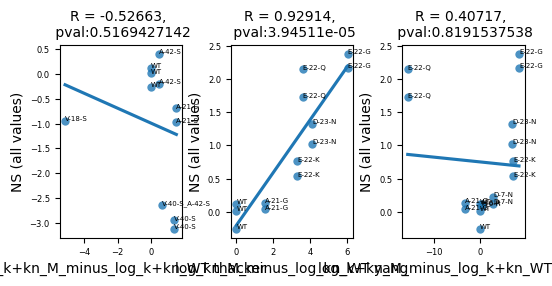

In [149]:
# primary nucleation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn_M_minus_log_k+kn_WT'] = np.array(curr_df['log_k+kn_M_minus_log_k+kn_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn_M_minus_log_k+kn_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn_M_minus_log_k+kn_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log_k+kn_M_minus_log_k+kn_WT ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kn']
curr_df['log_kn_M_minus_log_kn_WT'] = np.array(curr_df['log_kn_M_minus_log_kn_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kn_M_minus_log_kn_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kn_M_minus_log_kn_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log_kn_M_minus_log_kn_WT ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn_M_minus_log_k+kn_WT'] = np.array(curr_df['log_k+kn_M_minus_log_k+kn_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn_M_minus_log_k+kn_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn_M_minus_log_k+kn_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log_k+kn_M_minus_log_k+kn_WT ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)


    
    
plt.savefig('./figures/20240716_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)
    

# below was with ci=95 (default)
#plt.savefig('./figures/20240508_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

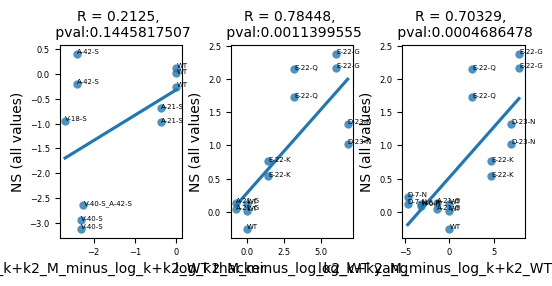

In [158]:
# secondary nucleation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2_M_minus_log_k+k2_WT'] = np.array(curr_df['log_k+k2_M_minus_log_k+k2_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2_M_minus_log_k+k2_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2_M_minus_log_k+k2_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log_k+k2_M_minus_log_k+k2_WT ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k2']
curr_df['log_k2_M_minus_log_k2_WT'] = np.array(curr_df['log_k2_M_minus_log_k2_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k2_M_minus_log_k2_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k2_M_minus_log_k2_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log_k2_M_minus_log_k2_WT ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2_M_minus_log_k+k2_WT'] = np.array(curr_df['log_k+k2_M_minus_log_k+k2_WT'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2_M_minus_log_k+k2_WT'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2_M_minus_log_k+k2_WT', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log_k+k2_M_minus_log_k+k2_WT ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)


    
    
plt.savefig('./figures/20240716_SF1_Thacker_Meisl_IlesToth_rates_secondary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)
    

# below was with ci=95 (default)
#plt.savefig('./figures/20240508_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

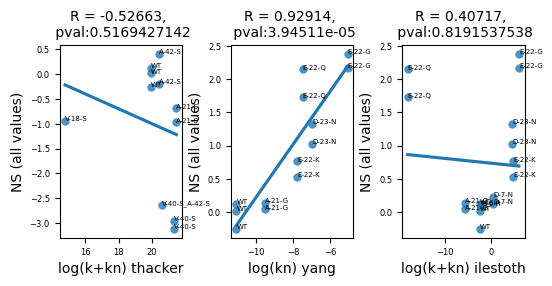

In [149]:
# primary nucleation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn'] = np.array(curr_df['log_k+kn'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kn']
curr_df['log_kn'] = np.array(curr_df['log_kn'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kn'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kn', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(kn) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn'] = np.array(curr_df['log_k+kn'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)


    
    
plt.savefig('./figures/20240716_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)
    

# below was with ci=95 (default)
#plt.savefig('./figures/20240508_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

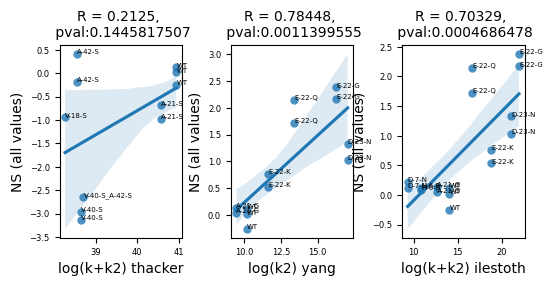

In [150]:
# secondary nucleation - for Fig.1d

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2'] = np.array(curr_df['log_k+k2'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k2']
curr_df['log_k2'] = np.array(curr_df['log_k2'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k2'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k2', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2'] = np.array(curr_df['log_k+k2'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3
           )

ax3.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240716_Fig1d_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
       
    
plt.savefig('./figures/20240508_SF1_Thacker_log_lambda_and_log_kappa_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

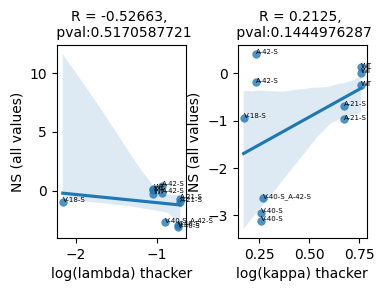

In [142]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
       
    
plt.savefig('./figures/20240508_SF1_Thacker_log_lambda_and_log_kappa_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

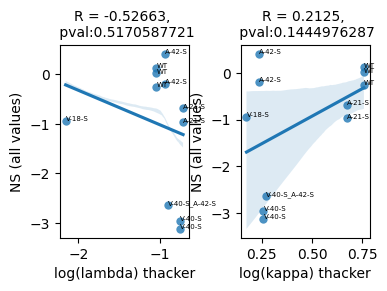

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1, ci=5,
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
       
    
plt.savefig('./figures/20240508_SF1_Thacker_log_lambda_and_log_kappa_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

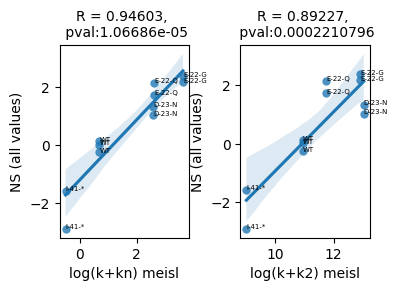

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'meisl'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn'] = np.array(curr_df['log_k+kn'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2'] = np.array(curr_df['log_k+k2'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
       
    
plt.savefig('./figures/20240508_Fig1d_Meisl_log_k+kn_and_log_k+k2_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

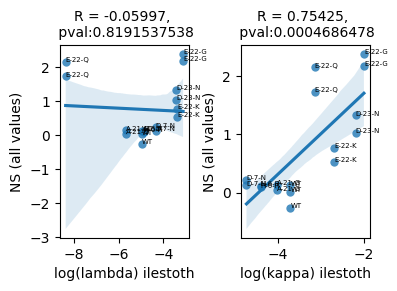

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
       
    
plt.savefig('./figures/20240508_SF1_IlesToth_log_lambda_and_log_kappa_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

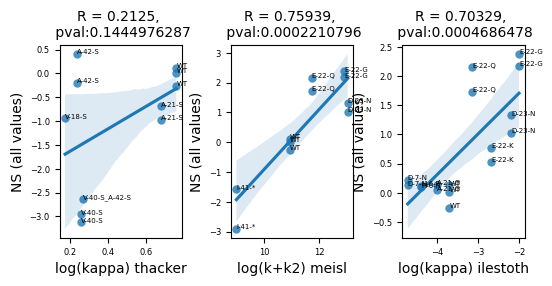

In [107]:
# secondary nucleation - for Fig.1d

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+k2']
curr_df['log_k+k2'] = np.array(curr_df['log_k+k2'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+k2'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+k2', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['kappa']
curr_df['log_kappa'] = np.array(curr_df['log_kappa'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_kappa'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_kappa', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3
           )

ax3.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240508_Fig1d_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)

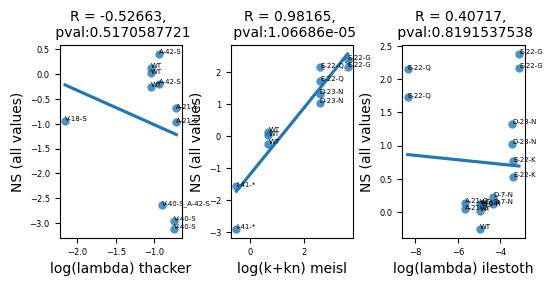

In [134]:
# primary nucleation

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS (all values)')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['k+kn']
curr_df['log_k+kn'] = np.array(curr_df['log_k+kn'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_k+kn'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_k+kn', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS (all values)')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)

    
    
curr_rate_const_dataset = 'ilestoth'

curr_df = rate_constants_all_datasets[curr_rate_const_dataset]['lambda']
curr_df['log_lambda'] = np.array(curr_df['log_lambda'], dtype=float)
curr_df['NS'] = np.array(curr_df['NS'], dtype=float)


curr_x = list(curr_df['log_lambda'])
curr_y = list(curr_df['NS'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_lambda', y='NS',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax3.set_ylabel('NS (all values)')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
for ax_i in [ax1,ax2,ax3]:
    ax_i.tick_params(labelsize=6)


    
    
plt.savefig('./figures/20240626_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
            transparent=True)
    

# below was with ci=95 (default)
#plt.savefig('./figures/20240508_SF1_Thacker_Meisl_IlesToth_rates_primary_nucleation_vs_NS_all_doubles_datasets.pdf', bbox_inches='tight', 
#            transparent=True)

In [55]:
rate_constants['thacker'].loc[:,['ddEa_joint_model','log_kappa_thacker']].dropna()

ddEa_joint_model  log_kappa_thacker
Ab_variant_full                                                               
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA        -0.276112           0.674861
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS        -0.105567           0.235528
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA        -0.257805           0.173186
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA        -1.285925           0.257679
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA         0.218317           0.757856

### Fig.2c plot: ddEa ~ log(k)

In [195]:
rate_constants['yang']

kn_yang       k2_yang  \
Ab_variant_full                                                      
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.000016  2.754229e+04   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA  0.000955  2.511886e+07   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA  0.006455  1.135011e+07   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA  0.000575  6.760830e+05   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA  0.000417  1.148154e+05   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA  0.000074  1.318257e+04   

                                           mutation_id NS_eLife_doubles  \
Ab_variant_full                                                           
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          WT        -0.254861   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA      D-23-N         1.025929   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA      E-22-G         2.377941   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA      E-22-Q         1.723532   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA      E-22-K         0.532519   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA      A-21-G         0.136491   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA            0.078701           None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA            0.064394           None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA            0.117333           None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA            0.084528           None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA             0.08765           None   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              None   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA           1.325114   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA           2.170153   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA           2.148203   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA           0.764645   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA           0.042437   

                                           sigma_Nicking_doubles  \
Ab_variant_full                                                    
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA              0.219638   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA               0.18808   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA              0.120295   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA              0.211482   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA              0.201663   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA              0.128742   

                                           ddEa_joint_model  log_kn_yang  \
Ab_variant_full                                                            
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        -0.218317   -11.052600   
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA         -0.36668    -6.954076   
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA        -0.891521    -5.042848   
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA        -0.620139    -7.461735   
DAEFRHDSGYEVHHQKLVFFAKDVGSNKGAIIGLMVGGVVIA        -0.143366    -7.782748   
DAEFRHDSGYEVHHQKLVFFGEDVGSNKGAIIGLMVGGVVIA         0.005184    -9.509721   

                                            lo

In [196]:
for dataset in ['thacker', 'yang', 'ilestoth']:
    print(dataset)
    rate_constants[dataset]['-ddEa_joint_model_scaled_and_shifted'] = -1*((rate_constants[dataset]['ddEa_joint_model'])/0.233)
    

thacker
yang
ilestoth


In [197]:
rate_constants['thacker']

lambda_thacker  kappa_thacker  \
Ab_variant_full                                                             
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA        0.100000       1.230000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS        0.125000       1.860000   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA        0.194000       4.730000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS        0.115000       1.720000   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA        0.006950       1.490000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA        0.180000       1.810000   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0.090845       5.726066   

                                            k+kn_thacker  k+k2_thacker  \
Ab_variant_full                                                          
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  5.560000e+08  2.800000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  8.680000e+08  6.410000e+16   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA  2.090000e+09  4.140000e+17   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS  7.350000e+08  5.480000e+16   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA  2.680000e+06  4.110000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA  1.800000e+09  6.070000e+16   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  4.580000e+08  6.070000e+17   

                                              mutation_id NS_eLife_doubles  \
Ab_variant_full                                                              
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA  V-18-S_A-21-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS  V-40-S_A-42-S             None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA         A-21-S        -0.687336   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS         A-42-S        -0.192409   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA         V-18-S             None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA         V-40-S        -2.956301   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA             WT        -0.254861   

                                           sigma_eLife_doubles NS_NNK_doubles  \
Ab_variant_full                                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS                None      -2.635019   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA            0.089124           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS            0.069526         0.4094   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA                None           None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA            0.885222      -3.124643   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA            0.465475       0.015158   

                                           sigma_NNK_doubles  \
Ab_variant_full                                                
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS          0.950231   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS          0.139411   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA              None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA          0.152348   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA          0.202355   

                                           NS_Nicking_doubles  \
Ab_variant_full                                                 
DAEFRHDSGYEVHHQKLSFFSEDVGSNKGAIIGLMVGGVVIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIS               None   
DAEFRHDSGYEVHHQKLVFFSEDVGSNKGAIIGLMVGGVVIA          -0.973073   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIS               None   
DAEFRHDSGYEVHHQKLSFFAEDVGSNKGAIIGLMVGGVVIA          -0.945574   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVSIA               None   
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA           0.123825   

                                           sigma_Nicking_doubles  \
Ab_variant_full    

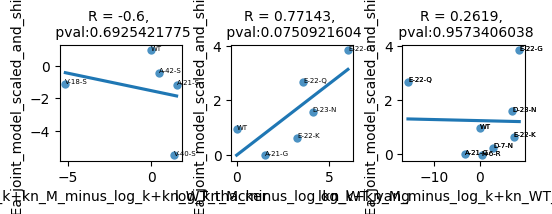

In [198]:
# primary nucleation - for ED fig. 2a

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'k+kn'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset, 
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax1.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'
rate = 'kn'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax2.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'k+kn'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax3.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240716_ED_fig2a_Thacker_Yang_IlesToth_primary_nucleation_rates_M_vs_WT_vs_neg_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

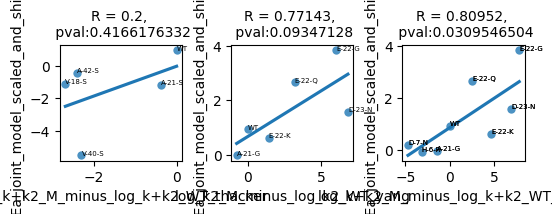

In [199]:
# secondary nucleation - for Fig. 2e

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'k+k2'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset, 
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax1.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'yang'
rate = 'k2'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax2.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'k+k2'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['-ddEa_joint_model_scaled_and_shifted','log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset], dtype=float)
curr_df['-ddEa_joint_model_scaled_and_shifted'] = np.array(curr_df['-ddEa_joint_model_scaled_and_shifted'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset])
curr_y = list(curr_df['-ddEa_joint_model_scaled_and_shifted'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset,
            y='-ddEa_joint_model_scaled_and_shifted',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log_' + rate + '_M_minus_log_' + rate + '_WT_' + curr_rate_const_dataset)
ax3.set_ylabel('-ddEa_joint_model_scaled_and_shifted')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240716_ED_fig2a_Thacker_Yang_IlesToth_secondary_nucleation_rates_M_vs_WT_vs_neg_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

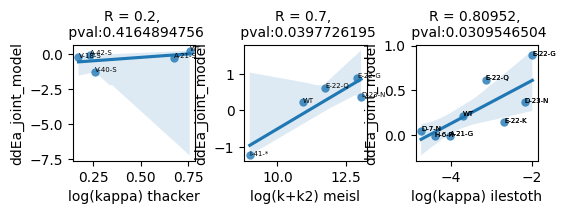

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'kappa'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'
rate = 'k+k2'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'kappa'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240509_Fig2c_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

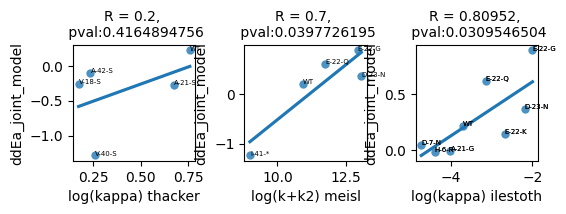

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'kappa'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'
rate = 'k+k2'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'kappa'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)



for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
plt.savefig('./figures/20240625_Fig2c_Thacker_Meisl_IlesToth_secondary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

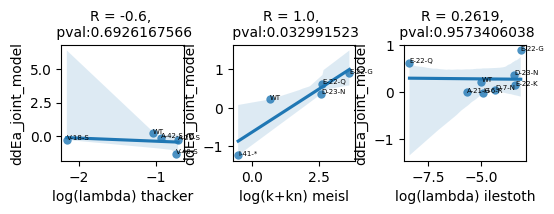

In [110]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'lambda'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'
rate = 'k+kn'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'lambda'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
plt.savefig('./figures/20240509_Fig2c_Thacker_Meisl_IlesToth_primary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

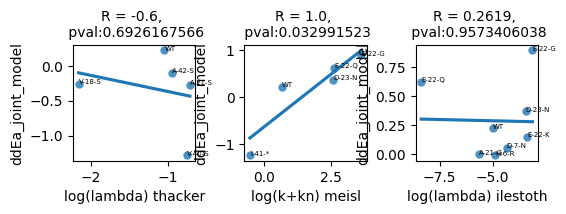

In [138]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(6,1.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'thacker'
rate = 'lambda'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax1,
            ci=0
           )

ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax1.set_ylabel('ddEa_joint_model')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
    
    
curr_rate_const_dataset = 'meisl'
rate = 'k+kn'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax2,
            ci=0
           )

ax2.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax2.set_ylabel('ddEa_joint_model')
ax2.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
    
curr_rate_const_dataset = 'ilestoth'
rate = 'lambda'

curr_df = rate_constants[curr_rate_const_dataset].loc[:,['ddEa_joint_model','log_' + rate + '_' + curr_rate_const_dataset,'mutation_id']].dropna()
curr_df['log_' + rate + '_' + curr_rate_const_dataset] = np.array(curr_df['log_' + rate + '_' + curr_rate_const_dataset], dtype=float)
curr_df['ddEa_joint_model'] = np.array(curr_df['ddEa_joint_model'], dtype=float)


curr_x = list(curr_df['log_' + rate + '_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(curr_df['mutation_id'])

colors = {'eLife_doubles':'#eb4034', 'NNK_doubles':'#343deb', 'Nicking_doubles':'#343deb'}

sns.regplot(curr_df, x = 'log_' + rate + '_' + curr_rate_const_dataset, y='ddEa_joint_model',
            #color=curr_df['dataset'].map(colors),
            scatter_kws={'linewidths': 0}, ax=ax3,
            ci=0
           )

ax3.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
ax3.set_ylabel('ddEa_joint_model')
ax3.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax3.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
    
plt.savefig('./figures/20240625_Fig2c_Thacker_Meisl_IlesToth_primary_nucleation_rates_vs_ddEa_joint_model.pdf', bbox_inches='tight', 
            transparent=True)

## Making a scatterplot of NS vs ddEa for each variant

In [200]:
# to weights_Nucleation['Sigmoid_l2_1e-05'] need to add a column with the full Ab variant for each mutation in 'id' column

def mutation_id2Ab_variant(mutation_id):

    if mutation_id == 'WT':
        result = AB_WT
      
    else:
        curr_wt_aa = mutation_id[0]
        curr_new_aa = mutation_id[-1]
    
        curr_position = int(mutation_id[1:-1])
    
        result = AB_WT[:curr_position-1] + curr_new_aa + AB_WT[curr_position:]
    
    return(result)


In [201]:
weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] = weights_Nucleation['Sigmoid_l2_1e-05']['id'].apply(lambda x: mutation_id2Ab_variant(x))


In [202]:
weights_Nucleation['Sigmoid_l2_1e-05'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
       'std_scaled', 'variant_occurence_eLife_doubles',
       'variant_occurence_NNK_doubles', 'variant_occurence_Nicking_doubles',
       'variant_occurence_total', 'variant_occurence_total_no_duplicates',
       'structured_2beg', 'structured_2mxu', 'structured_2nao',
       'structured_5kk3', 'structured_5oqv', 'structured_7q4b',
       'structured_7q4m', 'structured_8ezd', 'structured_8eze', 'position',
       'Ab_variant'],
      dtype='object')

In [203]:
datasets

['eLife_doubles', 'NNK_doubles', 'Nicking_doubles']

In [204]:
for dataset in datasets:
    print(dataset)
    
    all_variants[dataset]['ddEa_' + dataset] = [None for i in range(len(all_variants[dataset]))]
    all_variants[dataset]['ddEa'] = [None for i in range(len(all_variants[dataset]))]
    
    for idx in list(all_variants[dataset].index):
        
        curr_variant = all_variants[dataset].loc[idx,'aa_seq']
        
        if curr_variant in list(weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant']):
            all_variants[dataset].loc[idx,'ddEa_' + dataset] = list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] == curr_variant]['ddEa_scaled_and_shifted'])[0]
            all_variants[dataset].loc[idx,'ddEa'] = list(weights_Nucleation['Sigmoid_l2_1e-05'][weights_Nucleation['Sigmoid_l2_1e-05']['Ab_variant'] == curr_variant]['ddEa_scaled_and_shifted'])[0]
            
            
    

eLife_doubles
NNK_doubles
Nicking_doubles


In [205]:
for dataset in datasets:
    print(dataset)
    all_variants[dataset]['dataset'] = [dataset for i in range(len(all_variants[dataset]))]
    all_variants[dataset]['fitness_' + dataset] = [fitness for fitness in list(all_variants[dataset]['fitness'])]
    

eLife_doubles
NNK_doubles
Nicking_doubles


In [206]:
all_variants['eLife_doubles']

merge_seq  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
...                                           ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   

                                           aa_seq  Nham_nt  Nham_aa  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
3      NTEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
4      NEEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
5      NAKFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
...                                           ...      ...      ...   
18645  YAEFLHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18646  YAVFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18647  YVEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        2   
18648  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   
18649  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        2        1   

       Nmut_codons   WT   STOP  STOP_readthrough    mean_count  count_e1_s0  \
1                1  NaN  False             False    210.500000        212.0   
2                1  NaN  False             False  28544.000000      38851.0   
3                2  NaN  False             False    170.000000        190.0   
4                2  NaN  False             False    146.000000        172.0   
5                2  NaN  False             False     64.500000         50.0   
...            ...  ...    ...               ...           ...          ...   
18645            2  NaN  False             False     61.000000         61.0   
18646            2  NaN  False             False     61.000000          NaN   
18647            2  NaN  False             False     94.500000        112.0   
18648            1  NaN  False             False    161.666667        212.0   
18649            1  NaN  False             False     74.000000         76.0   

       ...  nscore_c  sigma_norm_first_toWT  category_sigma  zscore_mode  \
1      ... -0.031054               0.116471    classifiable    -0.080236   
2      ...  0.438798               0.018732    classifiable     7.049259   
3      ...  0.467821               0.126687    classifiable     1.111265   
4      ...  0.139154               0.135707    classifiable     0.308574   
5      ...  0.581692               0.213984    classifiable     0.818052   
...    ...       ...                    ...             ...          ...   
18645  ... -0.799697               0.269213    classifiable    -0.893918   
18646  ... -2.159063               0.384886  unclassifiable    -1.688115   
18647  ... -3.489969               0.220378    classifiable    -4.765656   
18648  ...  0.152813               0.108047    classifiable     0.425612   
18649  ...  0.413300               0.192752    classifiable     0.645263   

       p.adjust_mode  category_dead  ddEa_eLife_doubles      ddEa  \
1       9.593123e-01           dead            0.189033  0.189033   
2       2.372307e-11       not dead           -0.331246 -0.331246   
3       3.692032e-01           dead                None      None   
4       8.323199e-01           dead                None      None   
5       5.286066e-01           dead                None      None   
...              ...            ...                 ...       ...   
18645   4.859939e-01           dead                None      None   
18646   1.467904e-01           dead                None      None   
18647   8.769633e-06           dead                None      None  

In [207]:
for dataset in datasets:
    print(dataset)
    print(len(all_variants[dataset][['aa_seq','ddEa','fitness','dataset']].dropna()))

eLife_doubles
3081
NNK_doubles
301
Nicking_doubles
600


In [208]:
df_ddEa_NS = pd.concat([all_variants['eLife_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna(),
          all_variants['NNK_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna(),
          all_variants['Nicking_doubles'][['aa_seq','ddEa','fitness','dataset']].dropna()],
         axis=0)
          

In [209]:
df_ddEa_NS

aa_seq      ddEa   fitness  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.189033 -0.117352   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.331246  0.352500   
189    TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.063242 -2.818013   
190    SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.008776  0.121805   
191    IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   2.59031 -2.404340   
...                                           ...       ...       ...   
53738  *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   6.00052 -4.499150   
53904  YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.413142 -0.062016   
54121  WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.922289 -0.553207   
54316  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.143465  0.492746   
54588  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.480155 -0.010103   

               dataset  
1        eLife_doubles  
2        eLife_doubles  
189      eLife_doubles  
190      eLife_doubles  
191      eLife_doubles  
...                ...  
53738  Nicking_doubles  
53904  Nicking_doubles  
54121  Nicking_doubles  
54316  Nicking_doubles  
54588  Nicking_doubles  

[3982 rows x 4 columns]

In [210]:
# 2644 is how many times there is WT
np.unique(np.unique(df_ddEa_NS['aa_seq'], return_counts=True)[1])

array([   1,    2,    3, 2644])

In [211]:
df_ddEa_NS['aa_seq'].value_counts()

aa_seq
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA    2644
DAEFRHDSGYEVHHQKLVFFAEDVGSNEGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNYGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNSGAIIGLMVGGVVIA       3
DAEFRHDSGYEVHHQKLVFFAEDVGSNIGAIIGLMVGGVVIA       3
                                              ... 
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIYLMVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGWMVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIG*MVGGVVIA       1
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGGMVGGVVIA       1
WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       1
Name: count, Length: 834, dtype: int64

In [212]:
df_ddEa_NS['-ddEa'] = -df_ddEa_NS['ddEa']

In [213]:
np.unique(df_ddEa_NS['dataset'])

array(['NNK_doubles', 'Nicking_doubles', 'eLife_doubles'], dtype=object)

In [214]:
df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]

aa_seq      ddEa   fitness  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.189033 -0.117352   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.331246  0.352500   
189    TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.063242 -2.818013   
190    SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.008776  0.121805   
191    IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   2.59031 -2.404340   
...                                           ...       ...       ...   
53738  *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   6.00052 -4.499150   
53904  YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.413142 -0.062016   
54121  WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.922289 -0.553207   
54316  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.143465  0.492746   
54588  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.480155 -0.010103   

               dataset     -ddEa  
1        eLife_doubles -0.189033  
2        eLife_doubles  0.331246  
189      eLife_doubles  0.063242  
190      eLife_doubles -0.008776  
191      eLife_doubles  -2.59031  
...                ...       ...  
53738  Nicking_doubles  -6.00052  
53904  Nicking_doubles -0.413142  
54121  Nicking_doubles -0.922289  
54316  Nicking_doubles  0.143465  
54588  Nicking_doubles -0.480155  

[1338 rows x 5 columns]

In [215]:
df_ddEa_NS['fitness']

1       -0.117352
2        0.352500
189     -2.818013
190      0.121805
191     -2.404340
           ...   
53738   -4.499150
53904   -0.062016
54121   -0.553207
54316    0.492746
54588   -0.010103
Name: fitness, Length: 3982, dtype: float64

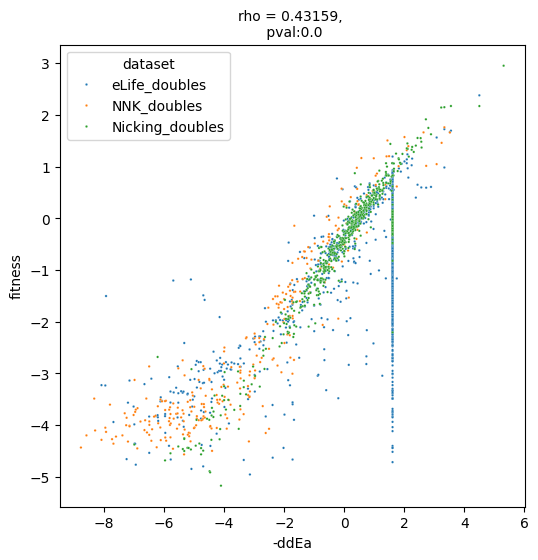

In [150]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)


sns.scatterplot(df_ddEa_NS, x = '-ddEa', y='fitness', hue='dataset',
                s=3,
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, ax=ax1
           )

plt.title('rho = ' + str(np.round(scipy.stats.spearmanr(df_ddEa_NS['-ddEa'], df_ddEa_NS['fitness'])[0],5)) + ', \n pval:' + str(np.round(scipy.stats.spearmanr(df_ddEa_NS['-ddEa'], df_ddEa_NS['fitness'])[1],10)), 
    fontsize=10)


#ax1.set_xlabel('log(' + rate + ') ' + curr_rate_const_dataset)
#ax1.set_ylabel('ddEa_joint_model')
#ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', \n pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
#          fontsize=10)


#for i, txt in enumerate(curr_labels):
#    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
        
plt.savefig('./figures/20240514_NS_all_doubles_vs_ddEa_joint_model_scatter.pdf', bbox_inches='tight', 
            transparent=True)

Text(0.5, 1.0, 'R = 0.94473, p=0.0')

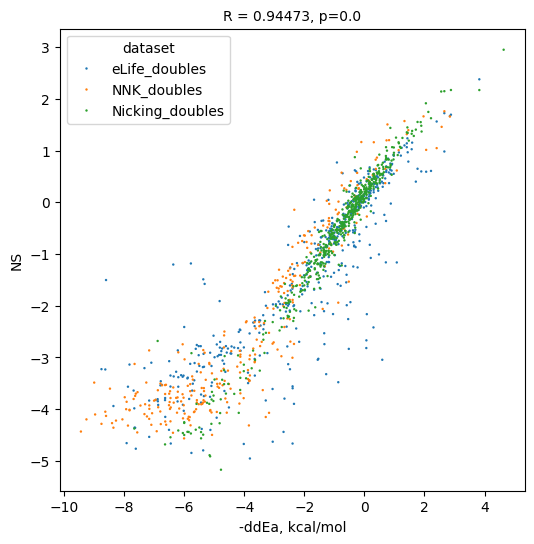

In [216]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)


sns.scatterplot(df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT], x = '-ddEa', y='fitness', hue='dataset',
                s=3, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, ax=ax1
           )


curr_x = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]['-ddEa']
curr_y = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT]['fitness']

ax1.set_xlabel('-ddEa, kcal/mol')
ax1.set_ylabel('NS')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', p=' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)), 
          fontsize=10)


#for i, txt in enumerate(curr_labels):
#    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
        
#plt.savefig('./figures/20240514_NS_all_doubles_vs_ddEa_joint_model_scatter_no_WT.pdf', bbox_inches='tight', 
#            transparent=True)

In [217]:
df_ddEa_NS2plot = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].copy()

In [218]:
df_ddEa_NS2plot['-ddEa'] = df_ddEa_NS2plot['-ddEa'].astype(float)

In [219]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array((-8.5,6))
    print(x_vals)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='black')

[-8.5  6. ]


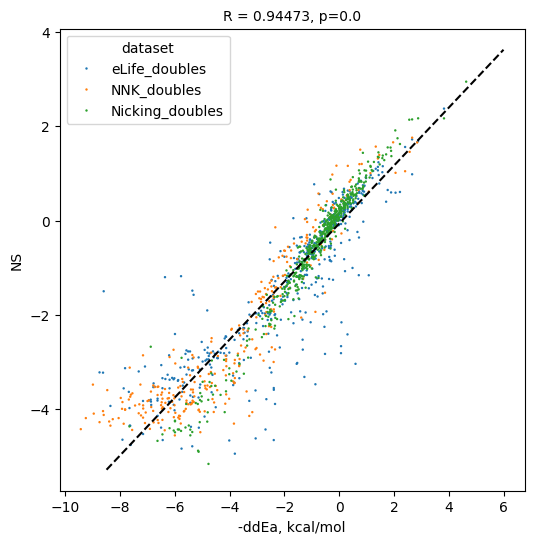

In [220]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6,6))

plt.subplots_adjust(wspace=0.4)



curr_x = df_ddEa_NS2plot['-ddEa']
curr_y = df_ddEa_NS2plot['fitness']

ax1.set_xlabel('-ddEa, kcal/mol')
ax1.set_ylabel('NS')
ax1.set_title('R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', p=' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],10)), 
          fontsize=10)


x = np.array(list(curr_x))
y = np.array(list(curr_y))

m, b = np.polyfit(x, y, 1)

abline(m,b)


sns.scatterplot(df_ddEa_NS2plot, x = '-ddEa', y='fitness', hue='dataset',
                s=3, edgecolor="none",
            #color=curr_df['dataset'].map(colors),
            #scatter_kws={'linewidths': 0}, ax=ax1
           )


#for i, txt in enumerate(curr_labels):
#    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=5)
        
plt.savefig('./figures/20240514_NS_all_doubles_vs_ddEa_joint_model_scatter_no_WT.pdf', bbox_inches='tight', 
            transparent=True)

In [221]:
df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].columns

Index(['aa_seq', 'ddEa', 'fitness', 'dataset', '-ddEa'], dtype='object')

In [222]:
#saving for Supplementary table 3

df_ddEa_NS2save = df_ddEa_NS[df_ddEa_NS['aa_seq'] != AB_WT].copy()
df_ddEa_NS2save.columns = ['aa_seq', 'ddEa', 'GR', 'dataset', '-ddEa']

In [223]:
# update names in dataset column
def upd_dataset_names(name_old):
    
    if name_old == 'eLife_doubles':
        result = 'shallow_double_mutants'
    elif name_old == 'NNK_doubles':
        result = 'C_terminal_Ab42_double_mutants'
    elif name_old == 'Nicking_doubles':
        result = 'N_terminal_Ab42_double_mutants'
        
    return(result)

In [224]:
df_ddEa_NS2save['dataset'] = df_ddEa_NS2save['dataset'].apply(lambda x: upd_dataset_names(x))

In [225]:
np.median([0.34,0.87])

0.605

In [226]:
np.median([0.48,0.76])

0.62

In [227]:
weights_Nucleation_noWT['ddEa_scaled_and_shifted']

0     -0.936982
2      6.000520
3     -0.147763
4     -0.143465
5      0.144910
         ...   
837   -0.416672
838   -0.692907
839    3.812609
840    2.465099
841    2.043918
Name: ddEa_scaled_and_shifted, Length: 841, dtype: float64

In [228]:
ddEa_APR1 = list(weights_Nucleation_noWT[weights_Nucleation_noWT['Pos'].isin([i for i in range(17,22)])]['ddEa_scaled_and_shifted'])


In [229]:
ddEa_APR2 = list(weights_Nucleation_noWT[weights_Nucleation_noWT['Pos'].isin([i for i in range(29,43)])]['ddEa_scaled_and_shifted'])


In [230]:
scipy.stats.mannwhitneyu(ddEa_APR2, ddEa_APR1, alternative='greater')

MannwhitneyuResult(statistic=23200.0, pvalue=8.61429697758993e-23)

In [231]:
scipy.stats.mannwhitneyu(ddEa_APR2, ddEa_APR1, alternative='less')

MannwhitneyuResult(statistic=23200.0, pvalue=1.0)

## Producing differential heatmap (ddEa - (-NS))

In [232]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
mean  0.445846  0.727165  0.090566  0.756384  1.272451  0.906969  0.124844   
G    -0.513740  0.257202 -0.524391  0.666902  1.172574  0.538170 -0.379760   
A    -0.147763       NaN -0.309471  0.506991  1.287016  0.702866 -0.002935   
V     1.982111  1.855294  1.460877  0.918588  1.157460  1.221586  0.994238   
L     2.752797  2.418817  2.271359  1.141775  1.614956  1.857726  1.097659   
M     0.842132  1.169468  0.299724  0.630338  1.108589  0.808810  0.214325   
I     2.590310  2.172209  1.549483  0.781311  1.236310  1.819976  1.013811   
F     0.480155  0.128483 -0.251483       NaN  1.393774  0.853974  0.292976   
Y     0.413142  0.286494 -0.306889  0.345169  1.466453  0.835888  0.280575   
W     0.922289  0.200349 -0.720210  0.783091  1.428499  0.593596  0.121613   
K     0.189033  0.366360 -0.134040  0.965446  0.359003  0.588470 -0.033936   
R    -0.440705 -0.172915 -0.773003  0.417307       NaN  0.064144 -0.483730   
D          NaN  1.074152  0.297533  1.350546  1.997769  1.449760       NaN   
E     0.144910  1.291775       NaN  1.265898  1.770406  1.672393  0.428036   
S     0.008776  0.460140 -0.263970  0.676532  1.293459  0.751449 -0.063327   
T    -0.063242  0.395846 -0.065886  0.778848  1.273441  0.722395 -0.056672   
C    -0.143465  0.615007 -0.045177  1.090435  1.327591  0.983511  0.722821   
N    -0.331246  0.529451 -0.194549  0.493632  0.988414  0.698784 -0.212127   
Q    -0.071518  0.192011 -0.166979  0.721896  1.092912  0.436310 -0.398622   
H     0.190893  0.242469 -0.432074  0.534382  1.068784       NaN -0.579730   
P    -0.333803  0.333527  0.029901  0.302209  1.139158  0.632606 -0.583180   

           S-8       G-9      Y-10  ...      G-33      L-34      M-35  \
mean  0.444890  0.320144  0.280344  ...  3.277034  2.505846  4.910027   
G     0.049165       NaN -0.152985  ...       NaN  5.986507  5.676245   
A     0.284632  0.207127 -0.004661  ...  4.130022  3.021727  5.139845   
V     0.771720  0.443632  0.402577  ...  4.915985 -0.736443  2.057580   
L     0.690486  1.289209  1.344692  ...  4.021306       NaN  4.457238   
M     0.265724  0.507249  0.897652  ...  1.389000  0.231609       NaN   
I     1.108447  0.498474  0.629187  ...  5.880424 -1.333675  3.044939   
F     0.276359 -0.183608  0.121737  ...  3.660147  1.174189  6.458651   
Y     0.187702 -0.715327       NaN  ...  3.385179  2.567611  4.677266   
W     0.091317  0.421011  0.730887  ...  6.268929  4.903888  5.398989   
K     0.370751 -0.074992  0.295757  ...  2.146400  2.764652  6.952580   
R    -0.347089 -0.423780 -0.178879  ...  4.583993  3.649564  6.500716   
D     0.779571  1.065562  0.421272  ...  5.357149  5.835927  7.934138   
E     1.017098  1.528834  0.395723  ...  4.839874  5.432493  7.613073   
S          NaN  0.540757  0.115146  ...  3.343899  2.345430  4.512125   
T     0.384965  0.274531  0.169885  ...  1.820635  0.227592  6.103585   
C     2.274027  0.568300  0.371979  ...  3.285757 -0.080199  3.420193   
N     0.167226  0.270543  0.155231  ... -2.571484  0.870658  0.520202   
Q     0.107383  0.185034 -0.065110  ...  0.264474  1.044905  2.485212   
H     0.000609 -0.066131  0.050077  ... -0.274968  4.122547  3.176222   
P    -0.027180 -0.253683 -0.373626  ...  5.816920  5.582088  7.161721   

          V-36      G-37      G-38      V-39      V-40      I-41      A-42  
mean  2.384250  7.066347  4.728909  3.993280  4.483541  3.895640  1.146866  
G     4.148929       NaN       NaN  7.653882  5.714533  6.609346  2.607290  
A     2.753544  4.544543  4.662272  4.888832  5.341470  6.636207       NaN  
V          NaN  5.517632  4.814599       NaN       NaN  3.502116 -0.692907  
L    -0.312345  9.256260  7.166352  2.478533  3.498711  2.456996 -2.662287  
M     0.241387  8.272791  5.801625  2.405861  3.846833  2.855504 -2.056350  
I    -0.821111  7.874150  5.849606 -0.153560  1.797520       NaN -0.699159  
F     0.252573  8.604114  6.365029  3.472572  2.487587 -0.379039 -0.178

In [233]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  structured_2mxu  structured_2nao  \
0    0.372521  0.341733  ...               NA               NA   
1   -2.320398 -2.029718  ...                0                0   
2    0.037928  0.066478  ...                0                0   
3    0.063339  0.093359  ...                0                0   
4   -0.051849 -0.058691  ...                0                0   
..        ...       ...  ...              ...              ...   
836  0.082041  0.077438  ...                1                1   
837  0.256938  0.260202  ...                1                1   
838 -1.707580 -1.035545  ...                1                1   
839 -1.146212 -0.833155  ...                1                1   
840 -0.623868 -0.809916  ...                1                0   

     structured_5kk3  structured_5oqv  structured_7q4b  structured_7q4m  \
0                 NA               NA               NA               NA   
1                  0                1                0                0   
2                  0                1                0                0   
3                  0                1                0                0   
4                  0                1                0                0   
..               ...              ...              ...              ...   
836                1                1                1                1   
837                1                1                1                1   
838                1                1                1                1   
839                1                1                1                1   
840                1                1                1                0   

     structured_8ezd  structured_8eze position  \
0                 NA               NA       NA   
1                  0                1        1   
2                  0                1        1   
3                  0                1        1   
4                  0                1        1   
..               ...              ...      ...   
836                1                1       42   
837                1                1       42   
838                1                1       42   
839                1                1       42   
840                0                1       11   

                                     Ab_variant  
0    DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  
1    *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  
2    AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  
3    CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  
4    EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  
..                                          ...  
836  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT  
837  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV  
838  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW  
839  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY  
840  DAEFRHDSGYMVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  

[841 rows x 41 columns]

In [234]:
# adding mean(NS) for every variant

weights_Nucleation['Sigmoid_l2_1e-05']['NS_mean'] = [None for i in range(len(weights_Nucleation['Sigmoid_l2_1e-05']))]
weights_Nucleation['Sigmoid_l2_1e-05']['NS_datasets'] = [None for i in range(len(weights_Nucleation['Sigmoid_l2_1e-05']))]


for idx in list(weights_Nucleation['Sigmoid_l2_1e-05'].index):
    
    #print(idx)
    
    curr_variant = weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx,'Ab_variant']
    
    curr_df_ddEa_NS_subset = df_ddEa_NS[df_ddEa_NS['aa_seq'] == curr_variant]
    
    weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx, 'NS_mean'] = np.mean(curr_df_ddEa_NS_subset['fitness'])
    weights_Nucleation['Sigmoid_l2_1e-05'].loc[idx, 'NS_datasets'] = str(list(np.unique(curr_df_ddEa_NS_subset['dataset'])))
    
    

In [235]:
# we should be comparing -NS to ddEa
weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'] = -weights_Nucleation['Sigmoid_l2_1e-05']['NS_mean']

In [236]:
# normalise to the same scale to compare - using this

weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'] = [(elem - np.mean(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'])) / np.std(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted']) for elem in weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted']]
weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'] = [(elem - np.mean(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])) / np.std(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean']) for elem in weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean']]



/tmp/ipykernel_326527/1818664141.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])
/tmp/ipykernel_326527/1818664141.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'])


<Axes: xlabel='ddEa_scaled_and_shifted', ylabel='Density'>

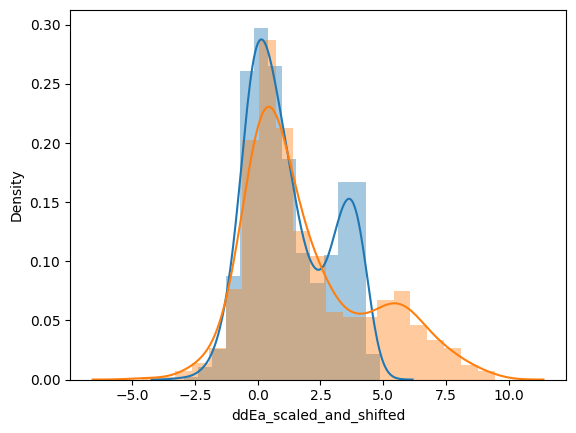

In [237]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean'])
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_scaled_and_shifted'])

/tmp/ipykernel_326527/1265821355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'])
/tmp/ipykernel_326527/1265821355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'])


<Axes: xlabel='ddEa_norm', ylabel='Density'>

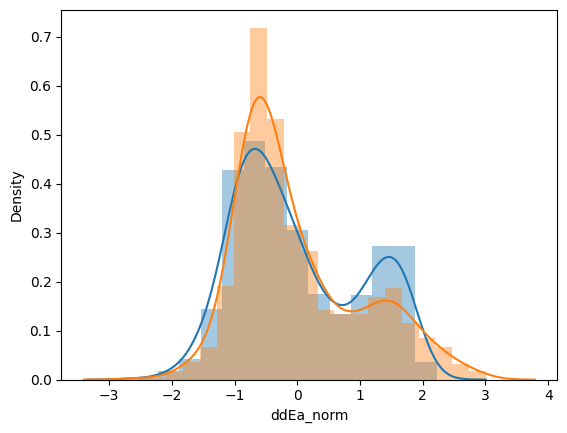

In [238]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm'])
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'])

In [239]:
weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] = weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm'] - weights_Nucleation['Sigmoid_l2_1e-05']['neg_NS_mean_norm']



In [240]:
weights_Nucleation['Sigmoid_l2_1e-05'].columns

Index(['id', 'id_ref', 'Pos', 'Pos_ref', 'fold_1', 'fold_2', 'fold_3',
       'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9', 'fold_10',
       'n', 'mean', 'std', 'ci95', 'trait_name', 'mean_kcal/mol',
       'std_kcal/mol', 'ci95_kcal/mol', 'ddEa', 'ddEa_scaled_and_shifted',
       'std_scaled', 'variant_occurence_eLife_doubles',
       'variant_occurence_NNK_doubles', 'variant_occurence_Nicking_doubles',
       'variant_occurence_total', 'variant_occurence_total_no_duplicates',
       'structured_2beg', 'structured_2mxu', 'structured_2nao',
       'structured_5kk3', 'structured_5oqv', 'structured_7q4b',
       'structured_7q4m', 'structured_8ezd', 'structured_8eze', 'position',
       'Ab_variant', 'NS_mean', 'NS_datasets', 'neg_NS_mean', 'ddEa_norm',
       'neg_NS_mean_norm', 'ddEa_norm_minus_neg_NS_mean_norm'],
      dtype='object')

In [241]:
df_ST_4_sheet_2 = weights_Nucleation['Sigmoid_l2_1e-05'][['id', 'id_ref', 'Pos', 'Pos_ref', 'position', 'Ab_variant',
       'NS_mean', 'NS_datasets', 'neg_NS_mean', 'ddEa_norm',
       'neg_NS_mean_norm', 'ddEa_norm_minus_neg_NS_mean_norm']]

df_ST_4_sheet_2.columns = ['id', 'id_ref', 'Pos', 'Pos_ref', 'position', 'Ab_variant',
       'GR_mean', 'GR_datasets', 'neg_GR_mean', 'ddEa_norm',
       'neg_GR_mean_norm', 'ddEa_norm_minus_neg_GR_mean_norm']

In [243]:
df_ddEa_NS2save

aa_seq      ddEa        GR  \
1      KAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.189033 -0.117352   
2      NAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.331246  0.352500   
189    TAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.063242 -2.818013   
190    SAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.008776  0.121805   
191    IAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   2.59031 -2.404340   
...                                           ...       ...       ...   
53738  *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA   6.00052 -4.499150   
53904  YAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.413142 -0.062016   
54121  WAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.922289 -0.553207   
54316  CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.143465  0.492746   
54588  FAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.480155 -0.010103   

                              dataset     -ddEa  
1              shallow_double_mutants -0.189033  
2              shallow_double_mutants  0.331246  
189            shallow_double_mutants  0.063242  
190            shallow_double_mutants -0.008776  
191            shallow_double_mutants  -2.59031  
...                               ...       ...  
53738  N_terminal_Ab42_double_mutants  -6.00052  
53904  N_terminal_Ab42_double_mutants -0.413142  
54121  N_terminal_Ab42_double_mutants -0.922289  
54316  N_terminal_Ab42_double_mutants  0.143465  
54588  N_terminal_Ab42_double_mutants -0.480155  

[1338 rows x 5 columns]

/tmp/ipykernel_326527/80585790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'])


<Axes: xlabel='ddEa_norm_minus_neg_NS_mean_norm', ylabel='Density'>

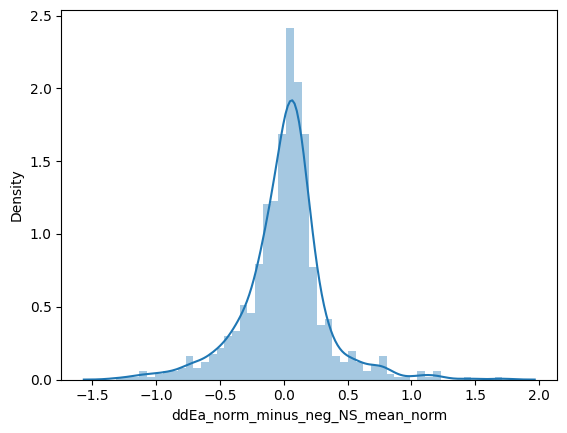

In [244]:
sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'])

In [245]:
# parse into heatmap format table

diff_df_ddEa_norm_minus_neg_NS_mean_norm = {}

for transformation in transformations:
    #print(transformation)
    diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [246]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_ddEa_norm_minus_neg_NS_mean_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa_norm_minus_neg_NS_mean_norm']

            diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, list(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_norm_minus_neg_NS_mean_norm_value


In [247]:
# make sure values are float
for transformation in transformations:
    for col in list(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [248]:
cmaps_diff_df = {}
masks_diff_df = {}

for transformation in transformations:
    #print(transformation)
    masks_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

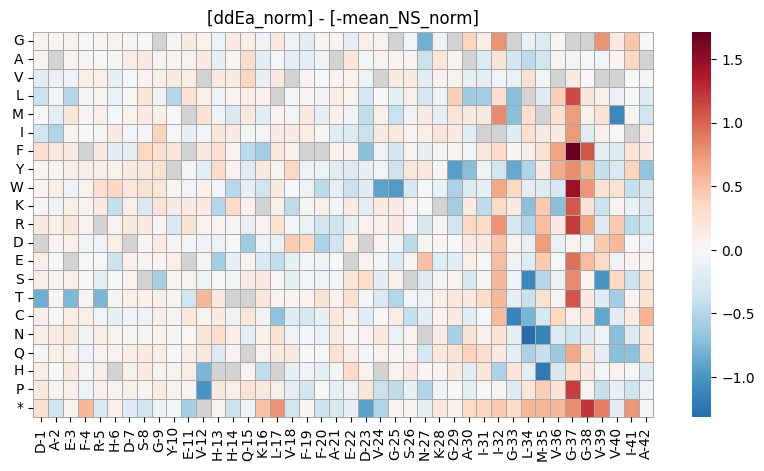

In [249]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_1e-05'], cmap=cmaps_diff_df[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_diff_df[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm] - [-mean_NS_norm]')

plt.savefig('./figures/20240716_ddEa_norm_vs_neg_mean_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [250]:
# parse into heatmap format table
df_ddEa_norm = {}

for transformation in transformations:
    #print(transformation)
    df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [251]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  structured_8ezd  structured_8eze  position  \
0    0.372521  0.341733  ...               NA               NA        NA   
1   -2.320398 -2.029718  ...                0                1         1   
2    0.037928  0.066478  ...                0                1         1   
3    0.063339  0.093359  ...                0                1         1   
4   -0.051849 -0.058691  ...                0                1         1   
..        ...       ...  ...              ...              ...       ...   
836  0.082041  0.077438  ...                1                1        42   
837  0.256938  0.260202  ...                1                1        42   
838 -1.707580 -1.035545  ...                1                1        42   
839 -1.146212 -0.833155  ...                1                1        42   
840 -0.623868 -0.809916  ...                0                1        11   

                                     Ab_variant   NS_mean  \
0    DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.396718   
1    *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -3.455152   
2    AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.203929   
3    CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.279631   
4    EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.085929   
..                                          ...       ...   
836  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT  0.684932   
837  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV  0.415592   
838  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW -2.961942   
839  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY -2.693652   
840  DAEFRHDSGYMVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       NaN   

                                           NS_datasets  neg_NS_mean  \
0    ['NNK_doubles', 'Nicking_doubles', 'eLife_doub...     0.396718   
1                 ['Nicking_doubles', 'eLife_doubles']     3.455152   
2                 ['Nicking_doubles', 'eLife_doubles']    -0.203929   
3                 ['Nicking_doubles', 'eLife_doubles']    -0.279631   
4                 ['Nicking_doubles', 'eLife_doubles']    -0.085929   
..                                                 ...          ...   
836                   ['NNK_doubles', 'eLife_doubles']    -0.684932   
837                   ['NNK_doubles', 'eLife_doubles']    -0.415592   
838                                    ['NNK_doubles']     2.961942   
839                                    ['NNK_doubles']     2.693652   
840                                                 []          NaN   

     ddEa_norm neg_NS_mean_norm  ddEa_norm_minus_neg_NS_mean_norm  
0    -1.143439        -0.518977                         -0.624462  
1     1.629430         1.347350                          0.282080  
2    -0.827994        -0.885506                          0.057512  
3    -0.826276        -0.931701                          0.105425  
4    -0.711014        -0.813500                          0.102485  
..         ...              ...                               ...  
836  -0.935475        -1.179025                          0.243550  
837  -1.045884        -1.014667                         -0.0312

In [252]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_ddEa_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'ddEa_norm']

            df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, 
                                                                                       list(df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_ddEa_norm_value


In [253]:
# make sure values are float
for transformation in transformations:
    for col in list(df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [254]:
cmaps_df_ddEa_norm = {}
masks_df_ddEa_norm = {}

for transformation in transformations:
    #print(transformation)
    masks_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_df_ddEa_norm[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

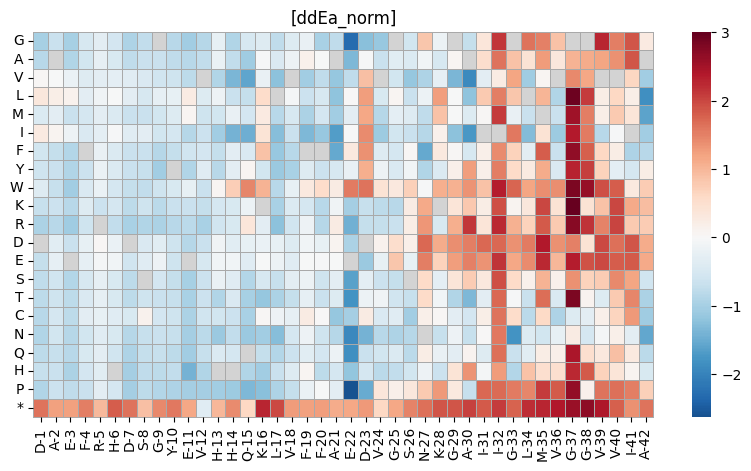

In [255]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df_ddEa_norm[transformation + '_l2_1e-05'], cmap=cmaps_df_ddEa_norm[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_df_ddEa_norm[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm]')

plt.savefig('./figures/20240617_ddEa_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [256]:
# parse into heatmap format table
df_neg_NS_norm = {}

for transformation in transformations:
    #print(transformation)
    df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = pd.DataFrame(columns=[elem + '-' + str(idx+1) for idx,elem in enumerate(list(AB_WT))], 
                                                           index = list(all_aa))

In [257]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  structured_8ezd  structured_8eze  position  \
0    0.372521  0.341733  ...               NA               NA        NA   
1   -2.320398 -2.029718  ...                0                1         1   
2    0.037928  0.066478  ...                0                1         1   
3    0.063339  0.093359  ...                0                1         1   
4   -0.051849 -0.058691  ...                0                1         1   
..        ...       ...  ...              ...              ...       ...   
836  0.082041  0.077438  ...                1                1        42   
837  0.256938  0.260202  ...                1                1        42   
838 -1.707580 -1.035545  ...                1                1        42   
839 -1.146212 -0.833155  ...                1                1        42   
840 -0.623868 -0.809916  ...                0                1        11   

                                     Ab_variant   NS_mean  \
0    DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.396718   
1    *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -3.455152   
2    AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.203929   
3    CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.279631   
4    EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.085929   
..                                          ...       ...   
836  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT  0.684932   
837  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV  0.415592   
838  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW -2.961942   
839  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY -2.693652   
840  DAEFRHDSGYMVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       NaN   

                                           NS_datasets  neg_NS_mean  \
0    ['NNK_doubles', 'Nicking_doubles', 'eLife_doub...     0.396718   
1                 ['Nicking_doubles', 'eLife_doubles']     3.455152   
2                 ['Nicking_doubles', 'eLife_doubles']    -0.203929   
3                 ['Nicking_doubles', 'eLife_doubles']    -0.279631   
4                 ['Nicking_doubles', 'eLife_doubles']    -0.085929   
..                                                 ...          ...   
836                   ['NNK_doubles', 'eLife_doubles']    -0.684932   
837                   ['NNK_doubles', 'eLife_doubles']    -0.415592   
838                                    ['NNK_doubles']     2.961942   
839                                    ['NNK_doubles']     2.693652   
840                                                 []          NaN   

     ddEa_norm neg_NS_mean_norm  ddEa_norm_minus_neg_NS_mean_norm  
0    -1.143439        -0.518977                         -0.624462  
1     1.629430         1.347350                          0.282080  
2    -0.827994        -0.885506                          0.057512  
3    -0.826276        -0.931701                          0.105425  
4    -0.711014        -0.813500                          0.102485  
..         ...              ...                               ...  
836  -0.935475        -1.179025                          0.243550  
837  -1.045884        -1.014667                         -0.0312

In [258]:
# populate the ddE_df table according to weights_Nucleation

for transformation in transformations:

    for idx in list(weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].index):

        curr_mutation_id = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'id']

        # continue if not WT
        if curr_mutation_id != 'WT':
            # position (1-42) of mutation in Ab sequence
            curr_mutation_pos = curr_mutation_id[1:-1]
            # aa introduced by the mutation
            curr_new_aa = curr_mutation_id[-1]

            curr_neg_norm_value = weights_Nucleation[transformation + '_l2_' + l2_regularisation_factor_value].loc[idx,'neg_NS_mean_norm']

            df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].loc[curr_new_aa, 
                                                                                       list(df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns)[int(curr_mutation_pos) - 1]] = curr_neg_norm_value


In [259]:
# make sure values are float
for transformation in transformations:
    for col in list(df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].columns):
        df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value][col] = df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value][col].astype(float)


In [260]:
cmaps_df_neg_NS_norm = {}
masks_df_neg_NS_norm = {}

for transformation in transformations:
    #print(transformation)
    masks_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_df_neg_NS_norm[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

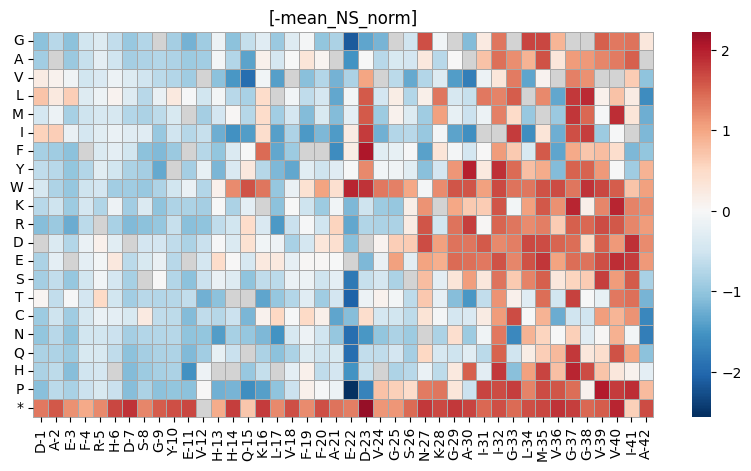

In [266]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(df_neg_NS_norm[transformation + '_l2_1e-05'], cmap=cmaps_df_neg_NS_norm[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_df_neg_NS_norm[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[-mean_NS_norm]')

plt.savefig('./figures/20240716_neg_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [217]:
weights_Nucleation['Sigmoid_l2_1e-05']

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
0      WT     WT   NaN      NaN  0.371381  0.391369  0.357266  0.348474   
1     D1*    D1*   1.0      1.0 -2.213683 -2.545237 -2.185623 -2.583970   
2     D1A    D1A   1.0      1.0  0.047495  0.067011  0.077061  0.008786   
3     D1C    D1C   1.0      1.0  0.020790 -0.018463  0.064381  0.025494   
4     D1E    D1E   1.0      1.0 -0.053183 -0.059048 -0.048736 -0.055957   
..    ...    ...   ...      ...       ...       ...       ...       ...   
836  A42T   A42T  42.0     42.0  0.145117  0.149020  0.219678  0.186265   
837  A42V   A42V  42.0     42.0  0.229532  0.334067  0.283984  0.229813   
838  A42W   A42W  42.0     42.0 -1.611651 -1.768430 -1.426433 -1.168376   
839  A42Y   A42Y  42.0     42.0 -0.916438 -0.897971 -1.026022 -1.039680   
840  E11M   E11M  11.0     11.0       NaN -0.360425 -0.839627 -0.742030   

       fold_5    fold_6  ...  structured_8ezd  structured_8eze  position  \
0    0.372521  0.341733  ...               NA               NA        NA   
1   -2.320398 -2.029718  ...                0                1         1   
2    0.037928  0.066478  ...                0                1         1   
3    0.063339  0.093359  ...                0                1         1   
4   -0.051849 -0.058691  ...                0                1         1   
..        ...       ...  ...              ...              ...       ...   
836  0.082041  0.077438  ...                1                1        42   
837  0.256938  0.260202  ...                1                1        42   
838 -1.707580 -1.035545  ...                1                1        42   
839 -1.146212 -0.833155  ...                1                1        42   
840 -0.623868 -0.809916  ...                0                1        11   

                                     Ab_variant   NS_mean  \
0    DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -0.396718   
1    *AEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -3.455152   
2    AAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.203929   
3    CAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.279631   
4    EAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA  0.085929   
..                                          ...       ...   
836  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIT  0.684932   
837  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIV  0.415592   
838  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIW -2.961942   
839  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIY -2.693652   
840  DAEFRHDSGYMVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA       NaN   

                                           NS_datasets  neg_NS_mean  \
0    ['NNK_doubles', 'Nicking_doubles', 'eLife_doub...     0.396718   
1                 ['Nicking_doubles', 'eLife_doubles']     3.455152   
2                 ['Nicking_doubles', 'eLife_doubles']    -0.203929   
3                 ['Nicking_doubles', 'eLife_doubles']    -0.279631   
4                 ['Nicking_doubles', 'eLife_doubles']    -0.085929   
..                                                 ...          ...   
836                   ['NNK_doubles', 'eLife_doubles']    -0.684932   
837                   ['NNK_doubles', 'eLife_doubles']    -0.415592   
838                                    ['NNK_doubles']     2.961942   
839                                    ['NNK_doubles']     2.693652   
840                                                 []          NaN   

     ddEa_norm neg_NS_mean_norm  ddEa_norm_minus_neg_NS_mean_norm  
0    -1.143439        -0.518977                         -0.624462  
1     1.629430         1.347350                          0.282080  
2    -0.827994        -0.885506                          0.057512  
3    -0.826276        -0.931701                          0.105425  
4    -0.711014        -0.813500                          0.102485  
..         ...              ...                               ...  
836  -0.935475        -1.179025                          0.243550  
837  -1.045884        -1.014667                         -0.0312

In [262]:
# add mean and put it at the top
previous_rows = list(diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].index)
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc['mean'] = diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc[all_aa[:-1],:].mean()
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'] = diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05'].loc[['mean'] + previous_rows]

In [263]:
diff_df_ddEa_norm_minus_neg_NS_mean_norm['Sigmoid_l2_1e-05']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
mean -0.030611 -0.007014  0.014162  0.016291  0.009284 -0.020058  0.055546   
G     0.059041  0.036116  0.063393 -0.000974  0.044194  0.074567  0.041057   
A     0.057512       NaN  0.047373  0.022104  0.003384  0.031608  0.105016   
V    -0.198048 -0.125910 -0.074642  0.094000  0.081375 -0.131060 -0.024043   
L    -0.379154 -0.055028 -0.483273  0.012756  0.015580 -0.111731  0.000995   
M    -0.000955 -0.166173  0.204907  0.014771  0.098063 -0.016444  0.075273   
I    -0.329638 -0.519104  0.043244 -0.010108  0.011037  0.145196 -0.049239   
F     0.280734  0.185827  0.161775       NaN  0.149038 -0.170819 -0.147588   
Y     0.039494  0.048718  0.109618  0.106944  0.110936  0.058341  0.151390   
W     0.023182  0.115474 -0.080870  0.071141  0.284113  0.354563  0.185708   
K     0.015872 -0.082058  0.101128  0.049507  0.157456 -0.411185  0.097784   
R     0.155142  0.104014  0.191449  0.078223       NaN  0.080495  0.166136   
D          NaN  0.029904  0.088196 -0.043151 -0.096361  0.100898       NaN   
E     0.102485  0.004604       NaN -0.007614  0.002533 -0.366987  0.087722   
S     0.108757  0.048132  0.101826 -0.006853 -0.160325 -0.011965  0.059374   
T    -0.835782  0.011232 -0.760643  0.015245 -0.777500  0.019630  0.093180   
C     0.105425  0.003660  0.126523  0.095916 -0.052387 -0.131907 -0.076058   
N     0.105755  0.148199  0.176270 -0.083220  0.115402  0.067402  0.014034   
Q     0.012566  0.095263  0.083865 -0.079031  0.064807  0.058358  0.115334   
H     0.126618 -0.009129  0.154788 -0.036424  0.115776       NaN  0.103747   
P     0.172081  0.052536  0.084366 -0.088835  0.084388  0.054801  0.093567   
*     0.282080 -0.341960  0.073397  0.577173 -0.262549  0.100492 -0.212733   

           S-8       G-9      Y-10  ...      G-33      L-34      M-35  \
mean  0.089577  0.089726  0.009979  ... -0.231167 -0.343540 -0.090826   
G     0.009408       NaN  0.045239  ...       NaN -0.108241 -0.214868   
A     0.146671  0.055509  0.031568  ... -0.310763 -0.452744 -0.330390   
V     0.048180  0.099643  0.128982  ... -0.118316  0.272700 -0.037168   
L     0.202671 -0.062634 -0.490151  ... -0.711358       NaN -0.217163   
M     0.151364  0.094400 -0.008479  ... -0.710701  0.286640       NaN   
I    -0.025221  0.388869  0.000502  ... -0.211578  0.273951  0.131069   
F     0.370369  0.285993  0.218641  ...  0.039843  0.102298  0.259547   
Y     0.182522  0.252897       NaN  ... -0.870840 -0.516981  0.149412   
W     0.235702  0.200159  0.016238  ...  0.344290 -0.189717 -0.227975   
K    -0.261407  0.214492  0.137104  ...  0.163136 -0.719237  0.439745   
R     0.146295  0.036644 -0.253355  ... -0.303331 -0.509693  0.524041   
D     0.021453  0.134722  0.050060  ...  0.071590 -0.121054  0.722249   
E     0.038391  0.042452  0.099718  ... -0.068387 -0.219754  0.452263   
S          NaN -0.567768  0.040890  ... -0.103325 -1.095139 -0.486795   
T     0.084368  0.086807  0.026033  ... -0.154784 -0.368849  0.237374   
C    -0.086218  0.108049  0.044019  ... -1.130192 -0.783711 -0.287275   
N     0.036510  0.071437  0.022721  ... -0.145472 -1.313324 -1.132542   
Q     0.152267  0.111568  0.008864  ... -0.145646 -0.540663 -0.394003   
H     0.159059  0.061831  0.061033  ...  0.204825 -0.180198 -1.222398   
P     0.036572  0.160049  0.079383  ... -0.217360  0.200417  0.417303   
*    -0.341899 -0.104481 -0.045011  ...  0.321410  0.574871  0.571320   

          V-36      G-37      G-38      V-39      V-40      I-41      A-42  
mean  0.021580  0.695188  0.241614 -0.076921 -0.114748 -0.032477 -0.035986  
G     0.023401       NaN       NaN  0.768396  0.159960  0.480836 -0.013441  
A     0.032839 -0.047254 -0.020075 -0.049211  0.043144  0.358958       NaN  
V          NaN  0.157922 -0.010217       NaN       NaN -0.010947 -0.031217  
L     0.415553  1.130526  0.194995  0.101914 -0.110052 -0.004191 -0.235132  
M     0.280089  0.723256  0.082381  0.224294 -1.103047  0.040078 -0.340118

In [264]:
cmaps_diff_df = {}
masks_diff_df = {}

for transformation in transformations:
    #print(transformation)
    masks_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_' + l2_regularisation_factor_value].isnull()

    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value] = matplotlib.colormaps.get('RdBu_r')
    cmaps_diff_df[transformation + '_l2_' + l2_regularisation_factor_value].set_bad("lightgrey")

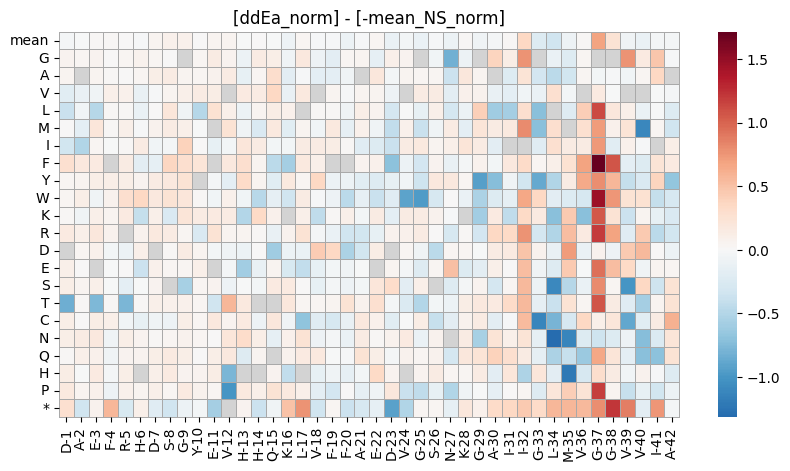

In [267]:
transformation = 'Sigmoid'
fig = plt.figure(figsize=(10, 5))
sns.heatmap(diff_df_ddEa_norm_minus_neg_NS_mean_norm[transformation + '_l2_1e-05'], cmap=cmaps_diff_df[transformation + '_l2_1e-05'], 
            #vmin = ddE_df_mean_kcalmol.fillna(0, inplace=False).to_numpy().min(),
            #vmax = 5,
            mask=masks_diff_df[transformation + '_l2_1e-05'],
            linewidths=0.5, linecolor='darkgrey', clip_on=False,
            center=0)
plt.yticks(rotation=0) 
#plt.xticks(rotation=0) 
plt.title('[ddEa_norm] - [-mean_NS_norm]')

plt.savefig('./figures/20240716_ddEa_norm_vs_neg_mean_NS_norm_heatmap.pdf',
           bbox_inches = 'tight')

In [268]:
ddEa_norm_minus_neg_NS_mean_norm = [elem for elem in weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] if str(elem) != 'nan']

cutoff_max = 1 #np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.99)
cutoff_min = -1 #np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.01)

In [269]:
cutoff_max = np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.99)
cutoff_min = np.quantile(ddEa_norm_minus_neg_NS_mean_norm, q=0.01)

print('cutoff_max:', cutoff_max)
print('cutoff_min:', cutoff_min)


cutoff_max: 1.0202486060545228
cutoff_min: -0.9612635965324559


In [270]:
weights_Nucleation['Sigmoid_l2_1e-05'][(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] > cutoff_max)]

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
725  G37F   G37F  37.0     37.0 -3.283918 -3.840109 -3.246306 -3.397654   
728  G37K   G37K  37.0     37.0 -3.727061 -3.694291 -3.599035 -3.527509   
729  G37L   G37L  37.0     37.0 -3.618431 -3.199268 -3.342215 -3.326509   
732  G37P   G37P  37.0     37.0 -3.308399 -3.528811 -3.416836 -3.202698   
734  G37R   G37R  37.0     37.0 -3.483965 -3.148991 -3.366560 -3.886751   
736  G37T   G37T  37.0     37.0 -3.658756 -3.300708 -3.933917 -3.630251   
738  G37W   G37W  37.0     37.0 -3.843828 -3.746850 -3.307754 -3.536465   
740  G38*   G38*  38.0     38.0 -3.460960 -3.421925 -3.706717 -3.273619   
745  G38F   G38F  38.0     38.0 -2.169121 -2.353373 -2.513703 -2.868635   

       fold_5    fold_6  ...  structured_8ezd  structured_8eze  position  \
725 -3.470367 -3.393270  ...                1                1        37   
728 -3.303558 -3.522774  ...                1                1        37   
729 -3.378123 -3.826239  ...                1                1        37   
732 -2.998166 -3.255577  ...                1                1        37   
734 -3.717236 -3.774546  ...                1                1        37   
736 -3.318112 -3.467153  ...                1                1        37   
738 -3.270027 -3.783327  ...                1                1        37   
740 -2.947439 -3.735375  ...                1                1        38   
745 -2.869389 -2.364705  ...                1                1        38   

                                     Ab_variant   NS_mean  \
725  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVFGVVIA -2.816598   
728  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVKGVVIA -4.432255   
729  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVLGVVIA -4.197256   
732  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVPGVVIA -3.603035   
734  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVRGVVIA -3.754826   
736  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVTGVVIA -4.102111   
738  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVWGVVIA -3.485982   
740  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVG*VVIA -3.640454   
745  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGFVVIA -2.391648   

                          NS_datasets  neg_NS_mean  ddEa_norm  \
725  ['NNK_doubles', 'eLife_doubles']     2.816598   2.670068   
728                   ['NNK_doubles']     4.432255   3.004429   
729                   ['NNK_doubles']     4.197256   2.930726   
732                   ['NNK_doubles']     3.603035   2.617936   
734  ['NNK_doubles', 'eLife_doubles']     3.754826   2.730772   
736                   ['NNK_doubles']     4.102111   2.815347   
738                   ['NNK_doubles']     3.485982   2.827399   
740  ['NNK_doubles', 'eLife_doubles']     3.640454   2.679768   
745  ['NNK_doubles', 'eLife_doubles']     2.391648   1.775122   

    neg_NS_mean_norm  ddEa_norm_minus_neg_NS_mean_norm  
725         0.957690                          1.712378  
728         1.943601                          1.060828  
729         1.800199                          1.130526  
732         1.437592                          1.180345  
734         1.530218                          1.200554  
736         1.742139                          1.073207  
738         1.366163                          1.461236  
740         1.460426                          1.219342  
745         0.698375                          1.076747  

[9 rows x 47 columns]

In [271]:
weights_Nucleation['Sigmoid_l2_1e-05'][(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa_norm_minus_neg_NS_mean_norm'] < cutoff_min)]

id id_ref   Pos  Pos_ref    fold_1    fold_2    fold_3    fold_4  \
233  V12P   V12P  12.0     12.0  0.270248  0.279282  0.244974  0.175946   
498  G25W   G25W  25.0     25.0 -1.080932 -1.082174 -1.046879 -1.008553   
642  G33C   G33C  33.0     33.0 -0.676291 -1.278804 -1.240811 -1.392062   
671  L34N   L34N  34.0     34.0 -0.614277 -0.367545 -0.380615 -0.294573   
675  L34S   L34S  34.0     34.0 -0.931436 -0.987392 -0.931397 -1.187664   
687  M35H   M35H  35.0     35.0 -1.097315 -0.846718 -1.095002 -1.172856   
691  M35N   M35N  35.0     35.0 -0.154176 -0.462187 -0.337056 -0.414996   
776  V39S   V39S  39.0     39.0 -1.526624 -1.402486 -1.382038 -1.392608   
791  V40M   V40M  40.0     40.0 -1.605967 -1.508951 -2.043410 -1.675011   

       fold_5    fold_6  ...  structured_8ezd  structured_8eze  position  \
233  0.085674  0.114450  ...                1                1        12   
498 -0.965967 -1.039781  ...                1                1        25   
642 -1.025742 -0.860965  ...                1                1        33   
671 -0.297958 -0.353970  ...                1                1        34   
675 -0.882890 -0.776402  ...                1                1        34   
687 -1.253472 -1.426703  ...                1                1        35   
691 -0.171930 -0.065591  ...                1                1        35   
776 -1.634983 -1.411504  ...                1                1        39   
791 -1.360038 -1.080618  ...                1                1        40   

                                     Ab_variant   NS_mean  \
233  DAEFRHDSGYEPHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA -1.249218   
498  DAEFRHDSGYEVHHQKLVFFAEDVWSNKGAIIGLMVGGVVIA -3.341265   
642  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIICLMVGGVVIA  -3.99135   
671  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGNMVGGVVIA -2.709581   
675  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGSMVGGVVIA -3.317999   
687  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLHVGGVVIA -4.070707   
691  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLNVGGVVIA -2.183778   
776  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGSVIA -4.150305   
791  DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVMIA -4.314369   

                              NS_datasets  neg_NS_mean  ddEa_norm  \
233  ['Nicking_doubles', 'eLife_doubles']     1.249218  -1.006599   
498  ['Nicking_doubles', 'eLife_doubles']     3.341265   0.307566   
642      ['NNK_doubles', 'eLife_doubles']      3.99135   0.544359   
671      ['NNK_doubles', 'eLife_doubles']     2.709581  -0.420938   
675      ['NNK_doubles', 'eLife_doubles']     3.317999   0.168517   
687                       ['NNK_doubles']     4.070707   0.500579   
691      ['NNK_doubles', 'eLife_doubles']     2.183778  -0.561013   
776      ['NNK_doubles', 'eLife_doubles']     4.150305   0.755205   
791                       ['NNK_doubles']     4.314369   0.768617   

    neg_NS_mean_norm  ddEa_norm_minus_neg_NS_mean_norm  
233         0.001238                         -1.007837  
498         1.277854                         -0.970288  
642         1.674551                         -1.130192  
671         0.892386                         -1.313324  
675         1.263657                         -1.095139  
687         1.722976                         -1.222398  
691         0.571528                         -1.132542  
776         1.771549                         -1.016343  
791         1.871664                         -1.103047  

[9 rows x 47 columns]

In [272]:
N_term = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[:28])
C_term = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[28:])


N_term_values = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,N_term])
N_term_values = [x for xs in N_term_values for x in xs]
N_term_values = [elem for elem in N_term_values if str(elem) != 'nan']

C_term_values = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,C_term])
C_term_values = [x for xs in C_term_values for x in xs]
C_term_values = [elem for elem in C_term_values if str(elem) != 'nan']

In [273]:
scipy.stats.mannwhitneyu(C_term_values, N_term_values, alternative='greater')

MannwhitneyuResult(statistic=117194.0, pvalue=5.271081437208383e-52)

In [274]:
# produce a quick barplot too
df_barplot = pd.DataFrame(data = {'ddEa': N_term_values + C_term_values,
                                 'terminus': ['N-terminus']*len(N_term_values) + ['C-terminus']*len(C_term_values)})

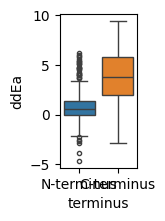

In [275]:
fig = plt.figure(figsize=(1, 2))

sns.boxplot(df_barplot, x = 'terminus', y = 'ddEa', hue = 'terminus',
           flierprops={"marker": "."}
           )

plt.savefig('./figures/20240716_N_term_vs_C_term_ddEa.pdf',
           bbox_inches = 'tight')

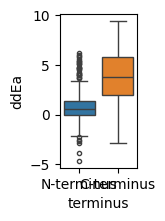

In [276]:
fig = plt.figure(figsize=(1, 2))

sns.boxplot(df_barplot, x = 'terminus', y = 'ddEa', hue = 'terminus',
           flierprops={"marker": "."}
           )

plt.savefig('./figures/20240516_N_term_vs_C_term_ddEa.pdf',
           bbox_inches = 'tight')

In [277]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[28:]

Index(['G-29', 'A-30', 'I-31', 'I-32', 'G-33', 'L-34', 'M-35', 'V-36', 'G-37',
       'G-38', 'V-39', 'V-40', 'I-41', 'A-42'],
      dtype='object')

In [278]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[16:21]

Index(['L-17', 'V-18', 'F-19', 'F-20', 'A-21'], dtype='object')

In [279]:
ddE_df_mean_kcalmol['Sigmoid_l2_1e-05']

D-1       A-2       E-3       F-4       R-5       H-6       D-7  \
mean  0.445846  0.727165  0.090566  0.756384  1.272451  0.906969  0.124844   
G    -0.513740  0.257202 -0.524391  0.666902  1.172574  0.538170 -0.379760   
A    -0.147763       NaN -0.309471  0.506991  1.287016  0.702866 -0.002935   
V     1.982111  1.855294  1.460877  0.918588  1.157460  1.221586  0.994238   
L     2.752797  2.418817  2.271359  1.141775  1.614956  1.857726  1.097659   
M     0.842132  1.169468  0.299724  0.630338  1.108589  0.808810  0.214325   
I     2.590310  2.172209  1.549483  0.781311  1.236310  1.819976  1.013811   
F     0.480155  0.128483 -0.251483       NaN  1.393774  0.853974  0.292976   
Y     0.413142  0.286494 -0.306889  0.345169  1.466453  0.835888  0.280575   
W     0.922289  0.200349 -0.720210  0.783091  1.428499  0.593596  0.121613   
K     0.189033  0.366360 -0.134040  0.965446  0.359003  0.588470 -0.033936   
R    -0.440705 -0.172915 -0.773003  0.417307       NaN  0.064144 -0.483730   
D          NaN  1.074152  0.297533  1.350546  1.997769  1.449760       NaN   
E     0.144910  1.291775       NaN  1.265898  1.770406  1.672393  0.428036   
S     0.008776  0.460140 -0.263970  0.676532  1.293459  0.751449 -0.063327   
T    -0.063242  0.395846 -0.065886  0.778848  1.273441  0.722395 -0.056672   
C    -0.143465  0.615007 -0.045177  1.090435  1.327591  0.983511  0.722821   
N    -0.331246  0.529451 -0.194549  0.493632  0.988414  0.698784 -0.212127   
Q    -0.071518  0.192011 -0.166979  0.721896  1.092912  0.436310 -0.398622   
H     0.190893  0.242469 -0.432074  0.534382  1.068784       NaN -0.579730   
P    -0.333803  0.333527  0.029901  0.302209  1.139158  0.632606 -0.583180   

           S-8       G-9      Y-10  ...      G-33      L-34      M-35  \
mean  0.444890  0.320144  0.280344  ...  3.277034  2.505846  4.910027   
G     0.049165       NaN -0.152985  ...       NaN  5.986507  5.676245   
A     0.284632  0.207127 -0.004661  ...  4.130022  3.021727  5.139845   
V     0.771720  0.443632  0.402577  ...  4.915985 -0.736443  2.057580   
L     0.690486  1.289209  1.344692  ...  4.021306       NaN  4.457238   
M     0.265724  0.507249  0.897652  ...  1.389000  0.231609       NaN   
I     1.108447  0.498474  0.629187  ...  5.880424 -1.333675  3.044939   
F     0.276359 -0.183608  0.121737  ...  3.660147  1.174189  6.458651   
Y     0.187702 -0.715327       NaN  ...  3.385179  2.567611  4.677266   
W     0.091317  0.421011  0.730887  ...  6.268929  4.903888  5.398989   
K     0.370751 -0.074992  0.295757  ...  2.146400  2.764652  6.952580   
R    -0.347089 -0.423780 -0.178879  ...  4.583993  3.649564  6.500716   
D     0.779571  1.065562  0.421272  ...  5.357149  5.835927  7.934138   
E     1.017098  1.528834  0.395723  ...  4.839874  5.432493  7.613073   
S          NaN  0.540757  0.115146  ...  3.343899  2.345430  4.512125   
T     0.384965  0.274531  0.169885  ...  1.820635  0.227592  6.103585   
C     2.274027  0.568300  0.371979  ...  3.285757 -0.080199  3.420193   
N     0.167226  0.270543  0.155231  ... -2.571484  0.870658  0.520202   
Q     0.107383  0.185034 -0.065110  ...  0.264474  1.044905  2.485212   
H     0.000609 -0.066131  0.050077  ... -0.274968  4.122547  3.176222   
P    -0.027180 -0.253683 -0.373626  ...  5.816920  5.582088  7.161721   

          V-36      G-37      G-38      V-39      V-40      I-41      A-42  
mean  2.384250  7.066347  4.728909  3.993280  4.483541  3.895640  1.146866  
G     4.148929       NaN       NaN  7.653882  5.714533  6.609346  2.607290  
A     2.753544  4.544543  4.662272  4.888832  5.341470  6.636207       NaN  
V          NaN  5.517632  4.814599       NaN       NaN  3.502116 -0.692907  
L    -0.312345  9.256260  7.166352  2.478533  3.498711  2.456996 -2.662287  
M     0.241387  8.272791  5.801625  2.405861  3.846833  2.855504 -2.056350  
I    -0.821111  7.874150  5.849606 -0.153560  1.797520       NaN -0.699159  
F     0.252573  8.604114  6.365029  3.472572  2.487587 -0.379039 -0.178

In [280]:
all_aa

['G',
 'A',
 'V',
 'L',
 'M',
 'I',
 'F',
 'Y',
 'W',
 'K',
 'R',
 'D',
 'E',
 'S',
 'T',
 'C',
 'N',
 'Q',
 'H',
 'P']

In [281]:
positions_APR1 = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[16:21])
positions_APR2 = list(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].columns[28:])


ddEa_APR1 = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,positions_APR1])
ddEa_APR1 = [x for xs in ddEa_APR1 for x in xs]
ddEa_APR1 = [elem for elem in ddEa_APR1 if str(elem) != 'nan']

ddEa_APR2 = np.array(ddE_df_mean_kcalmol['Sigmoid_l2_1e-05'].loc[all_aa,positions_APR2])
ddEa_APR2 = [x for xs in ddEa_APR2 for x in xs]
ddEa_APR2 = [elem for elem in ddEa_APR2 if str(elem) != 'nan']

In [282]:
scipy.stats.mannwhitneyu(ddEa_APR2, ddEa_APR1, alternative='greater')

MannwhitneyuResult(statistic=21383.0, pvalue=6.298303066682783e-24)

In [283]:
# produce a quick barplot too
df_barplot = pd.DataFrame(data = {'ddEa': ddEa_APR1 + ddEa_APR2,
                                 'region': ['APR1']*len(ddEa_APR1) + ['APR2']*len(ddEa_APR2)})

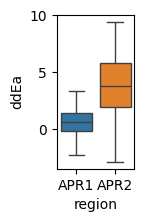

In [284]:
fig = plt.figure(figsize=(1, 2))

sns.boxplot(df_barplot, x = 'region', y = 'ddEa', hue = 'region',
           flierprops={"marker": "."}
           )

plt.savefig('./figures/20240716_APR1_vs_APR2_ddEa.pdf',
           bbox_inches = 'tight')

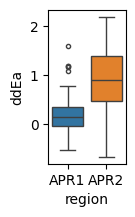

In [77]:
fig = plt.figure(figsize=(1, 2))

sns.boxplot(df_barplot, x = 'region', y = 'ddEa', hue = 'region',
           flierprops={"marker": "."}
           )

plt.savefig('./figures/20240614_APR1_vs_APR2_ddEa.pdf',
           bbox_inches = 'tight')

In [112]:
fAD_mutations = ['H6R','D7H','D7N','E11K','K16Q','L17V','A21G','E22G','E22K','E22Q','D23N','L34V','A42T']

In [118]:
for mut in fAD_mutations:
    print (mut)

H6R
D7H
D7N
E11K
K16Q
L17V
A21G
E22G
E22K
E22Q
D23N
L34V
A42T


In [113]:
weights_Nucleation_copy = weights_Nucleation['Sigmoid_l2_1e-05'].copy()

In [133]:
weights_Nucleation_copy.set_index('id').loc[fAD_mutations,'ddEa'].sort_values()

id
E22G   -0.891521
E22Q   -0.620139
D23N   -0.366680
L17V   -0.267456
L34V   -0.171591
E22K   -0.143366
D7H    -0.135077
A42T   -0.097084
D7N    -0.049426
A21G    0.005184
H6R     0.014945
K16Q    0.024092
E11K    0.066428
Name: ddEa, dtype: float64

In [117]:
weights_Nucleation_copy.set_index('id').loc[fAD_mutations,'neg_NS_mean']

id
H6R    -0.102796
D7H    -0.562633
D7N    -0.174839
E11K   -0.091867
K16Q   -0.073479
L17V    -1.05254
A21G   -0.089464
E22G   -2.274047
E22K   -0.648582
E22Q   -1.935868
D23N   -1.175521
L34V   -0.942149
A42T   -0.684932
Name: neg_NS_mean, dtype: object

/tmp/ipykernel_857361/3531428374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])


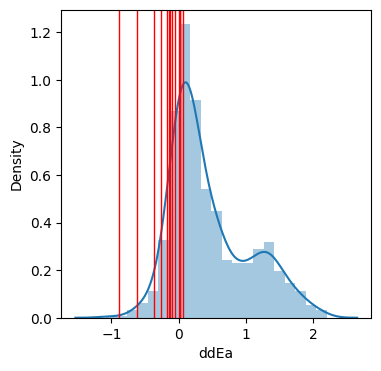

In [128]:
fig = plt.figure(figsize=(4, 4))

sns.distplot(weights_Nucleation['Sigmoid_l2_1e-05']['ddEa'])

for mutation in fAD_mutations:
    
    curr_ddEa = weights_Nucleation_copy.set_index('id').loc[mutation,'ddEa']
    
    plt.axvline(curr_ddEa, color='r', lw=1, label=mutation)

In [39]:
# plot in different ways; see what looks best & add to Fig1d

## Correlation plots of log(lambda / kappa / k+kn / k+k2) with:

- eLife fitness data points
- NNK fitness data points
- Nicking fitness data points
- ddEa from joint model [trained on all 3 doubles datasets]

### Thacker rate constants (lambda and kappa)

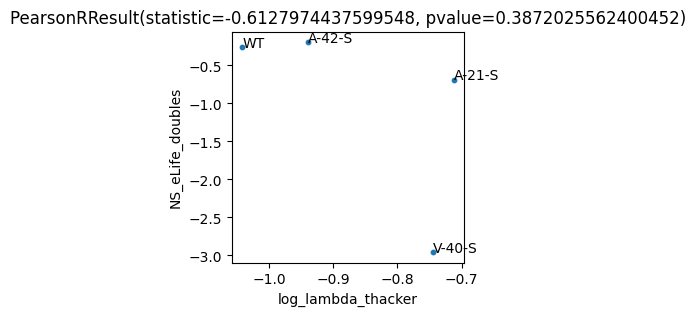

In [109]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

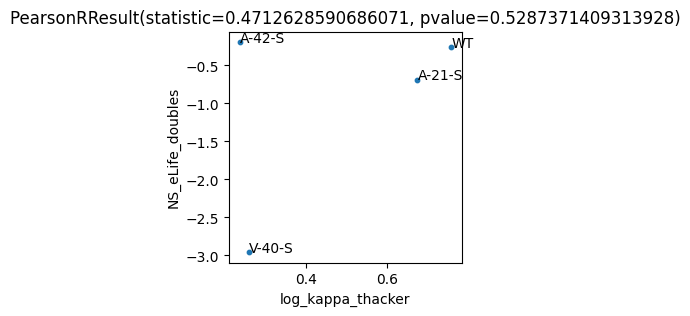

In [176]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

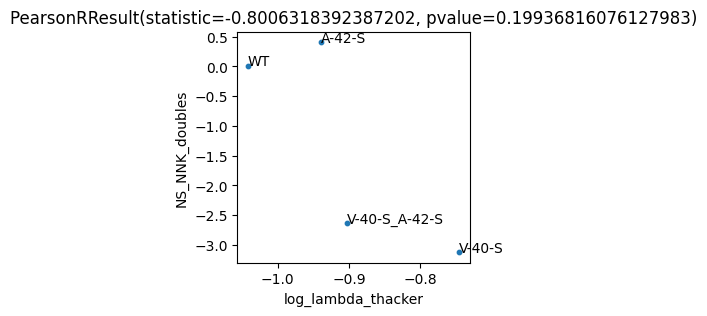

In [177]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

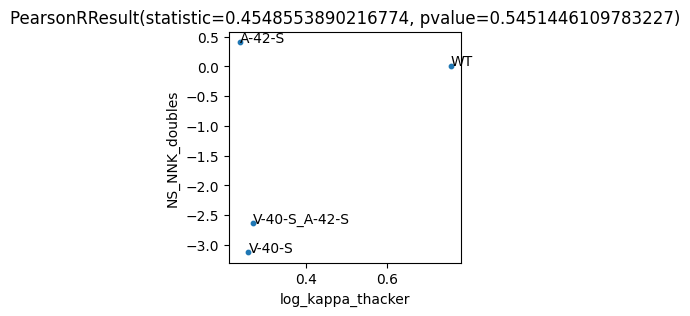

In [178]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

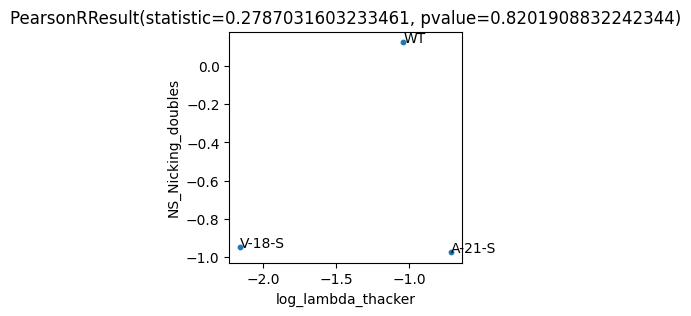

In [179]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

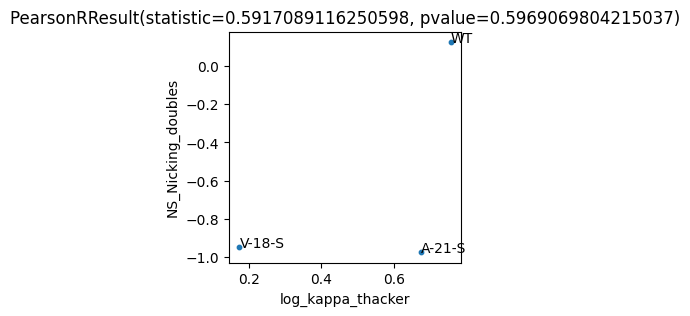

In [180]:
curr_rate_const_dataset = 'thacker'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

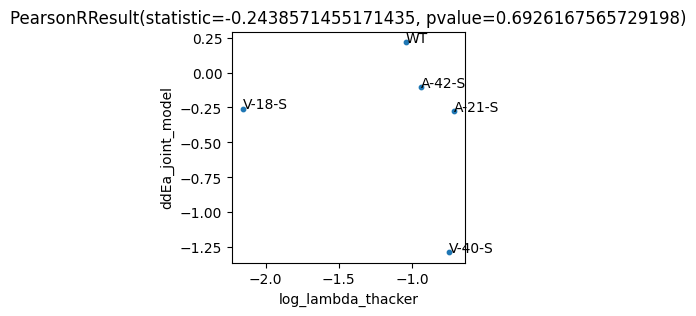

In [181]:
curr_rate_const_dataset = 'thacker'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

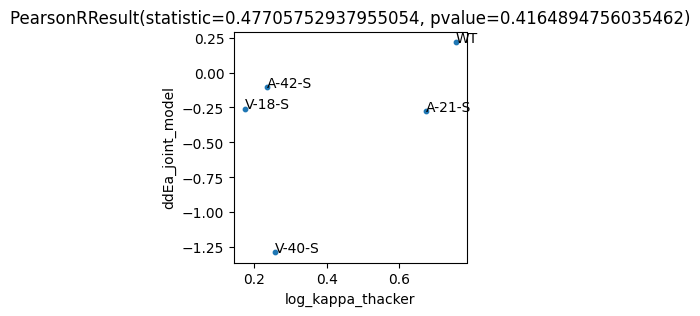

In [220]:
curr_rate_const_dataset = 'thacker'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

### Meisl rate "constants" [constants multiplied by a factor] (k+kn and k+k2)

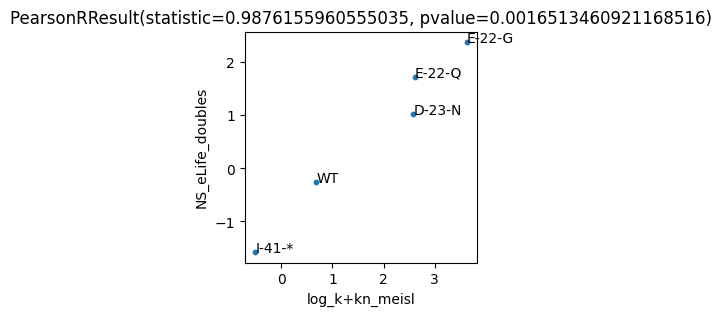

In [183]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+kn_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

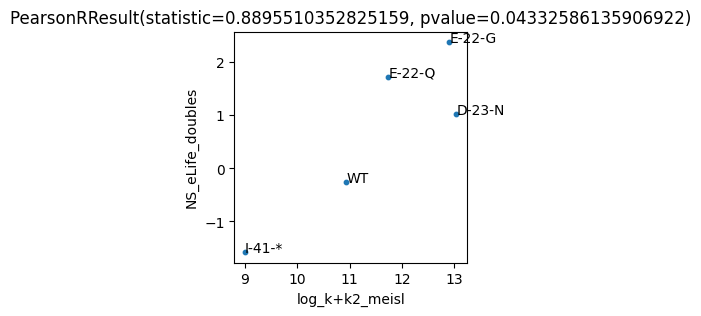

In [184]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

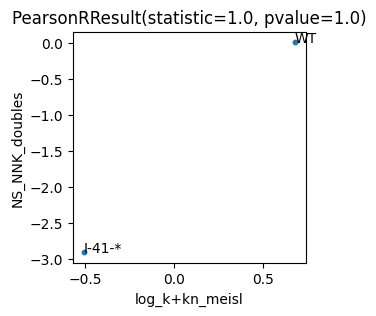

In [185]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+kn_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

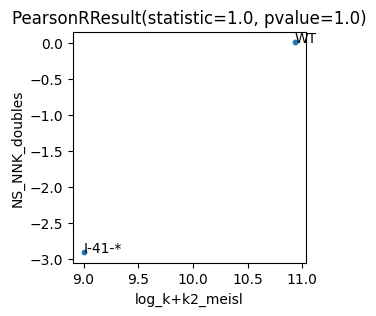

In [186]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

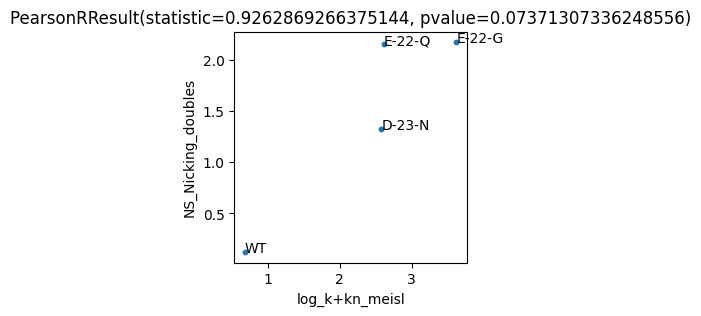

In [187]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+kn_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

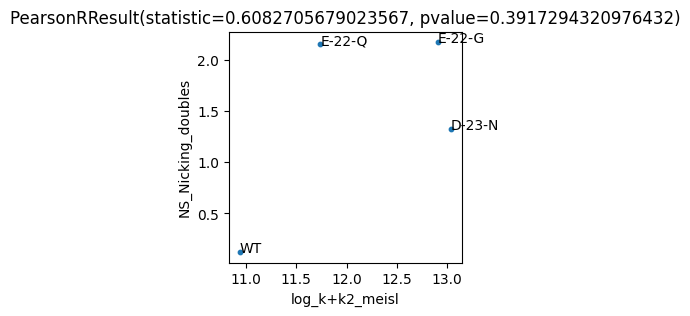

In [188]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

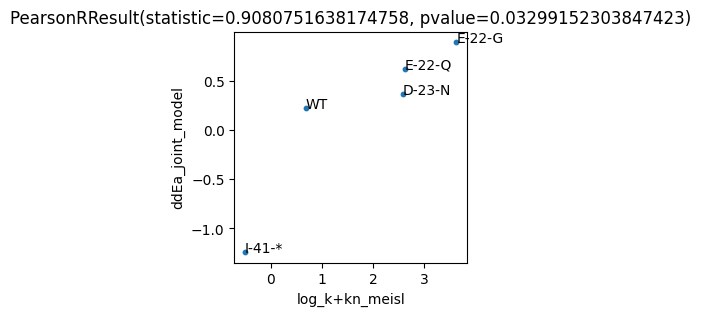

In [190]:
curr_rate_const_dataset = 'meisl'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+kn_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

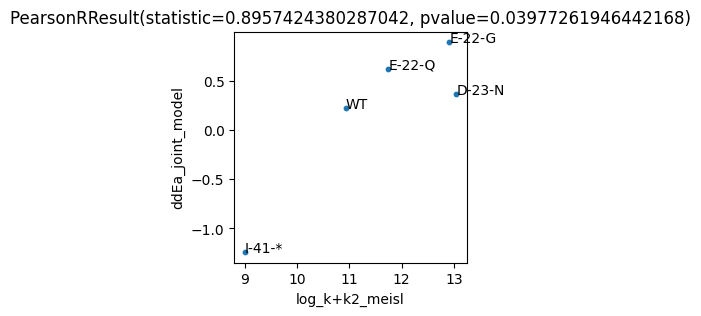

In [219]:
curr_rate_const_dataset = 'meisl'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

### Iles-Toth rate constants (lambda and kappa)

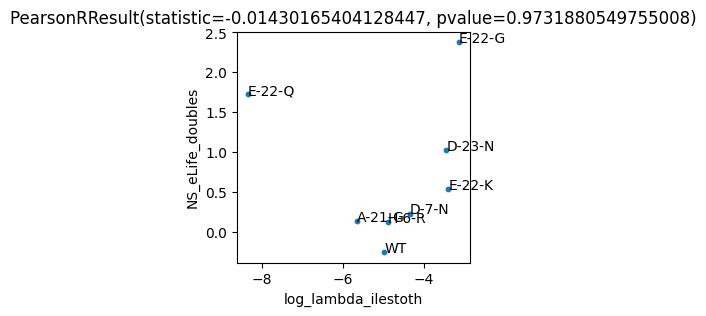

In [209]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

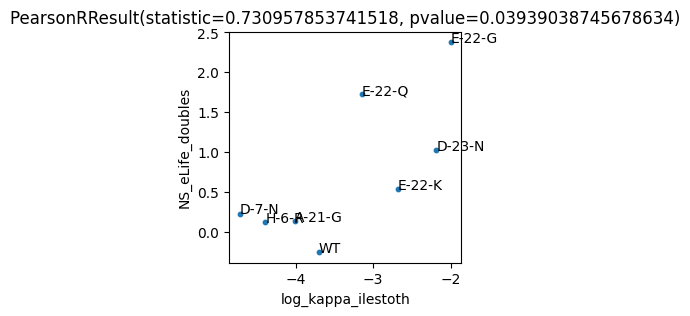

In [211]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

ValueError: x and y must have length at least 2.

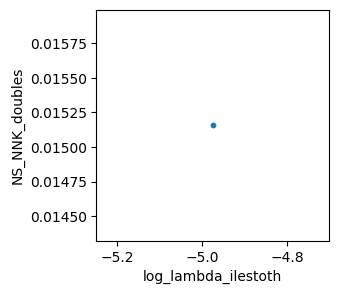

In [212]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

ValueError: x and y must have length at least 2.

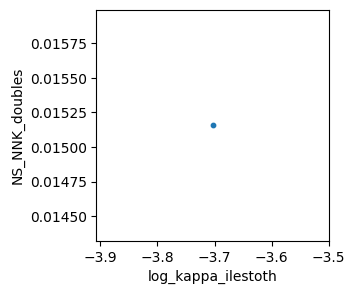

In [215]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'NNK_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

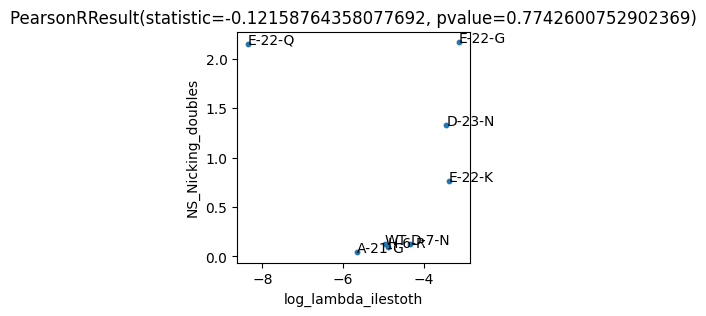

In [216]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

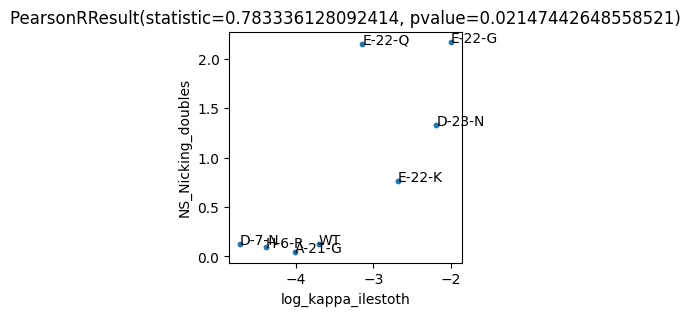

In [296]:
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'Nicking_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

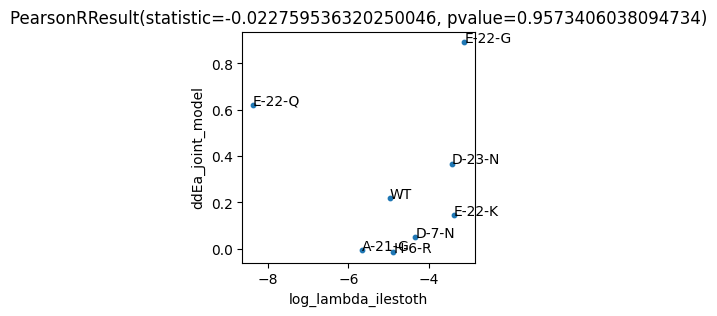

In [218]:
curr_rate_const_dataset = 'ilestoth'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_lambda_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

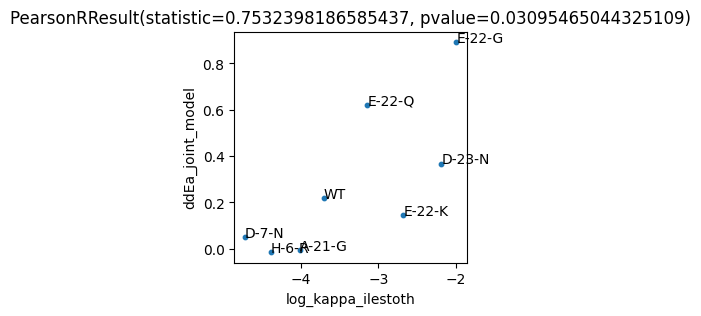

In [222]:
curr_rate_const_dataset = 'ilestoth'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'ddEa_joint_model']].dropna()

curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['ddEa_joint_model'])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_kappa_' + curr_rate_const_dataset)
plt.ylabel('ddEa_joint_model')
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

### For main Fig.1d plotting correlations of k+kn and k+k2 to NS_eLife

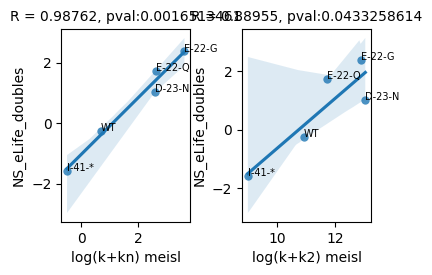

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+kn_' + curr_rate_const_dataset] = np.array(curr_df['log_k+kn_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+kn_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+k2_' + curr_rate_const_dataset] = np.array(curr_df['log_k+k2_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+k2_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_Meisl_log_k+kn_and_log_k+k2_vs_NS_eLife.pdf', bbox_inches='tight', 
            transparent=True)

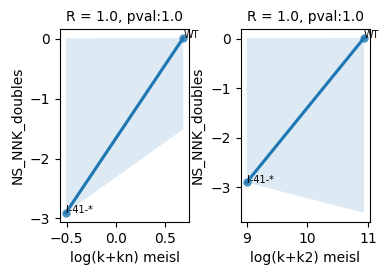

In [291]:
# Meisl ~ NNK for Supplementary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'NNK_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+kn_' + curr_rate_const_dataset] = np.array(curr_df['log_k+kn_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+kn_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'NNK_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+k2_' + curr_rate_const_dataset] = np.array(curr_df['log_k+k2_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+k2_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_Meisl_log_k+kn_and_log_k+k2_vs_NS_NNK.pdf', bbox_inches='tight', 
            transparent=True)

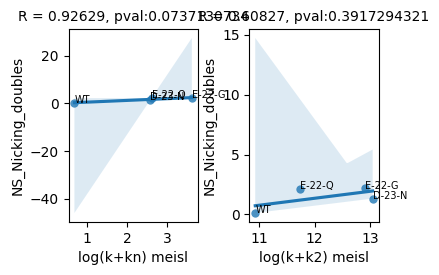

In [292]:
# Meisl ~ Nicking for Supplementary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'Nicking_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+kn_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+kn_' + curr_rate_const_dataset] = np.array(curr_df['log_k+kn_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+kn_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+kn_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(k+kn) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'Nicking_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+k2_' + curr_rate_const_dataset] = np.array(curr_df['log_k+k2_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+k2_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(k+k2) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_Meisl_log_k+kn_and_log_k+k2_vs_NS_Nicking.pdf', bbox_inches='tight', 
            transparent=True)

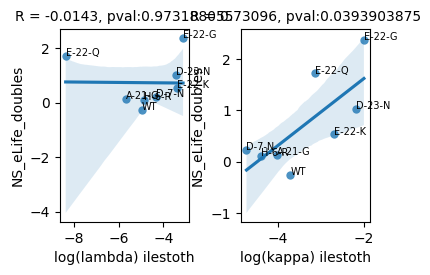

In [293]:
# Iles-Toth ~ eLife for Supplementary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'eLife_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_lambda_' + curr_rate_const_dataset] = np.array(curr_df['log_lambda_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_lambda_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'eLife_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_kappa_' + curr_rate_const_dataset] = np.array(curr_df['log_kappa_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_kappa_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_IlesToth_log_lambda_and_log_kappa_vs_NS_eLife.pdf', bbox_inches='tight', 
            transparent=True)

ValueError: x and y must have length at least 2.

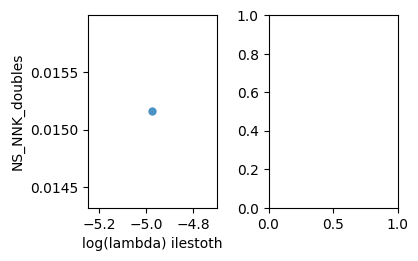

In [294]:
# Iles-Toth ~ NNK for Supplementary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'NNK_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_lambda_' + curr_rate_const_dataset] = np.array(curr_df['log_lambda_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_lambda_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'NNK_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_kappa_' + curr_rate_const_dataset] = np.array(curr_df['log_kappa_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_kappa_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_IlesToth_log_lambda_and_log_kappa_vs_NS_NNK.pdf', bbox_inches='tight', 
            transparent=True)

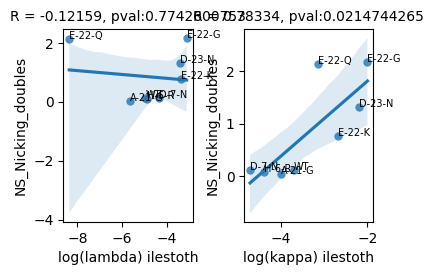

In [295]:
# Iles-Toth ~ Nicking for Supplementary

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4,2.5))

plt.subplots_adjust(wspace=0.4)


curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'Nicking_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_lambda_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_lambda_' + curr_rate_const_dataset] = np.array(curr_df['log_lambda_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_lambda_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_lambda_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, ax=ax1
           )

ax1.set_xlabel('log(lambda) ' + curr_rate_const_dataset)
ax1.set_ylabel('NS_' + curr_doubles_dataset)
ax1.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)


for i, txt in enumerate(curr_labels):
    ax1.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)
    
    
    
curr_rate_const_dataset = 'ilestoth'
curr_doubles_dataset = 'Nicking_doubles'

curr_df = rate_constants[curr_rate_const_dataset][['log_kappa_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_kappa_' + curr_rate_const_dataset] = np.array(curr_df['log_kappa_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_kappa_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_kappa_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}, 
            ax=ax2
           )

ax2.set_xlabel('log(kappa) ' + curr_rate_const_dataset)
ax2.set_ylabel('NS_' + curr_doubles_dataset)
ax2.set_title('R = ' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.pearsonr(curr_x, curr_y)[1],10)), 
          fontsize=10)

for i, txt in enumerate(curr_labels):
    ax2.annotate(txt, (curr_x[i], curr_y[i]), fontsize=7)


    
    
    
plt.savefig('./figures/20240502_Fig1d_panel_IlesToth_log_lambda_and_log_kappa_vs_NS_Nicking.pdf', bbox_inches='tight', 
            transparent=True)

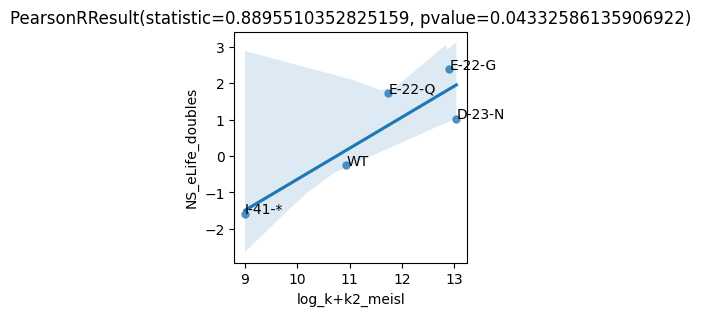

In [253]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()
curr_df['log_k+k2_' + curr_rate_const_dataset] = np.array(curr_df['log_k+k2_' + curr_rate_const_dataset], dtype=float)
curr_df['NS_' + curr_doubles_dataset] = np.array(curr_df['NS_' + curr_doubles_dataset], dtype=float)


curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

sns.regplot(curr_df, x = 'log_k+k2_' + curr_rate_const_dataset, y='NS_' + curr_doubles_dataset,
            scatter_kws={'linewidths': 0}
           )
#ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)
    
plt.savefig('./figures/20240502_Fig1d_panel_Meisl_log_k+k2_vs_NS_eLife.pdf', bbox_inches='tight', 
            transparent=True)

In [233]:
curr_y

array([-0.25486117, -1.57787524,  1.02592851,  2.37794117,  1.72353223])

In [227]:
curr_df

log_k+kn_meisl NS_eLife_doubles
Ab_variant_full                                                            
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA        0.681241        -0.254861
DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVV*A       -0.508638        -1.577875
DAEFRHDSGYEVHHQKLVFFAENVGSNKGAIIGLMVGGVVIA        2.579784         1.025929
DAEFRHDSGYEVHHQKLVFFAGDVGSNKGAIIGLMVGGVVIA        3.623249         2.377941
DAEFRHDSGYEVHHQKLVFFAQDVGSNKGAIIGLMVGGVVIA        2.612784         1.723532

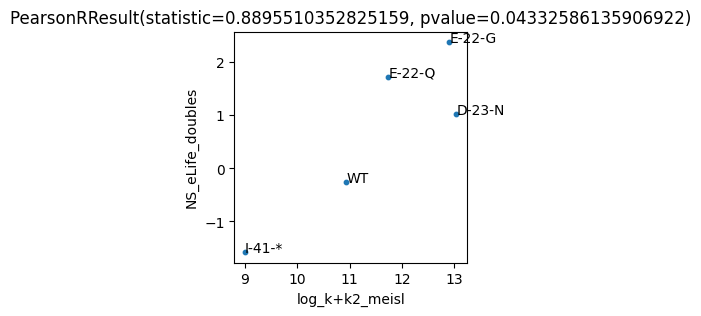

In [184]:
curr_rate_const_dataset = 'meisl'
curr_doubles_dataset = 'eLife_doubles'

fig, ax = plt.subplots(figsize=(3,3))

curr_df = rate_constants[curr_rate_const_dataset][['log_k+k2_' + curr_rate_const_dataset,'NS_' + curr_doubles_dataset]].dropna()

curr_x = list(curr_df['log_k+k2_' + curr_rate_const_dataset])
curr_y = list(curr_df['NS_' + curr_doubles_dataset])

curr_labels = list(rate_constants[curr_rate_const_dataset].loc[curr_df.index,'mutation_id'])

ax.scatter(curr_x, curr_y, s=10)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('log_k+k2_' + curr_rate_const_dataset)
plt.ylabel('NS_' + curr_doubles_dataset)
plt.title(scipy.stats.pearsonr(curr_x, curr_y))


for i, txt in enumerate(curr_labels):
    ax.annotate(txt, (curr_x[i], curr_y[i]), fontsize=10)

In [302]:
all_variants['eLife_doubles'].columns

Index(['merge_seq', 'aa_seq', 'Nham_nt', 'Nham_aa', 'Nmut_codons', 'WT',
       'STOP', 'STOP_readthrough', 'mean_count', 'count_e1_s0', 'count_e2_s0',
       'count_e3_s0', 'count_e1_s1', 'count_e2_s1', 'count_e3_s1',
       'fitness1_uncorr', 'sigma1_uncorr', 'fitness2_uncorr', 'sigma2_uncorr',
       'fitness3_uncorr', 'sigma3_uncorr', 'fitness', 'sigma', 'nscore_c',
       'sigma_norm_first_toWT', 'category_sigma', 'zscore_mode',
       'p.adjust_mode', 'category_dead'],
      dtype='object')

In [305]:
all_variants['eLife_doubles'][['fitness1_uncorr','fitness2_uncorr','fitness3_uncorr']]

fitness1_uncorr  fitness2_uncorr  fitness3_uncorr
1            -0.280176         0.175372              NaN
2             0.388480         0.306589         0.785219
3             0.529337         0.042562              NaN
4             0.143146        -0.181673              NaN
5             1.119005        -0.251192              NaN
...                ...              ...              ...
18645        -0.885994              NaN              NaN
18646              NaN        -2.245360              NaN
18647        -3.530501        -3.690987              NaN
18648         0.139971        -0.037332        -0.000494
18649         0.089385         0.785187              NaN

[18649 rows x 3 columns]

In [24]:
all_variants['NNK_doubles'].columns

Index(['nt_seq', 'aa_seq', 'Nham_nt', 'Nham_aa', 'Nmut_codons', 'WT', 'indel',
       'STOP', 'STOP_readthrough', 'mean_count', 'count_e1_s0', 'count_e2_s0',
       'count_e3_s0', 'count_e1_s1', 'count_e2_s1', 'count_e3_s1',
       'fitness1_uncorr', 'fitness2_uncorr', 'fitness3_uncorr',
       'sigma1_uncorr', 'sigma2_uncorr', 'sigma3_uncorr', 'fitness', 'sigma'],
      dtype='object')

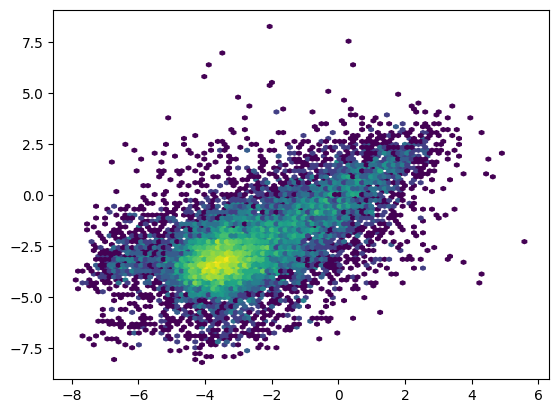

In [25]:
plt.hexbin(all_variants['NNK_doubles']['fitness1_uncorr'],all_variants['NNK_doubles']['fitness2_uncorr'],
          bins = "log")

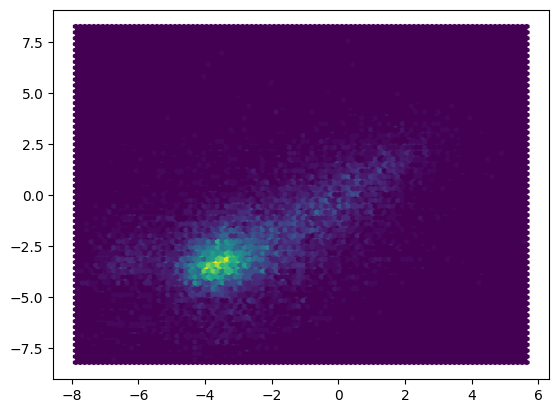

In [319]:
plt.hexbin(all_variants['NNK_doubles']['fitness1_uncorr'],all_variants['NNK_doubles']['fitness2_uncorr'],
          )

# Make plots for 2c and Suppl 2_smth

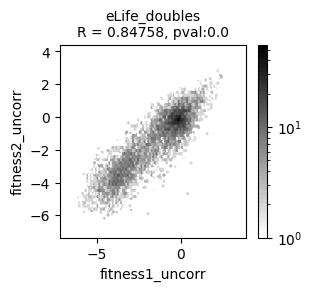

In [110]:
curr_doubles_dataset = 'eLife_doubles'

curr_replicates = ['1','2']

fig, ax = plt.subplots(figsize=(3,2.5))

curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()

curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])


n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = plt.hexbin(curr_x, curr_y, bins='log', cmap = cmap)

plt.colorbar(z, ax=ax
                        )

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('fitness' + curr_replicates[0] + '_uncorr')
plt.ylabel('fitness' + curr_replicates[1] + '_uncorr')
plt.title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_Fig2c_fitness' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


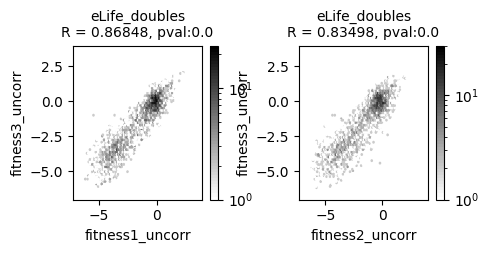

In [111]:
# 2 vs 3 and 1 vs 3 for supplementary
curr_doubles_dataset = 'eLife_doubles'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

plt.subplots_adjust(wspace=0.4)

curr_replicates = ['1','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax1.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax1)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax1.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax1.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax1.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)


curr_replicates = ['2','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax2.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax2)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax2.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax2.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax2.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_SupplFig2_fitness_corr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


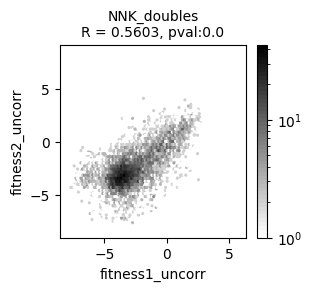

In [113]:
curr_doubles_dataset = 'NNK_doubles'

curr_replicates = ['1','2']

fig, ax = plt.subplots(figsize=(3,2.5))

curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()

curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])


n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = plt.hexbin(curr_x, curr_y, bins='log', cmap = cmap)

plt.colorbar(z, ax=ax
                        )

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('fitness' + curr_replicates[0] + '_uncorr')
plt.ylabel('fitness' + curr_replicates[1] + '_uncorr')
plt.title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_Fig2c_fitness' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


In [ ]:
# 2 vs 3 and 1 vs 3 for supplementary
curr_doubles_dataset = 'NNK_doubles'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

plt.subplots_adjust(wspace=0.4)

curr_replicates = ['1','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax1.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax1)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax1.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax1.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax1.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)


curr_replicates = ['2','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax2.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax2)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax2.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax2.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax2.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_SupplFig2_fitness_corr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


In [38]:
scipy.stats.pearsonr(curr_x, curr_y)

PearsonRResult(statistic=0.6147128801061362, pvalue=0.0)

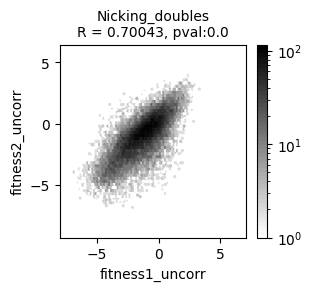

In [115]:
curr_doubles_dataset = 'Nicking_doubles'

curr_replicates = ['1','2']

fig, ax = plt.subplots(figsize=(3,2.5))

curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()

curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])


n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = plt.hexbin(curr_x, curr_y, bins='log', cmap = cmap)

plt.colorbar(z, ax=ax
                        )

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

plt.xlabel('fitness' + curr_replicates[0] + '_uncorr')
plt.ylabel('fitness' + curr_replicates[1] + '_uncorr')
plt.title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_Fig2c_fitness' + curr_replicates[0] + '_uncorr_vs_fitness' + curr_replicates[0] + '_uncorr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


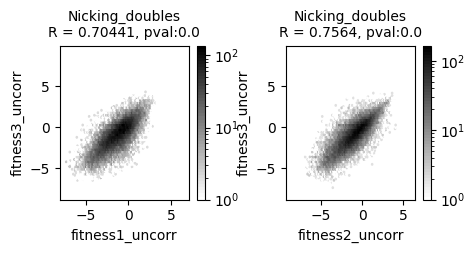

In [117]:
# 2 vs 3 and 1 vs 3 for supplementary
curr_doubles_dataset = 'Nicking_doubles'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,2))

plt.subplots_adjust(wspace=0.4)

curr_replicates = ['1','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax1.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax1)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax1.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax1.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax1.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)


curr_replicates = ['2','3']
curr_df = all_variants[curr_doubles_dataset][['fitness' + curr_replicates[0] + '_uncorr','fitness' + curr_replicates[1] + '_uncorr']].dropna()
curr_x = list(curr_df['fitness' + curr_replicates[0] + '_uncorr'])
curr_y = list(curr_df['fitness' + curr_replicates[1] + '_uncorr'])
n_bin = 50
cmap = LinearSegmentedColormap.from_list('whiteblack', ['white', 'black'], N=n_bin)

z = ax2.hexbin(curr_x, curr_y, bins='log', cmap = cmap)
plt.colorbar(z, ax=ax2)

#plt.axline((0, 0), (1, 1), linewidth=1, color='r')

ax2.set_xlabel('fitness' + curr_replicates[0] + '_uncorr')
ax2.set_ylabel('fitness' + curr_replicates[1] + '_uncorr')
ax2.set_title(curr_doubles_dataset + '\n' + 'R = ' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[0],5)) + ', pval:' + str(np.round(scipy.stats.spearmanr(curr_x, curr_y)[1],20)), 
          fontsize=10)

plt.savefig('./figures/20240503_SupplFig2_fitness_corr_' + curr_doubles_dataset + '.pdf', bbox_inches='tight', 
            transparent=True)


In [28]:
curr_df

fitness1_uncorr  fitness1_uncorr
1            -0.280176        -0.280176
2             0.388480         0.388480
3             0.529337         0.529337
4             0.143146         0.143146
5             1.119005         1.119005
...                ...              ...
18644        -2.132231        -2.132231
18645        -0.885994        -0.885994
18647        -3.530501        -3.530501
18648         0.139971         0.139971
18649         0.089385         0.089385

[16036 rows x 2 columns]

In [ ]:

            plt.colorbar(z, ax=axis
                        )
            #Guides
            axis.axline((0.1, 0.1), slope=1, linestyle = "dashed", color = 'black')